In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
import os
import plotly.express as px

In [2]:
df= pd.read_csv("dataminetes.csv")

In [3]:
df

timestamp  nbr_of_tweets
0       02:14            134
1       02:15            209
2       02:16            247
3       02:17            222
4       02:18            189
..        ...            ...
719     14:13           1624
720     14:14           1634
721     14:15           1713
722     14:16           1845
723     14:17           1774

[724 rows x 2 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   timestamp      724 non-null    object
 1   nbr_of_tweets  724 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.4+ KB


In [5]:
fig = px.line(df, x='timestamp', y='nbr_of_tweets')
fig.update_xaxes(type='category') 
fig.update_layout(title={'text': 'Number of Tweets Over Time', 'x': 0.5})
fig.show()

# Ar Model:

In [6]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

AR RMSE: 49.00747859258404


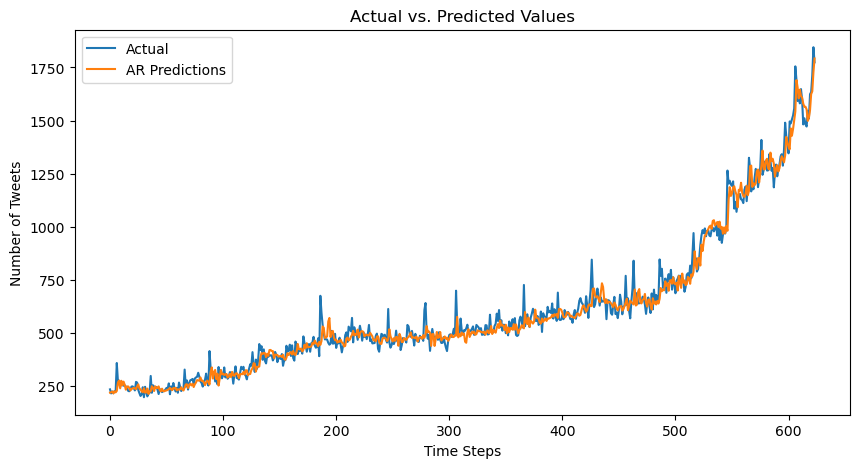

In [7]:

# Define the rolling window size
window_size = 100
prediction_window = 1  # Predict one point at a time

# Initialize lists to store actual values and predictions
actual_values = []
ar_predictions = []

# Iterate through the data, predicting one point at a time
for i in range(window_size, len(df)):
    train = df.iloc[i - window_size:i]  # Get the training data for this window
    test = df.iloc[i:i + prediction_window]  # Predict one point at a time

    # AR Model
    ar_model = AutoReg(train['nbr_of_tweets'], lags=10).fit()
    ar_forecast = ar_model.predict(start=len(train), end=len(train) + len(test) - 1)
    
    # Store actual value and prediction
    actual_values.append(test['nbr_of_tweets'].values[0])
    ar_predictions.append(ar_forecast.values[0])

# Calculate and print RMSE
ar_rmse = np.sqrt(mean_squared_error(actual_values, ar_predictions))
print(f"AR RMSE: {ar_rmse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(actual_values, label="Actual")
plt.plot(ar_predictions, label="AR Predictions")
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.xlabel("Time Steps")
plt.ylabel("Number of Tweets")
plt.show()


In [8]:
# Define the rolling window size and initial data points to use for training
window_size = 100
initial_data_points = 100

# Initialize lists to store actual values and predictions
actual_values = []
ar_predictions = []

# Initialize the model with the first window of data
train = df.iloc[0:initial_data_points]
ar_model = AutoReg(train['nbr_of_tweets'], lags=10).fit()

# Iterate through the data for recursive prediction
for i in range(initial_data_points, len(df)):
    test = df.iloc[i:i + 1]  # Predict one point at a time
    
    # AR Model prediction
    ar_forecast = ar_model.predict(start=len(train), end=len(train))
    
    # Store actual value and prediction
    actual_values.append(test['nbr_of_tweets'].values[0])
    ar_predictions.append(ar_forecast.values[0])
    
    # Update the model with the latest actual data point
    train = train.append(test, ignore_index=True)
    ar_model = AutoReg(train['nbr_of_tweets'], lags=10).fit()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22476\1125398014.py:25: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

AR RMSE: 47.479460368778014


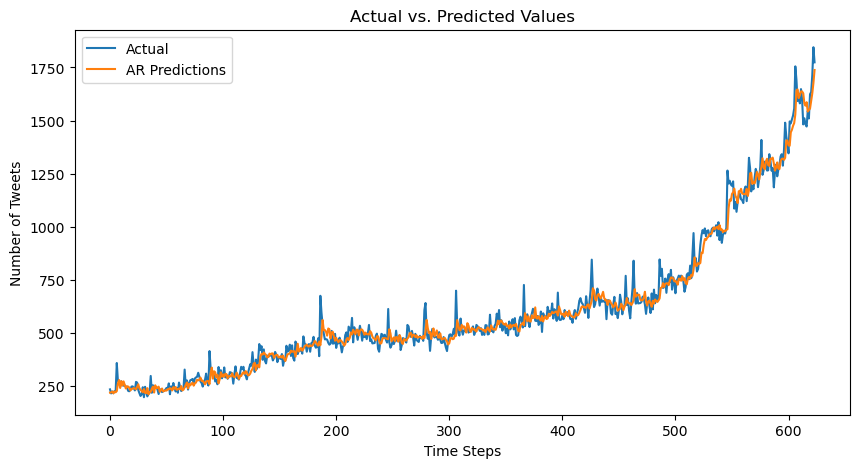

In [9]:
# Calculate and print RMSE
ar_rmse = np.sqrt(mean_squared_error(actual_values, ar_predictions))
print(f"AR RMSE: {ar_rmse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(actual_values, label="Actual")
plt.plot(ar_predictions, label="AR Predictions")
plt.legend()
plt.title("Actual vs. Predicted Values")
plt.xlabel("Time Steps")
plt.ylabel("Number of Tweets")
plt.show()


# ARIMA Model:

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Convert 'nbr_of_tweets' column to numeric
df['nbr_of_tweets'] = pd.to_numeric(df['nbr_of_tweets'], errors='coerce')

# Drop rows with NaN (if any)
df.dropna(subset=['nbr_of_tweets'], inplace=True)

# Extract the column of interest after cleaning
data = df['nbr_of_tweets'].values

# Define window size and split data into train and test sets
window_size = 100
train = data[:window_size]
test = data[window_size:]

# Train ARIMA model using a rolling window approach
forecast_arima = []
for i in range(len(data) - window_size):
    train_window = data[i : i + window_size]
    model_arima = ARIMA(train_window, order=(5, 1, 0))  # Adjust order as needed
    results_arima = model_arima.fit()

    forecast = results_arima.forecast(steps=1)  # Forecast next point
    forecast_arima.append(forecast[0])

# Calculate RMSE
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
print("RMSE for ARIMA:", rmse_arima)

RMSE for ARIMA: 48.34945874790578


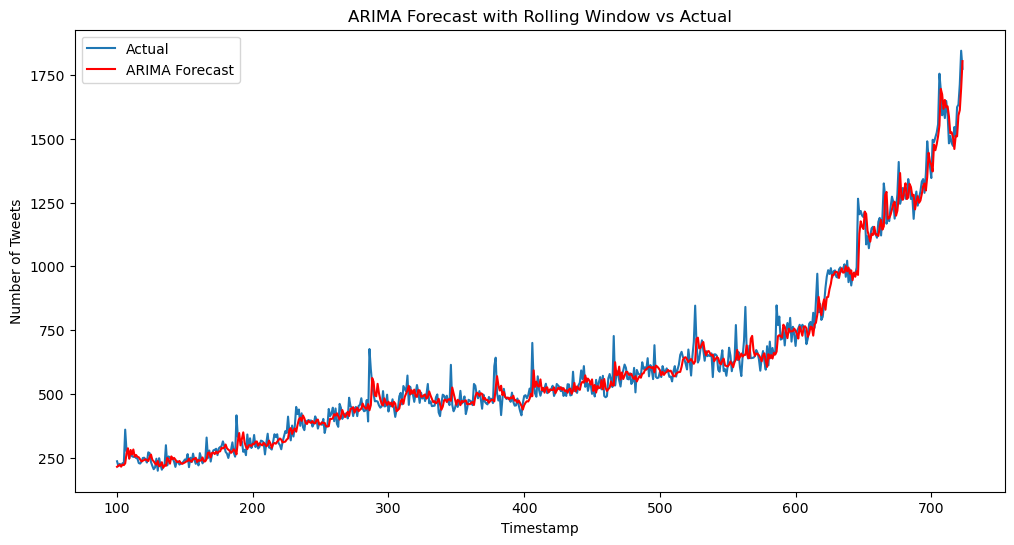

In [12]:
# Visualize ARIMA forecast against actual values
plt.figure(figsize=(12, 6))
plt.plot(df.index[window_size:], data[window_size:], label='Actual')
plt.plot(df.index[window_size:], forecast_arima, label='ARIMA Forecast', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Number of Tweets')
plt.title('ARIMA Forecast with Rolling Window vs Actual')
plt.legend()
plt.show()

## Forcasting 10 points:

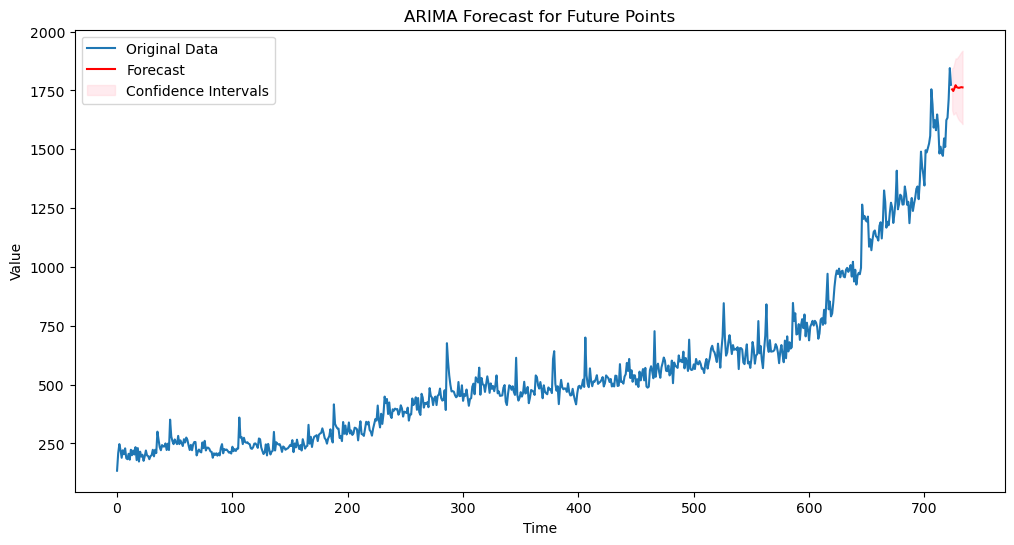

In [13]:
# Forecast future points beyond the available data
future_steps = 10  # Define the number of future steps you want to forecast

# Fit the ARIMA model on the entire dataset again (if it was initially trained on a subset)
model_arima = ARIMA(data, order=(5, 1, 0))  # Adjust order as needed
results_arima = model_arima.fit()

# Forecast future points
forecast_arima = results_arima.get_forecast(steps=future_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast_arima.predicted_mean
confidence_intervals = forecast_arima.conf_int()

# Plotting the original data, forecasted values, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(range(len(data), len(data) + future_steps), forecast_values, label='Forecast', color='red')
plt.fill_between(range(len(data), len(data) + future_steps),
                 confidence_intervals[:, 0],
                 confidence_intervals[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast for Future Points')
plt.legend()
plt.show()

## Forcasting 100 points:

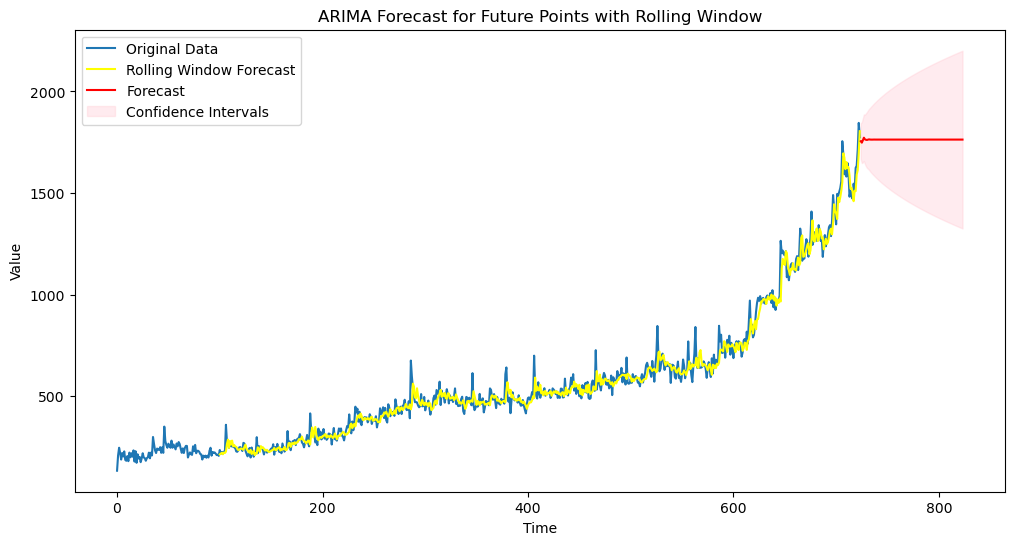

In [14]:
# Define window size used for rolling window approach
window_size = 100

# Train ARIMA model using a rolling window approach
rolling_forecast = []
for i in range(len(data) - window_size):
    train_window = data[i : i + window_size]
    model_arima = ARIMA(train_window, order=(5, 1, 0))  # Adjust order as needed
    results_arima = model_arima.fit()

    forecast = results_arima.forecast(steps=1)  # Forecast next point
    rolling_forecast.append(forecast[0])

# Forecast future points beyond the available data
future_steps = 100  # Define the number of future steps you want to forecast

# Fit the ARIMA model on the entire dataset again (if it was initially trained on a subset)
model_arima = ARIMA(data, order=(5, 1, 0))  # Adjust order as needed
results_arima = model_arima.fit()

# Forecast future points
forecast_arima = results_arima.get_forecast(steps=future_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast_arima.predicted_mean
confidence_intervals = forecast_arima.conf_int()

# Plotting the original data, rolling window signal, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(range(window_size, len(data)), rolling_forecast, label='Rolling Window Forecast', color='yellow')
plt.plot(range(len(data), len(data) + future_steps), forecast_values, label='Forecast', color='red')
plt.fill_between(range(len(data), len(data) + future_steps),
                 confidence_intervals[:, 0],
                 confidence_intervals[:, 1], color='pink', alpha=0.3, label='Confidence Intervals')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Forecast for Future Points with Rolling Window')
plt.legend()
plt.show()

# SARIMA Model with Rolling Window:

C:\Users\ahmed\anaconda3\envs\ahmed_proj\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\ahmed\anaconda3\envs\ahmed_proj\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\ahmed\anaconda3\envs\ahmed_proj\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

C:\Users\ahmed\anaconda3\envs\ahmed_proj\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\ahmed\anaconda3\envs\ahmed_proj\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\ahmed\anaconda3\e

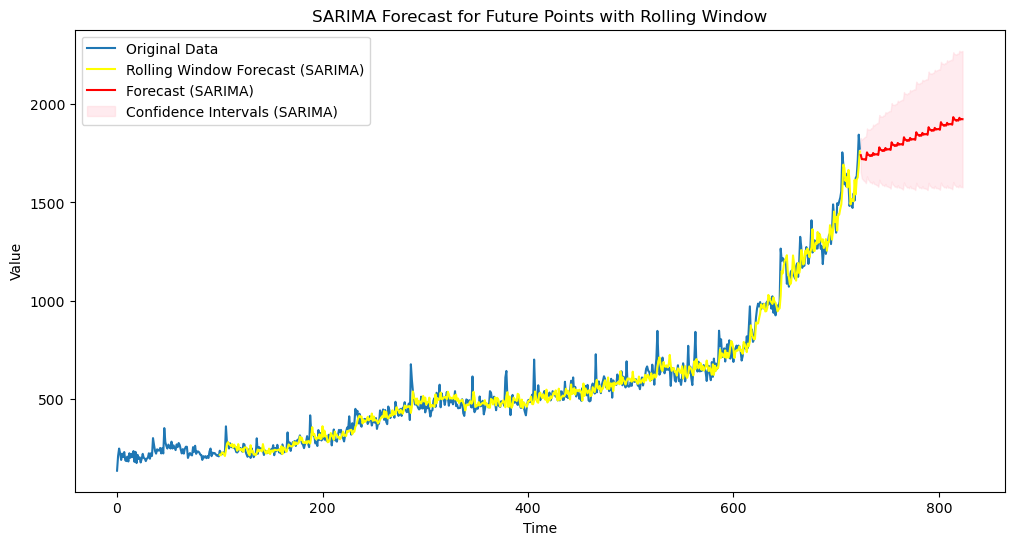

In [15]:
# Extract the column of interest
data = df['nbr_of_tweets'].values

# Define window size
window_size = 100

# Train SARIMA model using a rolling window approach
rolling_forecast_sarima = []
for i in range(len(data) - window_size):
    train_window = data[i : i + window_size]
    model_sarima = SARIMAX(train_window, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12)) 
    results_sarima = model_sarima.fit()

    forecast = results_sarima.forecast(steps=1)  # Forecast next point
    rolling_forecast_sarima.append(forecast[0])

# Forecast future points beyond the available data
future_steps = 100  # Define the number of future steps you want to forecast

# Fit the SARIMA model on the entire dataset again (
model_sarima = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))  
results_sarima = model_sarima.fit()

# Forecast future points
forecast_sarima = results_sarima.get_forecast(steps=future_steps)

# Extract forecasted values and confidence intervals
forecast_values_sarima = forecast_sarima.predicted_mean
confidence_intervals_sarima = forecast_sarima.conf_int()


# Plotting the original data, rolling window signal, and forecasted values for SARIMA
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(range(window_size, len(data)), rolling_forecast_sarima, label='Rolling Window Forecast (SARIMA)', color='yellow')
plt.plot(range(len(data), len(data) + future_steps), forecast_values_sarima, label='Forecast (SARIMA)', color='red')
plt.fill_between(range(len(data), len(data) + future_steps),
                 confidence_intervals_sarima[:, 0],
                 confidence_intervals_sarima[:, 1], color='pink', alpha=0.3, label='Confidence Intervals (SARIMA)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast for Future Points with Rolling Window')
plt.legend()
plt.show()


# LSTM Model with Rolling Window:

In [16]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [36]:
from keras.callbacks import History

# Initialize History to record metrics during training
history = History()

# Préparation des données
data = df['nbr_of_tweets'].values  # Sélectionner la colonne des nombres de tweets
window_size = 100

# Fonction pour créer des séquences avec une fenêtre glissante
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Création des séquences pour l'entraînement et le test
X, y = create_sequences(data, window_size)

# Reshape des données pour le modèle LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], window_size, 1)

# Construction du modèle LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Entraînement du modèle LSTM avec l'utilisation du callback History
model.fit(X, y, epochs=10000, batch_size=64, callbacks=[history])
# Get the loss values recorded during training
loss_values = history.history['loss']
# Prédiction avec le modèle LSTM
forecast_values_lstm = []
for i in range(len(data) - window_size):
    input_data = data[i:i + window_size]
    input_data = np.reshape(input_data, (1, window_size, 1))
    forecast = model.predict(input_data)
    forecast_values_lstm.append(forecast[0][0])

# Calcul du RMSE
true_values = data[window_size:]
rmse_lstm = np.sqrt(mean_squared_error(true_values, forecast_values_lstm))



Epoch 1/10000
10/10 [==============================] - 2s 32ms/step - loss: 479623.6562
Epoch 2/10000
10/10 [==============================] - 0s 32ms/step - loss: 479219.1875
Epoch 3/10000
10/10 [==============================] - 0s 32ms/step - loss: 478548.7812
Epoch 4/10000
10/10 [==============================] - 0s 34ms/step - loss: 477840.4688
Epoch 5/10000
10/10 [==============================] - 0s 36ms/step - loss: 477046.9688
Epoch 6/10000
10/10 [==============================] - 0s 33ms/step - loss: 475901.2812
Epoch 7/10000
10/10 [==============================] - 0s 35ms/step - loss: 475049.7500
Epoch 8/10000
10/10 [==============================] - 0s 39ms/step - loss: 474716.8125
Epoch 9/10000
10/10 [==============================] - 0s 43ms/step - loss: 474172.3125
Epoch 10/10000
10/10 [==============================] - 0s 45ms/step - loss: 473818.5625
Epoch 11/10000
10/10 [==============================] - 0s 37ms/step - loss: 473528.4062
Epoch 12/10000
10/10 [========

10/10 [==============================] - 0s 39ms/step - loss: 446607.5000
Epoch 94/10000
10/10 [==============================] - 0s 38ms/step - loss: 446309.4375
Epoch 95/10000
10/10 [==============================] - 0s 39ms/step - loss: 446016.2188
Epoch 96/10000
10/10 [==============================] - 0s 38ms/step - loss: 445722.8750
Epoch 97/10000
10/10 [==============================] - 0s 38ms/step - loss: 445428.6562
Epoch 98/10000
10/10 [==============================] - 0s 39ms/step - loss: 445138.4688
Epoch 99/10000
10/10 [==============================] - 0s 40ms/step - loss: 444842.3438
Epoch 100/10000
10/10 [==============================] - 0s 46ms/step - loss: 444552.7188
Epoch 101/10000
10/10 [==============================] - 0s 39ms/step - loss: 444259.6562
Epoch 102/10000
10/10 [==============================] - 0s 39ms/step - loss: 443968.3438
Epoch 103/10000
10/10 [==============================] - 0s 38ms/step - loss: 443678.8125
Epoch 104/10000
10/10 [=========

10/10 [==============================] - 0s 41ms/step - loss: 396845.2188
Epoch 276/10000
10/10 [==============================] - 0s 41ms/step - loss: 396585.9688
Epoch 277/10000
10/10 [==============================] - 0s 41ms/step - loss: 396328.0625
Epoch 278/10000
10/10 [==============================] - 0s 39ms/step - loss: 396071.1562
Epoch 279/10000
10/10 [==============================] - 0s 38ms/step - loss: 395812.7500
Epoch 280/10000
10/10 [==============================] - 0s 39ms/step - loss: 395556.5000
Epoch 281/10000
10/10 [==============================] - 0s 36ms/step - loss: 395298.7812
Epoch 282/10000
10/10 [==============================] - 0s 41ms/step - loss: 395043.3438
Epoch 283/10000
10/10 [==============================] - 0s 40ms/step - loss: 394782.2500
Epoch 284/10000
10/10 [==============================] - 0s 38ms/step - loss: 394531.1562
Epoch 285/10000
10/10 [==============================] - 0s 38ms/step - loss: 394272.2188
Epoch 286/10000
10/10 [===

10/10 [==============================] - 0s 39ms/step - loss: 352174.9375
Epoch 458/10000
10/10 [==============================] - 0s 40ms/step - loss: 351942.5000
Epoch 459/10000
10/10 [==============================] - 0s 40ms/step - loss: 351707.9688
Epoch 460/10000
10/10 [==============================] - 0s 39ms/step - loss: 351475.5938
Epoch 461/10000
10/10 [==============================] - 0s 39ms/step - loss: 351242.2188
Epoch 462/10000
10/10 [==============================] - 0s 39ms/step - loss: 351009.2188
Epoch 463/10000
10/10 [==============================] - 0s 39ms/step - loss: 350775.3438
Epoch 464/10000
10/10 [==============================] - 0s 38ms/step - loss: 350543.6875
Epoch 465/10000
10/10 [==============================] - 0s 38ms/step - loss: 350310.0000
Epoch 466/10000
10/10 [==============================] - 0s 40ms/step - loss: 350077.8125
Epoch 467/10000
10/10 [==============================] - 0s 38ms/step - loss: 349845.8750
Epoch 468/10000
10/10 [===

10/10 [==============================] - 0s 38ms/step - loss: 309199.2500
Epoch 640/10000
10/10 [==============================] - 0s 40ms/step - loss: 308979.2812
Epoch 641/10000
10/10 [==============================] - 0s 41ms/step - loss: 308762.7812
Epoch 642/10000
10/10 [==============================] - 0s 41ms/step - loss: 308543.5625
Epoch 643/10000
10/10 [==============================] - 0s 39ms/step - loss: 308323.4375
Epoch 644/10000
10/10 [==============================] - 0s 39ms/step - loss: 308103.2188
Epoch 645/10000
10/10 [==============================] - 0s 39ms/step - loss: 307886.6875
Epoch 646/10000
10/10 [==============================] - 0s 38ms/step - loss: 307668.2188
Epoch 647/10000
10/10 [==============================] - 0s 39ms/step - loss: 307448.6562
Epoch 648/10000
10/10 [==============================] - 0s 39ms/step - loss: 307232.8750
Epoch 649/10000
10/10 [==============================] - 0s 40ms/step - loss: 307014.7812
Epoch 650/10000
10/10 [===

10/10 [==============================] - 0s 46ms/step - loss: 271518.9375
Epoch 822/10000
10/10 [==============================] - 0s 46ms/step - loss: 271324.4062
Epoch 823/10000
10/10 [==============================] - 0s 41ms/step - loss: 271126.6562
Epoch 824/10000
10/10 [==============================] - 0s 39ms/step - loss: 270933.9375
Epoch 825/10000
10/10 [==============================] - 0s 39ms/step - loss: 270742.3438
Epoch 826/10000
10/10 [==============================] - 0s 39ms/step - loss: 270545.1875
Epoch 827/10000
10/10 [==============================] - 0s 39ms/step - loss: 270348.7188
Epoch 828/10000
10/10 [==============================] - 0s 39ms/step - loss: 270157.9375
Epoch 829/10000
10/10 [==============================] - 0s 40ms/step - loss: 269960.7812
Epoch 830/10000
10/10 [==============================] - 0s 38ms/step - loss: 269770.9688
Epoch 831/10000
10/10 [==============================] - 0s 39ms/step - loss: 269575.0938
Epoch 832/10000
10/10 [===

10/10 [==============================] - 0s 39ms/step - loss: 238140.1250
Epoch 1004/10000
10/10 [==============================] - 0s 39ms/step - loss: 237966.4688
Epoch 1005/10000
10/10 [==============================] - 0s 39ms/step - loss: 237793.6094
Epoch 1006/10000
10/10 [==============================] - 0s 41ms/step - loss: 237623.5312
Epoch 1007/10000
10/10 [==============================] - 0s 40ms/step - loss: 237451.5938
Epoch 1008/10000
10/10 [==============================] - 0s 39ms/step - loss: 237281.5938
Epoch 1009/10000
10/10 [==============================] - 0s 39ms/step - loss: 237107.8750
Epoch 1010/10000
10/10 [==============================] - 0s 40ms/step - loss: 236938.1250
Epoch 1011/10000
10/10 [==============================] - 0s 40ms/step - loss: 236764.2031
Epoch 1012/10000
10/10 [==============================] - 0s 40ms/step - loss: 236595.5625
Epoch 1013/10000
10/10 [==============================] - 0s 37ms/step - loss: 236424.4844
Epoch 1014/10000

10/10 [==============================] - 0s 38ms/step - loss: 208999.5469
Epoch 1184/10000
10/10 [==============================] - 0s 39ms/step - loss: 208833.4062
Epoch 1185/10000
10/10 [==============================] - 0s 38ms/step - loss: 208683.5000
Epoch 1186/10000
10/10 [==============================] - 0s 38ms/step - loss: 208513.8438
Epoch 1187/10000
10/10 [==============================] - 0s 40ms/step - loss: 208362.0781
Epoch 1188/10000
10/10 [==============================] - 0s 42ms/step - loss: 208199.5156
Epoch 1189/10000
10/10 [==============================] - 0s 41ms/step - loss: 208047.7500
Epoch 1190/10000
10/10 [==============================] - 0s 40ms/step - loss: 207880.4375
Epoch 1191/10000
10/10 [==============================] - 0s 40ms/step - loss: 207716.4844
Epoch 1192/10000
10/10 [==============================] - 0s 41ms/step - loss: 207518.5312
Epoch 1193/10000
10/10 [==============================] - 0s 40ms/step - loss: 207321.0000
Epoch 1194/10000

10/10 [==============================] - 0s 40ms/step - loss: 175758.3281
Epoch 1364/10000
10/10 [==============================] - 0s 40ms/step - loss: 175596.7969
Epoch 1365/10000
10/10 [==============================] - 0s 40ms/step - loss: 175440.2344
Epoch 1366/10000
10/10 [==============================] - 0s 40ms/step - loss: 175277.9844
Epoch 1367/10000
10/10 [==============================] - 0s 46ms/step - loss: 175119.9688
Epoch 1368/10000
10/10 [==============================] - 0s 42ms/step - loss: 174961.3750
Epoch 1369/10000
10/10 [==============================] - 0s 39ms/step - loss: 174806.8906
Epoch 1370/10000
10/10 [==============================] - 0s 38ms/step - loss: 174651.4375
Epoch 1371/10000
10/10 [==============================] - 0s 39ms/step - loss: 174493.4688
Epoch 1372/10000
10/10 [==============================] - 0s 39ms/step - loss: 174340.4688
Epoch 1373/10000
10/10 [==============================] - 0s 39ms/step - loss: 174182.5312
Epoch 1374/10000

10/10 [==============================] - 0s 39ms/step - loss: 149916.6875
Epoch 1544/10000
10/10 [==============================] - 0s 39ms/step - loss: 149787.1719
Epoch 1545/10000
10/10 [==============================] - 0s 39ms/step - loss: 149621.2188
Epoch 1546/10000
10/10 [==============================] - 0s 40ms/step - loss: 149449.3438
Epoch 1547/10000
10/10 [==============================] - 0s 40ms/step - loss: 149298.5312
Epoch 1548/10000
10/10 [==============================] - 0s 39ms/step - loss: 149139.5312
Epoch 1549/10000
10/10 [==============================] - 0s 39ms/step - loss: 148989.3281
Epoch 1550/10000
10/10 [==============================] - 0s 39ms/step - loss: 148827.9062
Epoch 1551/10000
10/10 [==============================] - 0s 39ms/step - loss: 148690.6719
Epoch 1552/10000
10/10 [==============================] - 0s 39ms/step - loss: 148556.1406
Epoch 1553/10000
10/10 [==============================] - 0s 40ms/step - loss: 148384.8906
Epoch 1554/10000

10/10 [==============================] - 0s 44ms/step - loss: 127448.9844
Epoch 1724/10000
10/10 [==============================] - 0s 48ms/step - loss: 127345.7188
Epoch 1725/10000
10/10 [==============================] - 0s 39ms/step - loss: 127242.5000
Epoch 1726/10000
10/10 [==============================] - 0s 44ms/step - loss: 127130.5781
Epoch 1727/10000
10/10 [==============================] - 0s 46ms/step - loss: 127023.5547
Epoch 1728/10000
10/10 [==============================] - 0s 48ms/step - loss: 126910.1406
Epoch 1729/10000
10/10 [==============================] - 0s 48ms/step - loss: 126797.7344
Epoch 1730/10000
10/10 [==============================] - 0s 45ms/step - loss: 126690.9766
Epoch 1731/10000
10/10 [==============================] - 0s 43ms/step - loss: 126581.3359
Epoch 1732/10000
10/10 [==============================] - 1s 51ms/step - loss: 126472.9453
Epoch 1733/10000
10/10 [==============================] - 0s 46ms/step - loss: 126344.0156
Epoch 1734/10000

10/10 [==============================] - 0s 38ms/step - loss: 109464.8984
Epoch 1904/10000
10/10 [==============================] - 0s 37ms/step - loss: 109375.6562
Epoch 1905/10000
10/10 [==============================] - 0s 38ms/step - loss: 109272.5000
Epoch 1906/10000
10/10 [==============================] - 0s 36ms/step - loss: 109182.8203
Epoch 1907/10000
10/10 [==============================] - 0s 38ms/step - loss: 109109.1641
Epoch 1908/10000
10/10 [==============================] - 0s 35ms/step - loss: 109019.0547
Epoch 1909/10000
10/10 [==============================] - 0s 34ms/step - loss: 108905.4844
Epoch 1910/10000
10/10 [==============================] - 0s 34ms/step - loss: 108829.2578
Epoch 1911/10000
10/10 [==============================] - 0s 34ms/step - loss: 108734.9609
Epoch 1912/10000
10/10 [==============================] - 0s 35ms/step - loss: 108648.9453
Epoch 1913/10000
10/10 [==============================] - 0s 36ms/step - loss: 108625.3203
Epoch 1914/10000

10/10 [==============================] - 0s 40ms/step - loss: 94201.2812
Epoch 2085/10000
10/10 [==============================] - 0s 38ms/step - loss: 94107.4844
Epoch 2086/10000
10/10 [==============================] - 0s 38ms/step - loss: 94010.8125
Epoch 2087/10000
10/10 [==============================] - 0s 38ms/step - loss: 93923.6953
Epoch 2088/10000
10/10 [==============================] - 0s 38ms/step - loss: 93837.2891
Epoch 2089/10000
10/10 [==============================] - 0s 38ms/step - loss: 93767.3281
Epoch 2090/10000
10/10 [==============================] - 0s 40ms/step - loss: 93724.3594
Epoch 2091/10000
10/10 [==============================] - 0s 38ms/step - loss: 93620.3047
Epoch 2092/10000
10/10 [==============================] - 0s 38ms/step - loss: 93531.2969
Epoch 2093/10000
10/10 [==============================] - 0s 38ms/step - loss: 93482.3047
Epoch 2094/10000
10/10 [==============================] - 0s 38ms/step - loss: 93431.0078
Epoch 2095/10000
10/10 [===

10/10 [==============================] - 0s 34ms/step - loss: 81122.8984
Epoch 2267/10000
10/10 [==============================] - 0s 35ms/step - loss: 81009.2656
Epoch 2268/10000
10/10 [==============================] - 0s 36ms/step - loss: 80930.9844
Epoch 2269/10000
10/10 [==============================] - 0s 36ms/step - loss: 80858.1094
Epoch 2270/10000
10/10 [==============================] - 0s 36ms/step - loss: 80856.6797
Epoch 2271/10000
10/10 [==============================] - 0s 36ms/step - loss: 80748.9062
Epoch 2272/10000
10/10 [==============================] - 0s 35ms/step - loss: 80692.3438
Epoch 2273/10000
10/10 [==============================] - 0s 36ms/step - loss: 80703.0391
Epoch 2274/10000
10/10 [==============================] - 0s 35ms/step - loss: 80596.5781
Epoch 2275/10000
10/10 [==============================] - 0s 35ms/step - loss: 80497.4219
Epoch 2276/10000
10/10 [==============================] - 0s 37ms/step - loss: 80418.7969
Epoch 2277/10000
10/10 [===

10/10 [==============================] - 0s 35ms/step - loss: 69894.6250
Epoch 2449/10000
10/10 [==============================] - 0s 34ms/step - loss: 69876.5859
Epoch 2450/10000
10/10 [==============================] - 0s 39ms/step - loss: 69875.7578
Epoch 2451/10000
10/10 [==============================] - 0s 33ms/step - loss: 69760.8750
Epoch 2452/10000
10/10 [==============================] - 0s 35ms/step - loss: 69663.9922
Epoch 2453/10000
10/10 [==============================] - 0s 37ms/step - loss: 69576.8438
Epoch 2454/10000
10/10 [==============================] - 0s 36ms/step - loss: 69526.1641
Epoch 2455/10000
10/10 [==============================] - 0s 41ms/step - loss: 69472.3828
Epoch 2456/10000
10/10 [==============================] - 0s 42ms/step - loss: 69413.6172
Epoch 2457/10000
10/10 [==============================] - 0s 44ms/step - loss: 69350.2734
Epoch 2458/10000
10/10 [==============================] - 0s 48ms/step - loss: 69314.3984
Epoch 2459/10000
10/10 [===

10/10 [==============================] - 0s 40ms/step - loss: 60213.3516
Epoch 2631/10000
10/10 [==============================] - 0s 40ms/step - loss: 60194.4609
Epoch 2632/10000
10/10 [==============================] - 0s 40ms/step - loss: 60143.4102
Epoch 2633/10000
10/10 [==============================] - 0s 40ms/step - loss: 60058.3477
Epoch 2634/10000
10/10 [==============================] - 0s 40ms/step - loss: 59966.9922
Epoch 2635/10000
10/10 [==============================] - 0s 34ms/step - loss: 59933.9180
Epoch 2636/10000
10/10 [==============================] - 0s 35ms/step - loss: 59875.5000
Epoch 2637/10000
10/10 [==============================] - 0s 34ms/step - loss: 59844.3320
Epoch 2638/10000
10/10 [==============================] - 0s 34ms/step - loss: 59769.2578
Epoch 2639/10000
10/10 [==============================] - 0s 34ms/step - loss: 59721.4570
Epoch 2640/10000
10/10 [==============================] - 0s 34ms/step - loss: 59736.7891
Epoch 2641/10000
10/10 [===

10/10 [==============================] - 0s 43ms/step - loss: 51847.9570
Epoch 2813/10000
10/10 [==============================] - 0s 41ms/step - loss: 51671.2969
Epoch 2814/10000
10/10 [==============================] - 0s 39ms/step - loss: 51664.6797
Epoch 2815/10000
10/10 [==============================] - 0s 39ms/step - loss: 51624.4297
Epoch 2816/10000
10/10 [==============================] - 0s 39ms/step - loss: 51556.1133
Epoch 2817/10000
10/10 [==============================] - 0s 39ms/step - loss: 51567.6445
Epoch 2818/10000
10/10 [==============================] - 0s 39ms/step - loss: 51681.0352
Epoch 2819/10000
10/10 [==============================] - 0s 39ms/step - loss: 51785.3477
Epoch 2820/10000
10/10 [==============================] - 0s 39ms/step - loss: 51662.5312
Epoch 2821/10000
10/10 [==============================] - 0s 40ms/step - loss: 51532.8398
Epoch 2822/10000
10/10 [==============================] - 0s 40ms/step - loss: 51432.5273
Epoch 2823/10000
10/10 [===

10/10 [==============================] - 0s 34ms/step - loss: 44475.3477
Epoch 2995/10000
10/10 [==============================] - 0s 34ms/step - loss: 44397.0469
Epoch 2996/10000
10/10 [==============================] - 0s 34ms/step - loss: 44395.0078
Epoch 2997/10000
10/10 [==============================] - 0s 35ms/step - loss: 44395.8047
Epoch 2998/10000
10/10 [==============================] - 0s 35ms/step - loss: 44332.1016
Epoch 2999/10000
10/10 [==============================] - 0s 37ms/step - loss: 44302.1523
Epoch 3000/10000
10/10 [==============================] - 0s 35ms/step - loss: 44248.9805
Epoch 3001/10000
10/10 [==============================] - 0s 42ms/step - loss: 44195.3750
Epoch 3002/10000
10/10 [==============================] - 0s 41ms/step - loss: 44124.0938
Epoch 3003/10000
10/10 [==============================] - 0s 39ms/step - loss: 44113.2070
Epoch 3004/10000
10/10 [==============================] - 0s 39ms/step - loss: 44118.1758
Epoch 3005/10000
10/10 [===

10/10 [==============================] - 0s 36ms/step - loss: 38116.2109
Epoch 3177/10000
10/10 [==============================] - 0s 36ms/step - loss: 38176.4375
Epoch 3178/10000
10/10 [==============================] - 0s 37ms/step - loss: 38106.6055
Epoch 3179/10000
10/10 [==============================] - 0s 38ms/step - loss: 38040.1328
Epoch 3180/10000
10/10 [==============================] - 0s 36ms/step - loss: 38024.7812
Epoch 3181/10000
10/10 [==============================] - 0s 40ms/step - loss: 38017.0234
Epoch 3182/10000
10/10 [==============================] - 0s 35ms/step - loss: 37984.0703
Epoch 3183/10000
10/10 [==============================] - 0s 34ms/step - loss: 37952.4727
Epoch 3184/10000
10/10 [==============================] - 0s 37ms/step - loss: 37910.9492
Epoch 3185/10000
10/10 [==============================] - 0s 42ms/step - loss: 37933.2422
Epoch 3186/10000
10/10 [==============================] - 0s 41ms/step - loss: 37834.6875
Epoch 3187/10000
10/10 [===

10/10 [==============================] - 0s 34ms/step - loss: 32879.8359
Epoch 3359/10000
10/10 [==============================] - 0s 34ms/step - loss: 32885.4766
Epoch 3360/10000
10/10 [==============================] - 0s 34ms/step - loss: 32823.4805
Epoch 3361/10000
10/10 [==============================] - 0s 36ms/step - loss: 32784.4648
Epoch 3362/10000
10/10 [==============================] - 0s 36ms/step - loss: 32729.5410
Epoch 3363/10000
10/10 [==============================] - 0s 36ms/step - loss: 32707.6211
Epoch 3364/10000
10/10 [==============================] - 0s 36ms/step - loss: 32662.8691
Epoch 3365/10000
10/10 [==============================] - 0s 36ms/step - loss: 32616.2754
Epoch 3366/10000
10/10 [==============================] - 0s 36ms/step - loss: 32594.5801
Epoch 3367/10000
10/10 [==============================] - 0s 35ms/step - loss: 32558.5195
Epoch 3368/10000
10/10 [==============================] - 0s 33ms/step - loss: 32542.3711
Epoch 3369/10000
10/10 [===

10/10 [==============================] - 0s 35ms/step - loss: 26614.9395
Epoch 3541/10000
10/10 [==============================] - 0s 44ms/step - loss: 26586.8711
Epoch 3542/10000
10/10 [==============================] - 1s 55ms/step - loss: 26552.8105
Epoch 3543/10000
10/10 [==============================] - 1s 50ms/step - loss: 26532.5137
Epoch 3544/10000
10/10 [==============================] - 0s 40ms/step - loss: 26489.7637
Epoch 3545/10000
10/10 [==============================] - 0s 44ms/step - loss: 26548.1387
Epoch 3546/10000
10/10 [==============================] - 0s 40ms/step - loss: 26455.9922
Epoch 3547/10000
10/10 [==============================] - 0s 37ms/step - loss: 26477.0898
Epoch 3548/10000
10/10 [==============================] - 0s 37ms/step - loss: 26427.1406
Epoch 3549/10000
10/10 [==============================] - 0s 36ms/step - loss: 26433.4238
Epoch 3550/10000
10/10 [==============================] - 0s 34ms/step - loss: 26455.1348
Epoch 3551/10000
10/10 [===

10/10 [==============================] - 0s 43ms/step - loss: 22698.7441
Epoch 3723/10000
10/10 [==============================] - 0s 42ms/step - loss: 22648.2363
Epoch 3724/10000
10/10 [==============================] - 0s 37ms/step - loss: 22604.9961
Epoch 3725/10000
10/10 [==============================] - 0s 36ms/step - loss: 22622.2012
Epoch 3726/10000
10/10 [==============================] - 0s 35ms/step - loss: 22646.3105
Epoch 3727/10000
10/10 [==============================] - 0s 35ms/step - loss: 22600.3965
Epoch 3728/10000
10/10 [==============================] - 0s 35ms/step - loss: 22482.6328
Epoch 3729/10000
10/10 [==============================] - 0s 34ms/step - loss: 22549.9160
Epoch 3730/10000
10/10 [==============================] - 0s 36ms/step - loss: 24992.5312
Epoch 3731/10000
10/10 [==============================] - 0s 36ms/step - loss: 28566.0605
Epoch 3732/10000
10/10 [==============================] - 0s 36ms/step - loss: 24532.5137
Epoch 3733/10000
10/10 [===

10/10 [==============================] - 0s 41ms/step - loss: 19350.7012
Epoch 3905/10000
10/10 [==============================] - 0s 38ms/step - loss: 19313.8672
Epoch 3906/10000
10/10 [==============================] - 0s 34ms/step - loss: 19357.4160
Epoch 3907/10000
10/10 [==============================] - 0s 36ms/step - loss: 19295.2754
Epoch 3908/10000
10/10 [==============================] - 0s 34ms/step - loss: 19261.3984
Epoch 3909/10000
10/10 [==============================] - 0s 34ms/step - loss: 19250.6875
Epoch 3910/10000
10/10 [==============================] - 0s 35ms/step - loss: 19283.3359
Epoch 3911/10000
10/10 [==============================] - 0s 37ms/step - loss: 19164.8809
Epoch 3912/10000
10/10 [==============================] - 0s 36ms/step - loss: 19165.6934
Epoch 3913/10000
10/10 [==============================] - 0s 37ms/step - loss: 19118.8906
Epoch 3914/10000
10/10 [==============================] - 0s 39ms/step - loss: 19183.9160
Epoch 3915/10000
10/10 [===

10/10 [==============================] - 0s 35ms/step - loss: 16513.4727
Epoch 4087/10000
10/10 [==============================] - 0s 36ms/step - loss: 16475.2637
Epoch 4088/10000
10/10 [==============================] - 0s 37ms/step - loss: 16483.7637
Epoch 4089/10000
10/10 [==============================] - 0s 36ms/step - loss: 16465.9434
Epoch 4090/10000
10/10 [==============================] - 0s 35ms/step - loss: 16460.1055
Epoch 4091/10000
10/10 [==============================] - 0s 35ms/step - loss: 16425.3359
Epoch 4092/10000
10/10 [==============================] - 0s 34ms/step - loss: 16475.6465
Epoch 4093/10000
10/10 [==============================] - 0s 36ms/step - loss: 16401.4512
Epoch 4094/10000
10/10 [==============================] - 0s 39ms/step - loss: 16502.9492
Epoch 4095/10000
10/10 [==============================] - 0s 35ms/step - loss: 16425.2363
Epoch 4096/10000
10/10 [==============================] - 0s 38ms/step - loss: 16429.9023
Epoch 4097/10000
10/10 [===

10/10 [==============================] - 0s 45ms/step - loss: 14173.6006
Epoch 4269/10000
10/10 [==============================] - 0s 47ms/step - loss: 14164.3848
Epoch 4270/10000
10/10 [==============================] - 0s 41ms/step - loss: 14130.9023
Epoch 4271/10000
10/10 [==============================] - 0s 41ms/step - loss: 14194.1953
Epoch 4272/10000
10/10 [==============================] - 0s 41ms/step - loss: 14169.8301
Epoch 4273/10000
10/10 [==============================] - 0s 41ms/step - loss: 14200.4346
Epoch 4274/10000
10/10 [==============================] - 0s 38ms/step - loss: 14169.9668
Epoch 4275/10000
10/10 [==============================] - 0s 34ms/step - loss: 14039.7705
Epoch 4276/10000
10/10 [==============================] - 0s 34ms/step - loss: 14115.7832
Epoch 4277/10000
10/10 [==============================] - 0s 35ms/step - loss: 14046.4844
Epoch 4278/10000
10/10 [==============================] - 0s 36ms/step - loss: 14218.6719
Epoch 4279/10000
10/10 [===

10/10 [==============================] - 0s 43ms/step - loss: 12267.2275
Epoch 4451/10000
10/10 [==============================] - 0s 41ms/step - loss: 12299.0020
Epoch 4452/10000
10/10 [==============================] - 0s 42ms/step - loss: 12234.1357
Epoch 4453/10000
10/10 [==============================] - 0s 41ms/step - loss: 12207.5889
Epoch 4454/10000
10/10 [==============================] - 0s 41ms/step - loss: 12212.3018
Epoch 4455/10000
10/10 [==============================] - 0s 41ms/step - loss: 12209.9648
Epoch 4456/10000
10/10 [==============================] - 0s 41ms/step - loss: 12242.7520
Epoch 4457/10000
10/10 [==============================] - 0s 40ms/step - loss: 12211.3594
Epoch 4458/10000
10/10 [==============================] - 0s 41ms/step - loss: 12178.6318
Epoch 4459/10000
10/10 [==============================] - 0s 34ms/step - loss: 12191.2344
Epoch 4460/10000
10/10 [==============================] - 0s 34ms/step - loss: 12124.4531
Epoch 4461/10000
10/10 [===

10/10 [==============================] - 0s 42ms/step - loss: 10354.8418
Epoch 4633/10000
10/10 [==============================] - 0s 41ms/step - loss: 10296.2598
Epoch 4634/10000
10/10 [==============================] - 0s 42ms/step - loss: 10325.6992
Epoch 4635/10000
10/10 [==============================] - 0s 41ms/step - loss: 10289.1895
Epoch 4636/10000
10/10 [==============================] - 0s 41ms/step - loss: 10254.8506
Epoch 4637/10000
10/10 [==============================] - 0s 40ms/step - loss: 10252.5635
Epoch 4638/10000
10/10 [==============================] - 0s 34ms/step - loss: 10322.3916
Epoch 4639/10000
10/10 [==============================] - 0s 34ms/step - loss: 10280.1328
Epoch 4640/10000
10/10 [==============================] - 0s 34ms/step - loss: 10221.1465
Epoch 4641/10000
10/10 [==============================] - 0s 35ms/step - loss: 10369.5654
Epoch 4642/10000
10/10 [==============================] - 0s 36ms/step - loss: 10257.4492
Epoch 4643/10000
10/10 [===

10/10 [==============================] - 0s 41ms/step - loss: 9040.9961
Epoch 4816/10000
10/10 [==============================] - 0s 35ms/step - loss: 8929.1943
Epoch 4817/10000
10/10 [==============================] - 0s 35ms/step - loss: 8936.5400
Epoch 4818/10000
10/10 [==============================] - 0s 36ms/step - loss: 8948.2607
Epoch 4819/10000
10/10 [==============================] - 1s 54ms/step - loss: 8924.1602
Epoch 4820/10000
10/10 [==============================] - 0s 45ms/step - loss: 8998.8955
Epoch 4821/10000
10/10 [==============================] - 0s 47ms/step - loss: 8956.0635
Epoch 4822/10000
10/10 [==============================] - 1s 50ms/step - loss: 8902.9365
Epoch 4823/10000
10/10 [==============================] - 1s 50ms/step - loss: 8864.9287
Epoch 4824/10000
10/10 [==============================] - 1s 52ms/step - loss: 8928.8877
Epoch 4825/10000
10/10 [==============================] - 0s 48ms/step - loss: 8875.0518
Epoch 4826/10000
10/10 [==============

10/10 [==============================] - 0s 34ms/step - loss: 7773.2739
Epoch 5000/10000
10/10 [==============================] - 0s 35ms/step - loss: 7929.9551
Epoch 5001/10000
10/10 [==============================] - 0s 35ms/step - loss: 7829.1484
Epoch 5002/10000
10/10 [==============================] - 0s 34ms/step - loss: 7878.1729
Epoch 5003/10000
10/10 [==============================] - 0s 36ms/step - loss: 7922.8013
Epoch 5004/10000
10/10 [==============================] - 0s 35ms/step - loss: 8055.6196
Epoch 5005/10000
10/10 [==============================] - 0s 36ms/step - loss: 8163.5073
Epoch 5006/10000
10/10 [==============================] - 0s 35ms/step - loss: 7971.8564
Epoch 5007/10000
10/10 [==============================] - 0s 36ms/step - loss: 7828.7612
Epoch 5008/10000
10/10 [==============================] - 0s 35ms/step - loss: 7771.4741
Epoch 5009/10000
10/10 [==============================] - 0s 35ms/step - loss: 7762.0361
Epoch 5010/10000
10/10 [==============

10/10 [==============================] - 0s 36ms/step - loss: 6463.6138
Epoch 5184/10000
10/10 [==============================] - 0s 35ms/step - loss: 6337.5947
Epoch 5185/10000
10/10 [==============================] - 0s 37ms/step - loss: 6378.5815
Epoch 5186/10000
10/10 [==============================] - 0s 36ms/step - loss: 6202.8218
Epoch 5187/10000
10/10 [==============================] - 0s 34ms/step - loss: 6186.0830
Epoch 5188/10000
10/10 [==============================] - 0s 36ms/step - loss: 6210.6875
Epoch 5189/10000
10/10 [==============================] - 0s 37ms/step - loss: 6208.3423
Epoch 5190/10000
10/10 [==============================] - 0s 38ms/step - loss: 6218.8838
Epoch 5191/10000
10/10 [==============================] - 0s 38ms/step - loss: 6283.7192
Epoch 5192/10000
10/10 [==============================] - 0s 38ms/step - loss: 6248.7168
Epoch 5193/10000
10/10 [==============================] - 0s 38ms/step - loss: 6224.4165
Epoch 5194/10000
10/10 [==============

10/10 [==============================] - 0s 36ms/step - loss: 5507.9814
Epoch 5368/10000
10/10 [==============================] - 0s 36ms/step - loss: 5483.3892
Epoch 5369/10000
10/10 [==============================] - 0s 36ms/step - loss: 5505.8130
Epoch 5370/10000
10/10 [==============================] - 0s 36ms/step - loss: 5440.1821
Epoch 5371/10000
10/10 [==============================] - 0s 36ms/step - loss: 5479.7783
Epoch 5372/10000
10/10 [==============================] - 0s 41ms/step - loss: 5443.0381
Epoch 5373/10000
10/10 [==============================] - 0s 36ms/step - loss: 5450.4536
Epoch 5374/10000
10/10 [==============================] - 0s 36ms/step - loss: 5438.0918
Epoch 5375/10000
10/10 [==============================] - 0s 40ms/step - loss: 5473.4712
Epoch 5376/10000
10/10 [==============================] - 0s 43ms/step - loss: 5458.5703
Epoch 5377/10000
10/10 [==============================] - 0s 36ms/step - loss: 5438.4512
Epoch 5378/10000
10/10 [==============

10/10 [==============================] - 0s 38ms/step - loss: 4799.2808
Epoch 5552/10000
10/10 [==============================] - 0s 46ms/step - loss: 4815.5293
Epoch 5553/10000
10/10 [==============================] - 0s 44ms/step - loss: 4811.5601
Epoch 5554/10000
10/10 [==============================] - 0s 44ms/step - loss: 4914.8022
Epoch 5555/10000
10/10 [==============================] - 0s 36ms/step - loss: 4885.8760
Epoch 5556/10000
10/10 [==============================] - 0s 35ms/step - loss: 4956.2705
Epoch 5557/10000
10/10 [==============================] - 0s 35ms/step - loss: 4982.5488
Epoch 5558/10000
10/10 [==============================] - 0s 35ms/step - loss: 4904.6533
Epoch 5559/10000
10/10 [==============================] - 0s 35ms/step - loss: 4847.4780
Epoch 5560/10000
10/10 [==============================] - 0s 36ms/step - loss: 4832.8765
Epoch 5561/10000
10/10 [==============================] - 0s 38ms/step - loss: 4800.4922
Epoch 5562/10000
10/10 [==============

10/10 [==============================] - 0s 35ms/step - loss: 4071.3999
Epoch 5736/10000
10/10 [==============================] - 0s 36ms/step - loss: 4097.7734
Epoch 5737/10000
10/10 [==============================] - 0s 36ms/step - loss: 4138.5874
Epoch 5738/10000
10/10 [==============================] - 0s 36ms/step - loss: 4113.5366
Epoch 5739/10000
10/10 [==============================] - 0s 36ms/step - loss: 4059.9180
Epoch 5740/10000
10/10 [==============================] - 0s 36ms/step - loss: 4055.2231
Epoch 5741/10000
10/10 [==============================] - 0s 37ms/step - loss: 4076.5598
Epoch 5742/10000
10/10 [==============================] - 0s 37ms/step - loss: 4222.0112
Epoch 5743/10000
10/10 [==============================] - 0s 37ms/step - loss: 4067.8706
Epoch 5744/10000
10/10 [==============================] - 0s 36ms/step - loss: 4131.5420
Epoch 5745/10000
10/10 [==============================] - 0s 37ms/step - loss: 4158.9028
Epoch 5746/10000
10/10 [==============

10/10 [==============================] - 0s 37ms/step - loss: 3470.6187
Epoch 5920/10000
10/10 [==============================] - 0s 38ms/step - loss: 3535.1611
Epoch 5921/10000
10/10 [==============================] - 0s 37ms/step - loss: 3470.4146
Epoch 5922/10000
10/10 [==============================] - 0s 37ms/step - loss: 3487.5349
Epoch 5923/10000
10/10 [==============================] - 0s 36ms/step - loss: 3642.1206
Epoch 5924/10000
10/10 [==============================] - 0s 36ms/step - loss: 3534.6931
Epoch 5925/10000
10/10 [==============================] - 0s 36ms/step - loss: 3516.7786
Epoch 5926/10000
10/10 [==============================] - 0s 37ms/step - loss: 3536.3457
Epoch 5927/10000
10/10 [==============================] - 0s 36ms/step - loss: 3423.4045
Epoch 5928/10000
10/10 [==============================] - 0s 36ms/step - loss: 3450.5593
Epoch 5929/10000
10/10 [==============================] - 0s 35ms/step - loss: 3460.6289
Epoch 5930/10000
10/10 [==============

10/10 [==============================] - 0s 35ms/step - loss: 3313.6550
Epoch 6104/10000
10/10 [==============================] - 0s 38ms/step - loss: 3182.0747
Epoch 6105/10000
10/10 [==============================] - 0s 37ms/step - loss: 3252.1355
Epoch 6106/10000
10/10 [==============================] - 0s 36ms/step - loss: 3165.1079
Epoch 6107/10000
10/10 [==============================] - 0s 36ms/step - loss: 3259.2837
Epoch 6108/10000
10/10 [==============================] - 0s 36ms/step - loss: 3209.6013
Epoch 6109/10000
10/10 [==============================] - 0s 36ms/step - loss: 3186.9482
Epoch 6110/10000
10/10 [==============================] - 0s 37ms/step - loss: 3168.9932
Epoch 6111/10000
10/10 [==============================] - 0s 38ms/step - loss: 3344.1855
Epoch 6112/10000
10/10 [==============================] - 0s 38ms/step - loss: 3180.4314
Epoch 6113/10000
10/10 [==============================] - 0s 36ms/step - loss: 3054.3533
Epoch 6114/10000
10/10 [==============

10/10 [==============================] - 0s 36ms/step - loss: 2904.5730
Epoch 6288/10000
10/10 [==============================] - 0s 36ms/step - loss: 2845.0789
Epoch 6289/10000
10/10 [==============================] - 0s 38ms/step - loss: 2784.9119
Epoch 6290/10000
10/10 [==============================] - 0s 38ms/step - loss: 2843.5059
Epoch 6291/10000
10/10 [==============================] - 0s 37ms/step - loss: 2938.4119
Epoch 6292/10000
10/10 [==============================] - 0s 37ms/step - loss: 2864.3884
Epoch 6293/10000
10/10 [==============================] - 0s 37ms/step - loss: 2927.7939
Epoch 6294/10000
10/10 [==============================] - 0s 36ms/step - loss: 2902.3760
Epoch 6295/10000
10/10 [==============================] - 0s 36ms/step - loss: 2900.1462
Epoch 6296/10000
10/10 [==============================] - 0s 36ms/step - loss: 2834.6677
Epoch 6297/10000
10/10 [==============================] - 0s 35ms/step - loss: 2780.8850
Epoch 6298/10000
10/10 [==============

10/10 [==============================] - 0s 36ms/step - loss: 2723.6675
Epoch 6472/10000
10/10 [==============================] - 0s 36ms/step - loss: 2982.1111
Epoch 6473/10000
10/10 [==============================] - 0s 36ms/step - loss: 2705.1787
Epoch 6474/10000
10/10 [==============================] - 0s 36ms/step - loss: 2627.3794
Epoch 6475/10000
10/10 [==============================] - 0s 36ms/step - loss: 2881.2974
Epoch 6476/10000
10/10 [==============================] - 0s 35ms/step - loss: 2793.0332
Epoch 6477/10000
10/10 [==============================] - 0s 35ms/step - loss: 2658.4324
Epoch 6478/10000
10/10 [==============================] - 0s 36ms/step - loss: 2614.8884
Epoch 6479/10000
10/10 [==============================] - 0s 36ms/step - loss: 2652.0457
Epoch 6480/10000
10/10 [==============================] - 0s 36ms/step - loss: 2591.0981
Epoch 6481/10000
10/10 [==============================] - 0s 36ms/step - loss: 2644.3442
Epoch 6482/10000
10/10 [==============

10/10 [==============================] - 0s 36ms/step - loss: 2871.1780
Epoch 6656/10000
10/10 [==============================] - 0s 35ms/step - loss: 2659.0432
Epoch 6657/10000
10/10 [==============================] - 0s 36ms/step - loss: 2559.7295
Epoch 6658/10000
10/10 [==============================] - 0s 38ms/step - loss: 2554.4983
Epoch 6659/10000
10/10 [==============================] - 0s 42ms/step - loss: 2532.7913
Epoch 6660/10000
10/10 [==============================] - 0s 37ms/step - loss: 2507.3489
Epoch 6661/10000
10/10 [==============================] - 0s 38ms/step - loss: 2670.2744
Epoch 6662/10000
10/10 [==============================] - 0s 37ms/step - loss: 2529.8833
Epoch 6663/10000
10/10 [==============================] - 0s 37ms/step - loss: 2445.3884
Epoch 6664/10000
10/10 [==============================] - 0s 35ms/step - loss: 2550.5151
Epoch 6665/10000
10/10 [==============================] - 0s 35ms/step - loss: 2541.7856
Epoch 6666/10000
10/10 [==============

10/10 [==============================] - 0s 37ms/step - loss: 2508.8179
Epoch 6840/10000
10/10 [==============================] - 0s 37ms/step - loss: 2383.8979
Epoch 6841/10000
10/10 [==============================] - 0s 37ms/step - loss: 2328.4458
Epoch 6842/10000
10/10 [==============================] - 0s 37ms/step - loss: 2366.9900
Epoch 6843/10000
10/10 [==============================] - 0s 35ms/step - loss: 2421.5950
Epoch 6844/10000
10/10 [==============================] - 0s 36ms/step - loss: 2335.6667
Epoch 6845/10000
10/10 [==============================] - 0s 36ms/step - loss: 2422.1089
Epoch 6846/10000
10/10 [==============================] - 0s 36ms/step - loss: 2297.6145
Epoch 6847/10000
10/10 [==============================] - 0s 36ms/step - loss: 2346.1848
Epoch 6848/10000
10/10 [==============================] - 0s 36ms/step - loss: 2271.6836
Epoch 6849/10000
10/10 [==============================] - 0s 36ms/step - loss: 2335.3093
Epoch 6850/10000
10/10 [==============

10/10 [==============================] - 0s 36ms/step - loss: 2273.9072
Epoch 7024/10000
10/10 [==============================] - 0s 36ms/step - loss: 2245.4377
Epoch 7025/10000
10/10 [==============================] - 0s 38ms/step - loss: 2466.9563
Epoch 7026/10000
10/10 [==============================] - 0s 36ms/step - loss: 2402.8296
Epoch 7027/10000
10/10 [==============================] - 0s 37ms/step - loss: 2306.9397
Epoch 7028/10000
10/10 [==============================] - 0s 37ms/step - loss: 2224.7244
Epoch 7029/10000
10/10 [==============================] - 0s 42ms/step - loss: 2273.8892
Epoch 7030/10000
10/10 [==============================] - 0s 38ms/step - loss: 2236.4414
Epoch 7031/10000
10/10 [==============================] - 0s 38ms/step - loss: 2285.8589
Epoch 7032/10000
10/10 [==============================] - 0s 36ms/step - loss: 2260.4626
Epoch 7033/10000
10/10 [==============================] - 0s 36ms/step - loss: 2238.5002
Epoch 7034/10000
10/10 [==============

10/10 [==============================] - 0s 33ms/step - loss: 2380.3301
Epoch 7208/10000
10/10 [==============================] - 0s 34ms/step - loss: 2368.2349
Epoch 7209/10000
10/10 [==============================] - 0s 40ms/step - loss: 2338.0605
Epoch 7210/10000
10/10 [==============================] - 0s 35ms/step - loss: 2440.6418
Epoch 7211/10000
10/10 [==============================] - 0s 35ms/step - loss: 2449.4067
Epoch 7212/10000
10/10 [==============================] - 0s 35ms/step - loss: 2445.6985
Epoch 7213/10000
10/10 [==============================] - 0s 35ms/step - loss: 2391.2720
Epoch 7214/10000
10/10 [==============================] - 0s 37ms/step - loss: 2422.2227
Epoch 7215/10000
10/10 [==============================] - 0s 34ms/step - loss: 2401.9729
Epoch 7216/10000
10/10 [==============================] - 0s 34ms/step - loss: 2504.2825
Epoch 7217/10000
10/10 [==============================] - 0s 34ms/step - loss: 2435.7058
Epoch 7218/10000
10/10 [==============

10/10 [==============================] - 0s 43ms/step - loss: 2259.4597
Epoch 7392/10000
10/10 [==============================] - 0s 43ms/step - loss: 2242.1836
Epoch 7393/10000
10/10 [==============================] - 0s 44ms/step - loss: 2333.7317
Epoch 7394/10000
10/10 [==============================] - 0s 42ms/step - loss: 2284.2410
Epoch 7395/10000
10/10 [==============================] - 0s 45ms/step - loss: 2312.6228
Epoch 7396/10000
10/10 [==============================] - 0s 46ms/step - loss: 2362.3608
Epoch 7397/10000
10/10 [==============================] - 0s 45ms/step - loss: 2241.2476
Epoch 7398/10000
10/10 [==============================] - 0s 42ms/step - loss: 2260.4360
Epoch 7399/10000
10/10 [==============================] - 0s 43ms/step - loss: 2261.6379
Epoch 7400/10000
10/10 [==============================] - 0s 36ms/step - loss: 2225.6021
Epoch 7401/10000
10/10 [==============================] - 0s 36ms/step - loss: 2459.1543
Epoch 7402/10000
10/10 [==============

10/10 [==============================] - 1s 50ms/step - loss: 2358.7505
Epoch 7576/10000
10/10 [==============================] - 0s 42ms/step - loss: 2630.1472
Epoch 7577/10000
10/10 [==============================] - 0s 43ms/step - loss: 2642.5798
Epoch 7578/10000
10/10 [==============================] - 0s 43ms/step - loss: 2275.0220
Epoch 7579/10000
10/10 [==============================] - 0s 42ms/step - loss: 2401.3643
Epoch 7580/10000
10/10 [==============================] - 0s 39ms/step - loss: 2437.0564
Epoch 7581/10000
10/10 [==============================] - 0s 34ms/step - loss: 2274.7678
Epoch 7582/10000
10/10 [==============================] - 0s 35ms/step - loss: 2303.6836
Epoch 7583/10000
10/10 [==============================] - 0s 35ms/step - loss: 2358.1045
Epoch 7584/10000
10/10 [==============================] - 0s 35ms/step - loss: 2305.4929
Epoch 7585/10000
10/10 [==============================] - 0s 35ms/step - loss: 2369.5591
Epoch 7586/10000
10/10 [==============

10/10 [==============================] - 0s 42ms/step - loss: 2096.4192
Epoch 7760/10000
10/10 [==============================] - 0s 44ms/step - loss: 2065.8064
Epoch 7761/10000
10/10 [==============================] - 0s 42ms/step - loss: 2073.7207
Epoch 7762/10000
10/10 [==============================] - 0s 40ms/step - loss: 2175.8262
Epoch 7763/10000
10/10 [==============================] - 0s 34ms/step - loss: 2134.8503
Epoch 7764/10000
10/10 [==============================] - 0s 34ms/step - loss: 2185.1243
Epoch 7765/10000
10/10 [==============================] - 0s 35ms/step - loss: 2051.9939
Epoch 7766/10000
10/10 [==============================] - 0s 34ms/step - loss: 2046.7172
Epoch 7767/10000
10/10 [==============================] - 0s 35ms/step - loss: 2057.9885
Epoch 7768/10000
10/10 [==============================] - 0s 35ms/step - loss: 2051.7324
Epoch 7769/10000
10/10 [==============================] - 0s 35ms/step - loss: 2139.3621
Epoch 7770/10000
10/10 [==============

10/10 [==============================] - 0s 36ms/step - loss: 2308.2434
Epoch 7944/10000
10/10 [==============================] - 0s 35ms/step - loss: 2322.7063
Epoch 7945/10000
10/10 [==============================] - 0s 37ms/step - loss: 2176.7996
Epoch 7946/10000
10/10 [==============================] - 0s 37ms/step - loss: 2123.0950
Epoch 7947/10000
10/10 [==============================] - 0s 38ms/step - loss: 2081.9180
Epoch 7948/10000
10/10 [==============================] - 0s 36ms/step - loss: 1986.5900
Epoch 7949/10000
10/10 [==============================] - 0s 39ms/step - loss: 2062.4536
Epoch 7950/10000
10/10 [==============================] - 0s 35ms/step - loss: 2128.5120
Epoch 7951/10000
10/10 [==============================] - 0s 35ms/step - loss: 2098.5205
Epoch 7952/10000
10/10 [==============================] - 0s 41ms/step - loss: 2041.1334
Epoch 7953/10000
10/10 [==============================] - 0s 40ms/step - loss: 2085.1125
Epoch 7954/10000
10/10 [==============

10/10 [==============================] - 0s 37ms/step - loss: 2106.4006
Epoch 8128/10000
10/10 [==============================] - 0s 36ms/step - loss: 2112.3723
Epoch 8129/10000
10/10 [==============================] - 0s 36ms/step - loss: 2171.4609
Epoch 8130/10000
10/10 [==============================] - 0s 37ms/step - loss: 2055.3896
Epoch 8131/10000
10/10 [==============================] - 0s 34ms/step - loss: 2099.1487
Epoch 8132/10000
10/10 [==============================] - 0s 35ms/step - loss: 2166.6077
Epoch 8133/10000
10/10 [==============================] - 0s 36ms/step - loss: 2139.9319
Epoch 8134/10000
10/10 [==============================] - 0s 36ms/step - loss: 2115.8997
Epoch 8135/10000
10/10 [==============================] - 0s 35ms/step - loss: 2152.1501
Epoch 8136/10000
10/10 [==============================] - 0s 36ms/step - loss: 2083.9111
Epoch 8137/10000
10/10 [==============================] - 0s 36ms/step - loss: 2088.9431
Epoch 8138/10000
10/10 [==============

10/10 [==============================] - 0s 34ms/step - loss: 1959.5209
Epoch 8312/10000
10/10 [==============================] - 0s 36ms/step - loss: 1868.2334
Epoch 8313/10000
10/10 [==============================] - 0s 35ms/step - loss: 2092.7805
Epoch 8314/10000
10/10 [==============================] - 0s 36ms/step - loss: 1981.7440
Epoch 8315/10000
10/10 [==============================] - 0s 35ms/step - loss: 1939.2594
Epoch 8316/10000
10/10 [==============================] - 0s 35ms/step - loss: 2036.3776
Epoch 8317/10000
10/10 [==============================] - 0s 36ms/step - loss: 2203.2349
Epoch 8318/10000
10/10 [==============================] - 0s 36ms/step - loss: 2064.8264
Epoch 8319/10000
10/10 [==============================] - 0s 35ms/step - loss: 2057.0649
Epoch 8320/10000
10/10 [==============================] - 0s 41ms/step - loss: 2050.2244
Epoch 8321/10000
10/10 [==============================] - 0s 37ms/step - loss: 2066.7593
Epoch 8322/10000
10/10 [==============

10/10 [==============================] - 0s 35ms/step - loss: 2142.9622
Epoch 8496/10000
10/10 [==============================] - 0s 36ms/step - loss: 2206.6467
Epoch 8497/10000
10/10 [==============================] - 0s 36ms/step - loss: 2108.1243
Epoch 8498/10000
10/10 [==============================] - 0s 36ms/step - loss: 2129.1099
Epoch 8499/10000
10/10 [==============================] - 0s 36ms/step - loss: 2000.8909
Epoch 8500/10000
10/10 [==============================] - 0s 34ms/step - loss: 1938.4088
Epoch 8501/10000
10/10 [==============================] - 0s 35ms/step - loss: 1964.6406
Epoch 8502/10000
10/10 [==============================] - 0s 36ms/step - loss: 1915.0165
Epoch 8503/10000
10/10 [==============================] - 0s 33ms/step - loss: 2004.7646
Epoch 8504/10000
10/10 [==============================] - 0s 35ms/step - loss: 1885.0769
Epoch 8505/10000
10/10 [==============================] - 0s 35ms/step - loss: 1947.4657
Epoch 8506/10000
10/10 [==============

10/10 [==============================] - 0s 36ms/step - loss: 2042.0868
Epoch 8680/10000
10/10 [==============================] - 0s 34ms/step - loss: 2035.7957
Epoch 8681/10000
10/10 [==============================] - 0s 35ms/step - loss: 2024.9071
Epoch 8682/10000
10/10 [==============================] - 0s 35ms/step - loss: 1959.7178
Epoch 8683/10000
10/10 [==============================] - 0s 34ms/step - loss: 1983.2972
Epoch 8684/10000
10/10 [==============================] - 0s 36ms/step - loss: 1937.9752
Epoch 8685/10000
10/10 [==============================] - 0s 35ms/step - loss: 1930.8800
Epoch 8686/10000
10/10 [==============================] - 0s 34ms/step - loss: 2082.0112
Epoch 8687/10000
10/10 [==============================] - 0s 35ms/step - loss: 2021.4744
Epoch 8688/10000
10/10 [==============================] - 0s 35ms/step - loss: 2202.6555
Epoch 8689/10000
10/10 [==============================] - 0s 36ms/step - loss: 2112.2283
Epoch 8690/10000
10/10 [==============

10/10 [==============================] - 0s 35ms/step - loss: 1990.4910
Epoch 8864/10000
10/10 [==============================] - 0s 45ms/step - loss: 2037.7246
Epoch 8865/10000
10/10 [==============================] - 0s 43ms/step - loss: 2001.1951
Epoch 8866/10000
10/10 [==============================] - 0s 39ms/step - loss: 2001.5066
Epoch 8867/10000
10/10 [==============================] - 0s 41ms/step - loss: 2032.0978
Epoch 8868/10000
10/10 [==============================] - 0s 39ms/step - loss: 2171.6306
Epoch 8869/10000
10/10 [==============================] - 0s 38ms/step - loss: 2152.2136
Epoch 8870/10000
10/10 [==============================] - 0s 35ms/step - loss: 2442.6543
Epoch 8871/10000
10/10 [==============================] - 0s 33ms/step - loss: 2158.8308
Epoch 8872/10000
10/10 [==============================] - 0s 36ms/step - loss: 2218.4167
Epoch 8873/10000
10/10 [==============================] - 0s 37ms/step - loss: 2076.3047
Epoch 8874/10000
10/10 [==============

10/10 [==============================] - 0s 36ms/step - loss: 2533.3228
Epoch 9048/10000
10/10 [==============================] - 0s 36ms/step - loss: 2522.7148
Epoch 9049/10000
10/10 [==============================] - 0s 35ms/step - loss: 2498.0117
Epoch 9050/10000
10/10 [==============================] - 0s 36ms/step - loss: 2410.3979
Epoch 9051/10000
10/10 [==============================] - 0s 36ms/step - loss: 2400.2725
Epoch 9052/10000
10/10 [==============================] - 0s 34ms/step - loss: 2660.9602
Epoch 9053/10000
10/10 [==============================] - 0s 36ms/step - loss: 2410.4668
Epoch 9054/10000
10/10 [==============================] - 0s 35ms/step - loss: 2307.0405
Epoch 9055/10000
10/10 [==============================] - 0s 36ms/step - loss: 2135.1321
Epoch 9056/10000
10/10 [==============================] - 0s 36ms/step - loss: 2197.6138
Epoch 9057/10000
10/10 [==============================] - 0s 34ms/step - loss: 2126.2024
Epoch 9058/10000
10/10 [==============

10/10 [==============================] - 0s 34ms/step - loss: 2032.5144
Epoch 9232/10000
10/10 [==============================] - 0s 36ms/step - loss: 1967.7441
Epoch 9233/10000
10/10 [==============================] - 0s 34ms/step - loss: 2088.4678
Epoch 9234/10000
10/10 [==============================] - 0s 35ms/step - loss: 2057.0898
Epoch 9235/10000
10/10 [==============================] - 0s 36ms/step - loss: 2021.5825
Epoch 9236/10000
10/10 [==============================] - 0s 34ms/step - loss: 2080.5862
Epoch 9237/10000
10/10 [==============================] - 0s 35ms/step - loss: 2013.9707
Epoch 9238/10000
10/10 [==============================] - 0s 36ms/step - loss: 2046.8043
Epoch 9239/10000
10/10 [==============================] - 0s 36ms/step - loss: 2007.9406
Epoch 9240/10000
10/10 [==============================] - 0s 36ms/step - loss: 2052.1980
Epoch 9241/10000
10/10 [==============================] - 0s 36ms/step - loss: 2048.6853
Epoch 9242/10000
10/10 [==============

10/10 [==============================] - 0s 35ms/step - loss: 2180.9543
Epoch 9416/10000
10/10 [==============================] - 0s 35ms/step - loss: 2169.6980
Epoch 9417/10000
10/10 [==============================] - 0s 36ms/step - loss: 2166.4250
Epoch 9418/10000
10/10 [==============================] - 0s 36ms/step - loss: 2115.5828
Epoch 9419/10000
10/10 [==============================] - 0s 34ms/step - loss: 2116.4133
Epoch 9420/10000
10/10 [==============================] - 0s 36ms/step - loss: 2108.5117
Epoch 9421/10000
10/10 [==============================] - 0s 35ms/step - loss: 2263.1931
Epoch 9422/10000
10/10 [==============================] - 0s 36ms/step - loss: 2138.0579
Epoch 9423/10000
10/10 [==============================] - 0s 34ms/step - loss: 2106.5061
Epoch 9424/10000
10/10 [==============================] - 0s 35ms/step - loss: 1970.5979
Epoch 9425/10000
10/10 [==============================] - 0s 35ms/step - loss: 2045.2877
Epoch 9426/10000
10/10 [==============

10/10 [==============================] - 0s 35ms/step - loss: 1883.8552
Epoch 9600/10000
10/10 [==============================] - 0s 36ms/step - loss: 1891.1013
Epoch 9601/10000
10/10 [==============================] - 0s 36ms/step - loss: 1912.9691
Epoch 9602/10000
10/10 [==============================] - 0s 34ms/step - loss: 1851.9662
Epoch 9603/10000
10/10 [==============================] - 0s 35ms/step - loss: 1883.7094
Epoch 9604/10000
10/10 [==============================] - 0s 35ms/step - loss: 1879.7904
Epoch 9605/10000
10/10 [==============================] - 0s 35ms/step - loss: 1899.0612
Epoch 9606/10000
10/10 [==============================] - 0s 34ms/step - loss: 1905.8518
Epoch 9607/10000
10/10 [==============================] - 0s 34ms/step - loss: 1886.4807
Epoch 9608/10000
10/10 [==============================] - 0s 34ms/step - loss: 1905.7200
Epoch 9609/10000
10/10 [==============================] - 0s 36ms/step - loss: 1939.1216
Epoch 9610/10000
10/10 [==============

10/10 [==============================] - 0s 35ms/step - loss: 1998.5667
Epoch 9784/10000
10/10 [==============================] - 0s 36ms/step - loss: 2193.8235
Epoch 9785/10000
10/10 [==============================] - 0s 34ms/step - loss: 2143.6890
Epoch 9786/10000
10/10 [==============================] - 0s 35ms/step - loss: 2122.2437
Epoch 9787/10000
10/10 [==============================] - 0s 36ms/step - loss: 2172.5808
Epoch 9788/10000
10/10 [==============================] - 0s 33ms/step - loss: 2108.7349
Epoch 9789/10000
10/10 [==============================] - 0s 36ms/step - loss: 2055.4207
Epoch 9790/10000
10/10 [==============================] - 0s 36ms/step - loss: 2089.4810
Epoch 9791/10000
10/10 [==============================] - 0s 34ms/step - loss: 2024.7781
Epoch 9792/10000
10/10 [==============================] - 0s 35ms/step - loss: 1999.0585
Epoch 9793/10000
10/10 [==============================] - 0s 35ms/step - loss: 2005.5096
Epoch 9794/10000
10/10 [==============

10/10 [==============================] - 0s 35ms/step - loss: 2036.2307
Epoch 9968/10000
10/10 [==============================] - 0s 35ms/step - loss: 1996.8297
Epoch 9969/10000
10/10 [==============================] - 0s 35ms/step - loss: 1979.7240
Epoch 9970/10000
10/10 [==============================] - 0s 36ms/step - loss: 2015.6224
Epoch 9971/10000
10/10 [==============================] - 0s 40ms/step - loss: 2078.9270
Epoch 9972/10000
10/10 [==============================] - 0s 36ms/step - loss: 2351.5579
Epoch 9973/10000
10/10 [==============================] - 0s 36ms/step - loss: 2365.0142
Epoch 9974/10000
10/10 [==============================] - 0s 35ms/step - loss: 2078.4565
Epoch 9975/10000
10/10 [==============================] - 0s 35ms/step - loss: 2070.8020
Epoch 9976/10000
10/10 [==============================] - 0s 35ms/step - loss: 2080.4993
Epoch 9977/10000
10/10 [==============================] - 0s 36ms/step - loss: 2007.7179
Epoch 9978/10000
10/10 [==============

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


In [37]:
history

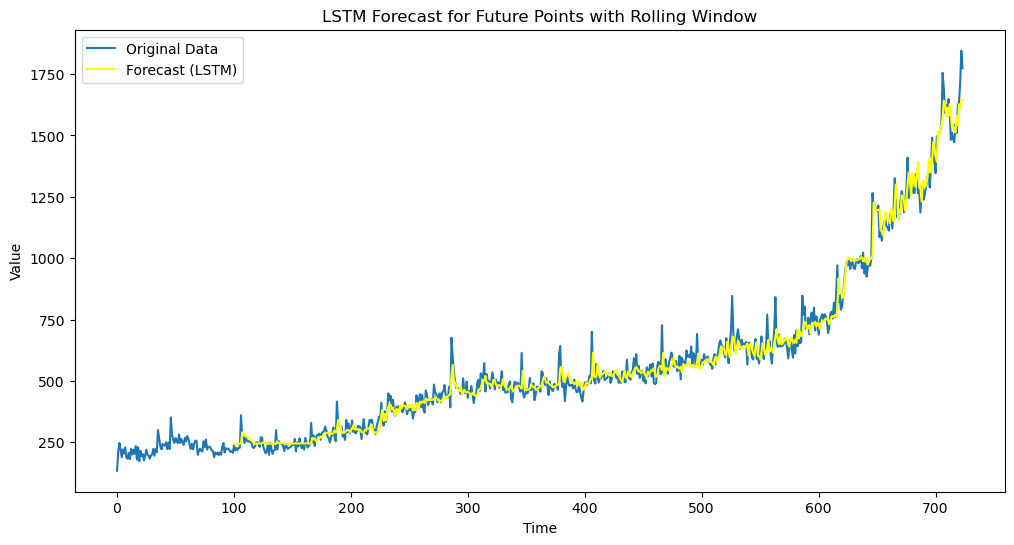

RMSE for LSTM: 44.42718383949145


In [38]:
# Plot des résultats
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(range(window_size, len(data)), forecast_values_lstm, label='Forecast (LSTM)', color='yellow')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LSTM Forecast for Future Points with Rolling Window')
plt.legend()
plt.show()

print("RMSE for LSTM:", rmse_lstm)

Remarque: on doit faire beaucoup de epoch pour que le model s'entraine sur les données

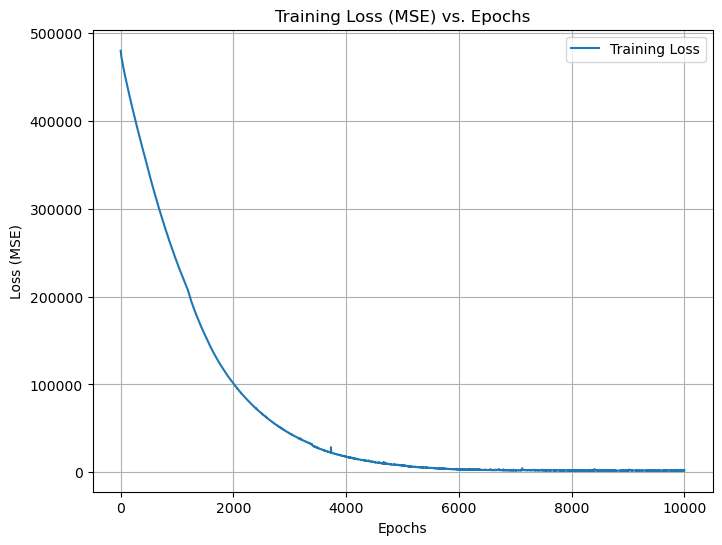

In [39]:
# Plot the error (RMSE) vs. epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss (MSE) vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
from keras.callbacks import History
from sklearn.model_selection import train_test_split

# Initialize History to record metrics during training
history = History()

# Préparation des données
data = df['nbr_of_tweets'].values  # Sélectionner la colonne des nombres de tweets
window_size = 100

# Fonction pour créer des séquences avec une fenêtre glissante
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Création des séquences pour l'entraînement et le test
X, y = create_sequences(data, window_size)

# Reshape des données pour le modèle LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], window_size, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construction du modèle LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle LSTM avec l'utilisation du callback History
history = model.fit(X_train, y_train, epochs=10000, batch_size=64, validation_data=(X_test, y_test))

# Get the loss values recorded during training
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']




Epoch 1/10000
8/8 [==============================] - 2s 86ms/step - loss: 469796.2188 - accuracy: 0.0000e+00 - val_loss: 515153.1562 - val_accuracy: 0.0000e+00
Epoch 2/10000
8/8 [==============================] - 0s 37ms/step - loss: 469488.8438 - accuracy: 0.0000e+00 - val_loss: 514921.2188 - val_accuracy: 0.0000e+00
Epoch 3/10000
8/8 [==============================] - 0s 38ms/step - loss: 469229.8438 - accuracy: 0.0000e+00 - val_loss: 514656.1562 - val_accuracy: 0.0000e+00
Epoch 4/10000
8/8 [==============================] - 0s 38ms/step - loss: 468938.9375 - accuracy: 0.0000e+00 - val_loss: 514143.4062 - val_accuracy: 0.0000e+00
Epoch 5/10000
8/8 [==============================] - 0s 39ms/step - loss: 468335.9375 - accuracy: 0.0000e+00 - val_loss: 513547.1875 - val_accuracy: 0.0000e+00
Epoch 6/10000
8/8 [==============================] - 0s 39ms/step - loss: 467919.5312 - accuracy: 0.0000e+00 - val_loss: 513333.5625 - val_accuracy: 0.0000e+00
Epoch 7/10000
8/8 [=====================

Epoch 52/10000
8/8 [==============================] - 0s 42ms/step - loss: 451985.6250 - accuracy: 0.0000e+00 - val_loss: 496912.7188 - val_accuracy: 0.0000e+00
Epoch 53/10000
8/8 [==============================] - 0s 41ms/step - loss: 451678.2500 - accuracy: 0.0000e+00 - val_loss: 496600.3125 - val_accuracy: 0.0000e+00
Epoch 54/10000
8/8 [==============================] - 0s 40ms/step - loss: 451377.1250 - accuracy: 0.0000e+00 - val_loss: 496286.4062 - val_accuracy: 0.0000e+00
Epoch 55/10000
8/8 [==============================] - 0s 40ms/step - loss: 451072.0000 - accuracy: 0.0000e+00 - val_loss: 495975.7500 - val_accuracy: 0.0000e+00
Epoch 56/10000
8/8 [==============================] - 0s 39ms/step - loss: 450767.9688 - accuracy: 0.0000e+00 - val_loss: 495668.0938 - val_accuracy: 0.0000e+00
Epoch 57/10000
8/8 [==============================] - 0s 40ms/step - loss: 450472.3125 - accuracy: 0.0000e+00 - val_loss: 495357.9375 - val_accuracy: 0.0000e+00
Epoch 58/10000
8/8 [==============

Epoch 103/10000
8/8 [==============================] - 0s 40ms/step - loss: 437227.8438 - accuracy: 0.0000e+00 - val_loss: 481775.9062 - val_accuracy: 0.0000e+00
Epoch 104/10000
8/8 [==============================] - 0s 39ms/step - loss: 436954.6250 - accuracy: 0.0000e+00 - val_loss: 481492.8125 - val_accuracy: 0.0000e+00
Epoch 105/10000
8/8 [==============================] - 0s 40ms/step - loss: 436679.8438 - accuracy: 0.0000e+00 - val_loss: 481209.9688 - val_accuracy: 0.0000e+00
Epoch 106/10000
8/8 [==============================] - 0s 39ms/step - loss: 436405.0000 - accuracy: 0.0000e+00 - val_loss: 480928.0312 - val_accuracy: 0.0000e+00
Epoch 107/10000
8/8 [==============================] - 0s 39ms/step - loss: 436131.6250 - accuracy: 0.0000e+00 - val_loss: 480645.9375 - val_accuracy: 0.0000e+00
Epoch 108/10000
8/8 [==============================] - 0s 40ms/step - loss: 435858.1562 - accuracy: 0.0000e+00 - val_loss: 480364.1875 - val_accuracy: 0.0000e+00
Epoch 109/10000
8/8 [=======

Epoch 204/10000
8/8 [==============================] - 0s 39ms/step - loss: 410675.0312 - accuracy: 0.0000e+00 - val_loss: 454488.3750 - val_accuracy: 0.0000e+00
Epoch 205/10000
8/8 [==============================] - 0s 40ms/step - loss: 410418.7500 - accuracy: 0.0000e+00 - val_loss: 454229.4375 - val_accuracy: 0.0000e+00
Epoch 206/10000
8/8 [==============================] - 0s 40ms/step - loss: 410167.2500 - accuracy: 0.0000e+00 - val_loss: 453969.2188 - val_accuracy: 0.0000e+00
Epoch 207/10000
8/8 [==============================] - 0s 41ms/step - loss: 409914.4062 - accuracy: 0.0000e+00 - val_loss: 453709.2188 - val_accuracy: 0.0000e+00
Epoch 208/10000
8/8 [==============================] - 0s 39ms/step - loss: 409661.7812 - accuracy: 0.0000e+00 - val_loss: 453448.3125 - val_accuracy: 0.0000e+00
Epoch 209/10000
8/8 [==============================] - 0s 40ms/step - loss: 409271.1250 - accuracy: 0.0000e+00 - val_loss: 452673.9062 - val_accuracy: 0.0000e+00
Epoch 210/10000
8/8 [=======

Epoch 305/10000
8/8 [==============================] - 0s 42ms/step - loss: 385065.6562 - accuracy: 0.0000e+00 - val_loss: 427917.0000 - val_accuracy: 0.0000e+00
Epoch 306/10000
8/8 [==============================] - 0s 39ms/step - loss: 384274.8125 - accuracy: 0.0000e+00 - val_loss: 427251.0938 - val_accuracy: 0.0000e+00
Epoch 307/10000
8/8 [==============================] - 0s 38ms/step - loss: 383960.0625 - accuracy: 0.0000e+00 - val_loss: 426999.3750 - val_accuracy: 0.0000e+00
Epoch 308/10000
8/8 [==============================] - 0s 39ms/step - loss: 383718.7500 - accuracy: 0.0000e+00 - val_loss: 426746.3125 - val_accuracy: 0.0000e+00
Epoch 309/10000
8/8 [==============================] - 0s 39ms/step - loss: 383471.7812 - accuracy: 0.0000e+00 - val_loss: 426495.9375 - val_accuracy: 0.0000e+00
Epoch 310/10000
8/8 [==============================] - 0s 40ms/step - loss: 383226.3125 - accuracy: 0.0000e+00 - val_loss: 426247.2188 - val_accuracy: 0.0000e+00
Epoch 311/10000
8/8 [=======

Epoch 406/10000
8/8 [==============================] - 0s 39ms/step - loss: 360524.9688 - accuracy: 0.0000e+00 - val_loss: 402855.9375 - val_accuracy: 0.0000e+00
Epoch 407/10000
8/8 [==============================] - 0s 40ms/step - loss: 360292.7188 - accuracy: 0.0000e+00 - val_loss: 402621.8750 - val_accuracy: 0.0000e+00
Epoch 408/10000
8/8 [==============================] - 0s 40ms/step - loss: 360068.4688 - accuracy: 0.0000e+00 - val_loss: 402383.0938 - val_accuracy: 0.0000e+00
Epoch 409/10000
8/8 [==============================] - 0s 40ms/step - loss: 359839.0312 - accuracy: 0.0000e+00 - val_loss: 402144.9375 - val_accuracy: 0.0000e+00
Epoch 410/10000
8/8 [==============================] - 0s 39ms/step - loss: 359606.3438 - accuracy: 0.0000e+00 - val_loss: 401909.8125 - val_accuracy: 0.0000e+00
Epoch 411/10000
8/8 [==============================] - 0s 40ms/step - loss: 359378.9375 - accuracy: 0.0000e+00 - val_loss: 401673.5938 - val_accuracy: 0.0000e+00
Epoch 412/10000
8/8 [=======

Epoch 507/10000
8/8 [==============================] - 0s 40ms/step - loss: 337986.3438 - accuracy: 0.0000e+00 - val_loss: 379599.6250 - val_accuracy: 0.0000e+00
Epoch 508/10000
8/8 [==============================] - 0s 40ms/step - loss: 337767.4688 - accuracy: 0.0000e+00 - val_loss: 379374.5938 - val_accuracy: 0.0000e+00
Epoch 509/10000
8/8 [==============================] - 0s 40ms/step - loss: 337548.1875 - accuracy: 0.0000e+00 - val_loss: 379151.7500 - val_accuracy: 0.0000e+00
Epoch 510/10000
8/8 [==============================] - 0s 39ms/step - loss: 337332.5000 - accuracy: 0.0000e+00 - val_loss: 378927.9375 - val_accuracy: 0.0000e+00
Epoch 511/10000
8/8 [==============================] - 0s 40ms/step - loss: 337115.2812 - accuracy: 0.0000e+00 - val_loss: 378704.5312 - val_accuracy: 0.0000e+00
Epoch 512/10000
8/8 [==============================] - 0s 40ms/step - loss: 336899.5938 - accuracy: 0.0000e+00 - val_loss: 378480.7812 - val_accuracy: 0.0000e+00
Epoch 513/10000
8/8 [=======

Epoch 608/10000
8/8 [==============================] - 0s 40ms/step - loss: 316644.8750 - accuracy: 0.0000e+00 - val_loss: 357557.1250 - val_accuracy: 0.0000e+00
Epoch 609/10000
8/8 [==============================] - 0s 42ms/step - loss: 316439.7812 - accuracy: 0.0000e+00 - val_loss: 357345.8438 - val_accuracy: 0.0000e+00
Epoch 610/10000
8/8 [==============================] - 0s 40ms/step - loss: 316238.7188 - accuracy: 0.0000e+00 - val_loss: 357130.4375 - val_accuracy: 0.0000e+00
Epoch 611/10000
8/8 [==============================] - 0s 40ms/step - loss: 316028.6250 - accuracy: 0.0000e+00 - val_loss: 356918.7812 - val_accuracy: 0.0000e+00
Epoch 612/10000
8/8 [==============================] - 0s 40ms/step - loss: 315827.1875 - accuracy: 0.0000e+00 - val_loss: 356704.2500 - val_accuracy: 0.0000e+00
Epoch 613/10000
8/8 [==============================] - 0s 40ms/step - loss: 315619.2188 - accuracy: 0.0000e+00 - val_loss: 356492.8125 - val_accuracy: 0.0000e+00
Epoch 614/10000
8/8 [=======

Epoch 709/10000
8/8 [==============================] - 0s 40ms/step - loss: 296434.2812 - accuracy: 0.0000e+00 - val_loss: 336636.0625 - val_accuracy: 0.0000e+00
Epoch 710/10000
8/8 [==============================] - 0s 40ms/step - loss: 296241.7812 - accuracy: 0.0000e+00 - val_loss: 336433.1875 - val_accuracy: 0.0000e+00
Epoch 711/10000
8/8 [==============================] - 0s 40ms/step - loss: 296044.3438 - accuracy: 0.0000e+00 - val_loss: 336233.2188 - val_accuracy: 0.0000e+00
Epoch 712/10000
8/8 [==============================] - 0s 41ms/step - loss: 295852.2812 - accuracy: 0.0000e+00 - val_loss: 336032.0000 - val_accuracy: 0.0000e+00
Epoch 713/10000
8/8 [==============================] - 0s 40ms/step - loss: 295657.9062 - accuracy: 0.0000e+00 - val_loss: 335831.8750 - val_accuracy: 0.0000e+00
Epoch 714/10000
8/8 [==============================] - 0s 40ms/step - loss: 295464.5000 - accuracy: 0.0000e+00 - val_loss: 335631.4062 - val_accuracy: 0.0000e+00
Epoch 715/10000
8/8 [=======

Epoch 810/10000
8/8 [==============================] - 0s 40ms/step - loss: 277343.2500 - accuracy: 0.0000e+00 - val_loss: 316842.9375 - val_accuracy: 0.0000e+00
Epoch 811/10000
8/8 [==============================] - 0s 40ms/step - loss: 277158.2188 - accuracy: 0.0000e+00 - val_loss: 316652.4375 - val_accuracy: 0.0000e+00
Epoch 812/10000
8/8 [==============================] - 0s 39ms/step - loss: 276975.1875 - accuracy: 0.0000e+00 - val_loss: 316461.6250 - val_accuracy: 0.0000e+00
Epoch 813/10000
8/8 [==============================] - 0s 40ms/step - loss: 276793.0938 - accuracy: 0.0000e+00 - val_loss: 316270.0312 - val_accuracy: 0.0000e+00
Epoch 814/10000
8/8 [==============================] - 0s 40ms/step - loss: 276609.1562 - accuracy: 0.0000e+00 - val_loss: 316079.5625 - val_accuracy: 0.0000e+00
Epoch 815/10000
8/8 [==============================] - 0s 40ms/step - loss: 276424.3750 - accuracy: 0.0000e+00 - val_loss: 315890.5625 - val_accuracy: 0.0000e+00
Epoch 816/10000
8/8 [=======

Epoch 911/10000
8/8 [==============================] - 0s 40ms/step - loss: 259329.5469 - accuracy: 0.0000e+00 - val_loss: 298127.2188 - val_accuracy: 0.0000e+00
Epoch 912/10000
8/8 [==============================] - 0s 40ms/step - loss: 259154.3750 - accuracy: 0.0000e+00 - val_loss: 297948.0312 - val_accuracy: 0.0000e+00
Epoch 913/10000
8/8 [==============================] - 0s 40ms/step - loss: 258980.5625 - accuracy: 0.0000e+00 - val_loss: 297769.4375 - val_accuracy: 0.0000e+00
Epoch 914/10000
8/8 [==============================] - 0s 40ms/step - loss: 258807.8281 - accuracy: 0.0000e+00 - val_loss: 297590.5625 - val_accuracy: 0.0000e+00
Epoch 915/10000
8/8 [==============================] - 0s 40ms/step - loss: 258638.3906 - accuracy: 0.0000e+00 - val_loss: 297409.1562 - val_accuracy: 0.0000e+00
Epoch 916/10000
8/8 [==============================] - 0s 40ms/step - loss: 258466.5469 - accuracy: 0.0000e+00 - val_loss: 297227.4688 - val_accuracy: 0.0000e+00
Epoch 917/10000
8/8 [=======

8/8 [==============================] - 0s 40ms/step - loss: 242554.3594 - accuracy: 0.0000e+00 - val_loss: 280665.5938 - val_accuracy: 0.0000e+00
Epoch 1012/10000
8/8 [==============================] - 0s 40ms/step - loss: 242392.1250 - accuracy: 0.0000e+00 - val_loss: 280496.0000 - val_accuracy: 0.0000e+00
Epoch 1013/10000
8/8 [==============================] - 0s 40ms/step - loss: 242228.0156 - accuracy: 0.0000e+00 - val_loss: 280327.3750 - val_accuracy: 0.0000e+00
Epoch 1014/10000
8/8 [==============================] - 0s 44ms/step - loss: 242065.9219 - accuracy: 0.0000e+00 - val_loss: 280158.4375 - val_accuracy: 0.0000e+00
Epoch 1015/10000
8/8 [==============================] - 0s 40ms/step - loss: 241904.2344 - accuracy: 0.0000e+00 - val_loss: 279989.2188 - val_accuracy: 0.0000e+00
Epoch 1016/10000
8/8 [==============================] - 0s 40ms/step - loss: 241743.2656 - accuracy: 0.0000e+00 - val_loss: 279819.0625 - val_accuracy: 0.0000e+00
Epoch 1017/10000
8/8 [=================

8/8 [==============================] - 0s 39ms/step - loss: 226826.5000 - accuracy: 0.0000e+00 - val_loss: 264251.0312 - val_accuracy: 0.0000e+00
Epoch 1112/10000
8/8 [==============================] - 0s 40ms/step - loss: 226674.4219 - accuracy: 0.0000e+00 - val_loss: 264092.0000 - val_accuracy: 0.0000e+00
Epoch 1113/10000
8/8 [==============================] - 0s 40ms/step - loss: 226522.3438 - accuracy: 0.0000e+00 - val_loss: 263933.0938 - val_accuracy: 0.0000e+00
Epoch 1114/10000
8/8 [==============================] - 0s 40ms/step - loss: 226371.2344 - accuracy: 0.0000e+00 - val_loss: 263773.8750 - val_accuracy: 0.0000e+00
Epoch 1115/10000
8/8 [==============================] - 0s 40ms/step - loss: 226219.1875 - accuracy: 0.0000e+00 - val_loss: 263615.5938 - val_accuracy: 0.0000e+00
Epoch 1116/10000
8/8 [==============================] - 0s 40ms/step - loss: 226068.2969 - accuracy: 0.0000e+00 - val_loss: 263457.4375 - val_accuracy: 0.0000e+00
Epoch 1117/10000
8/8 [=================

8/8 [==============================] - 0s 40ms/step - loss: 212091.5000 - accuracy: 0.0000e+00 - val_loss: 248834.6250 - val_accuracy: 0.0000e+00
Epoch 1212/10000
8/8 [==============================] - 0s 41ms/step - loss: 211949.7031 - accuracy: 0.0000e+00 - val_loss: 248680.6094 - val_accuracy: 0.0000e+00
Epoch 1213/10000
8/8 [==============================] - 0s 40ms/step - loss: 211799.6094 - accuracy: 0.0000e+00 - val_loss: 248525.5625 - val_accuracy: 0.0000e+00
Epoch 1214/10000
8/8 [==============================] - 0s 40ms/step - loss: 211648.7031 - accuracy: 0.0000e+00 - val_loss: 248373.8438 - val_accuracy: 0.0000e+00
Epoch 1215/10000
8/8 [==============================] - 0s 40ms/step - loss: 211503.5156 - accuracy: 0.0000e+00 - val_loss: 248218.2656 - val_accuracy: 0.0000e+00
Epoch 1216/10000
8/8 [==============================] - 0s 40ms/step - loss: 211356.7188 - accuracy: 0.0000e+00 - val_loss: 248063.7812 - val_accuracy: 0.0000e+00
Epoch 1217/10000
8/8 [=================

8/8 [==============================] - 0s 40ms/step - loss: 195556.4219 - accuracy: 0.0000e+00 - val_loss: 231450.5625 - val_accuracy: 0.0000e+00
Epoch 1312/10000
8/8 [==============================] - 0s 40ms/step - loss: 195394.5312 - accuracy: 0.0000e+00 - val_loss: 231287.9375 - val_accuracy: 0.0000e+00
Epoch 1313/10000
8/8 [==============================] - 0s 40ms/step - loss: 195237.4219 - accuracy: 0.0000e+00 - val_loss: 231124.8594 - val_accuracy: 0.0000e+00
Epoch 1314/10000
8/8 [==============================] - 0s 40ms/step - loss: 195082.4375 - accuracy: 0.0000e+00 - val_loss: 230959.2344 - val_accuracy: 0.0000e+00
Epoch 1315/10000
8/8 [==============================] - 0s 40ms/step - loss: 194934.1875 - accuracy: 0.0000e+00 - val_loss: 230792.2344 - val_accuracy: 0.0000e+00
Epoch 1316/10000
8/8 [==============================] - 0s 39ms/step - loss: 194768.7656 - accuracy: 0.0000e+00 - val_loss: 230633.1406 - val_accuracy: 0.0000e+00
Epoch 1317/10000
8/8 [=================

8/8 [==============================] - 0s 40ms/step - loss: 180235.1094 - accuracy: 0.0000e+00 - val_loss: 215312.6406 - val_accuracy: 0.0000e+00
Epoch 1412/10000
8/8 [==============================] - 0s 40ms/step - loss: 180092.2656 - accuracy: 0.0000e+00 - val_loss: 215158.8438 - val_accuracy: 0.0000e+00
Epoch 1413/10000
8/8 [==============================] - 0s 40ms/step - loss: 179949.6094 - accuracy: 0.0000e+00 - val_loss: 215002.9688 - val_accuracy: 0.0000e+00
Epoch 1414/10000
8/8 [==============================] - 0s 40ms/step - loss: 179795.8594 - accuracy: 0.0000e+00 - val_loss: 214854.7812 - val_accuracy: 0.0000e+00
Epoch 1415/10000
8/8 [==============================] - 0s 40ms/step - loss: 179654.4375 - accuracy: 0.0000e+00 - val_loss: 214698.0781 - val_accuracy: 0.0000e+00
Epoch 1416/10000
8/8 [==============================] - 0s 40ms/step - loss: 179502.2500 - accuracy: 0.0000e+00 - val_loss: 214541.2812 - val_accuracy: 0.0000e+00
Epoch 1417/10000
8/8 [=================

8/8 [==============================] - 0s 40ms/step - loss: 166363.1875 - accuracy: 0.0000e+00 - val_loss: 200685.6562 - val_accuracy: 0.0000e+00
Epoch 1512/10000
8/8 [==============================] - 0s 41ms/step - loss: 166228.7969 - accuracy: 0.0000e+00 - val_loss: 200532.3906 - val_accuracy: 0.0000e+00
Epoch 1513/10000
8/8 [==============================] - 0s 40ms/step - loss: 166094.0938 - accuracy: 0.0000e+00 - val_loss: 200395.1094 - val_accuracy: 0.0000e+00
Epoch 1514/10000
8/8 [==============================] - 0s 40ms/step - loss: 165968.5156 - accuracy: 0.0000e+00 - val_loss: 200247.2969 - val_accuracy: 0.0000e+00
Epoch 1515/10000
8/8 [==============================] - 0s 41ms/step - loss: 165829.7500 - accuracy: 0.0000e+00 - val_loss: 200111.7188 - val_accuracy: 0.0000e+00
Epoch 1516/10000
8/8 [==============================] - 0s 40ms/step - loss: 165706.7031 - accuracy: 0.0000e+00 - val_loss: 199969.2656 - val_accuracy: 0.0000e+00
Epoch 1517/10000
8/8 [=================

8/8 [==============================] - 0s 40ms/step - loss: 153746.5938 - accuracy: 0.0000e+00 - val_loss: 187323.5938 - val_accuracy: 0.0000e+00
Epoch 1612/10000
8/8 [==============================] - 0s 40ms/step - loss: 153620.5469 - accuracy: 0.0000e+00 - val_loss: 187184.5469 - val_accuracy: 0.0000e+00
Epoch 1613/10000
8/8 [==============================] - 0s 40ms/step - loss: 153507.8594 - accuracy: 0.0000e+00 - val_loss: 187097.1562 - val_accuracy: 0.0000e+00
Epoch 1614/10000
8/8 [==============================] - 0s 40ms/step - loss: 153368.5781 - accuracy: 0.0000e+00 - val_loss: 186917.9531 - val_accuracy: 0.0000e+00
Epoch 1615/10000
8/8 [==============================] - 0s 40ms/step - loss: 153262.1250 - accuracy: 0.0000e+00 - val_loss: 186804.5781 - val_accuracy: 0.0000e+00
Epoch 1616/10000
8/8 [==============================] - 0s 41ms/step - loss: 153135.6406 - accuracy: 0.0000e+00 - val_loss: 186692.5625 - val_accuracy: 0.0000e+00
Epoch 1617/10000
8/8 [=================

8/8 [==============================] - 0s 39ms/step - loss: 142204.5469 - accuracy: 0.0000e+00 - val_loss: 175110.3750 - val_accuracy: 0.0000e+00
Epoch 1712/10000
8/8 [==============================] - 0s 41ms/step - loss: 142103.2969 - accuracy: 0.0000e+00 - val_loss: 174996.1562 - val_accuracy: 0.0000e+00
Epoch 1713/10000
8/8 [==============================] - 0s 40ms/step - loss: 141985.3906 - accuracy: 0.0000e+00 - val_loss: 174882.2344 - val_accuracy: 0.0000e+00
Epoch 1714/10000
8/8 [==============================] - 0s 40ms/step - loss: 141874.4844 - accuracy: 0.0000e+00 - val_loss: 174764.3438 - val_accuracy: 0.0000e+00
Epoch 1715/10000
8/8 [==============================] - 0s 40ms/step - loss: 141764.6875 - accuracy: 0.0000e+00 - val_loss: 174647.6562 - val_accuracy: 0.0000e+00
Epoch 1716/10000
8/8 [==============================] - 0s 40ms/step - loss: 141655.4531 - accuracy: 0.0000e+00 - val_loss: 174522.7188 - val_accuracy: 0.0000e+00
Epoch 1717/10000
8/8 [=================

8/8 [==============================] - 0s 38ms/step - loss: 131734.3750 - accuracy: 0.0000e+00 - val_loss: 163899.3438 - val_accuracy: 0.0000e+00
Epoch 1812/10000
8/8 [==============================] - 0s 38ms/step - loss: 131618.3750 - accuracy: 0.0000e+00 - val_loss: 163773.6250 - val_accuracy: 0.0000e+00
Epoch 1813/10000
8/8 [==============================] - 0s 39ms/step - loss: 131542.6094 - accuracy: 0.0000e+00 - val_loss: 163637.3594 - val_accuracy: 0.0000e+00
Epoch 1814/10000
8/8 [==============================] - 0s 38ms/step - loss: 131408.0625 - accuracy: 0.0000e+00 - val_loss: 163512.9688 - val_accuracy: 0.0000e+00
Epoch 1815/10000
8/8 [==============================] - 0s 38ms/step - loss: 131304.2031 - accuracy: 0.0000e+00 - val_loss: 163410.0938 - val_accuracy: 0.0000e+00
Epoch 1816/10000
8/8 [==============================] - 0s 39ms/step - loss: 131192.3125 - accuracy: 0.0000e+00 - val_loss: 163316.6562 - val_accuracy: 0.0000e+00
Epoch 1817/10000
8/8 [=================

8/8 [==============================] - 0s 40ms/step - loss: 122115.9062 - accuracy: 0.0000e+00 - val_loss: 153458.8750 - val_accuracy: 0.0000e+00
Epoch 1912/10000
8/8 [==============================] - 0s 40ms/step - loss: 122055.0156 - accuracy: 0.0000e+00 - val_loss: 153353.5000 - val_accuracy: 0.0000e+00
Epoch 1913/10000
8/8 [==============================] - 0s 40ms/step - loss: 121955.5469 - accuracy: 0.0000e+00 - val_loss: 153327.5469 - val_accuracy: 0.0000e+00
Epoch 1914/10000
8/8 [==============================] - 0s 40ms/step - loss: 121891.4453 - accuracy: 0.0000e+00 - val_loss: 153246.4844 - val_accuracy: 0.0000e+00
Epoch 1915/10000
8/8 [==============================] - 0s 40ms/step - loss: 121781.4453 - accuracy: 0.0000e+00 - val_loss: 153141.3438 - val_accuracy: 0.0000e+00
Epoch 1916/10000
8/8 [==============================] - 0s 40ms/step - loss: 121696.6953 - accuracy: 0.0000e+00 - val_loss: 152996.6094 - val_accuracy: 0.0000e+00
Epoch 1917/10000
8/8 [=================

8/8 [==============================] - 0s 40ms/step - loss: 113470.8281 - accuracy: 0.0000e+00 - val_loss: 143978.8750 - val_accuracy: 0.0000e+00
Epoch 2012/10000
8/8 [==============================] - 0s 40ms/step - loss: 113370.3906 - accuracy: 0.0000e+00 - val_loss: 143889.0156 - val_accuracy: 0.0000e+00
Epoch 2013/10000
8/8 [==============================] - 0s 40ms/step - loss: 113285.3359 - accuracy: 0.0000e+00 - val_loss: 143814.0781 - val_accuracy: 0.0000e+00
Epoch 2014/10000
8/8 [==============================] - 0s 40ms/step - loss: 113216.8750 - accuracy: 0.0000e+00 - val_loss: 143782.2656 - val_accuracy: 0.0000e+00
Epoch 2015/10000
8/8 [==============================] - 0s 40ms/step - loss: 113131.3359 - accuracy: 0.0000e+00 - val_loss: 143632.3594 - val_accuracy: 0.0000e+00
Epoch 2016/10000
8/8 [==============================] - 0s 40ms/step - loss: 113036.9219 - accuracy: 0.0000e+00 - val_loss: 143535.6562 - val_accuracy: 0.0000e+00
Epoch 2017/10000
8/8 [=================

8/8 [==============================] - 0s 40ms/step - loss: 105583.9766 - accuracy: 0.0000e+00 - val_loss: 135373.1875 - val_accuracy: 0.0000e+00
Epoch 2112/10000
8/8 [==============================] - 0s 41ms/step - loss: 105488.6172 - accuracy: 0.0000e+00 - val_loss: 135401.0312 - val_accuracy: 0.0000e+00
Epoch 2113/10000
8/8 [==============================] - 0s 40ms/step - loss: 105449.0938 - accuracy: 0.0000e+00 - val_loss: 135218.8438 - val_accuracy: 0.0000e+00
Epoch 2114/10000
8/8 [==============================] - 0s 40ms/step - loss: 105331.0625 - accuracy: 0.0000e+00 - val_loss: 135153.1875 - val_accuracy: 0.0000e+00
Epoch 2115/10000
8/8 [==============================] - 0s 40ms/step - loss: 105257.6875 - accuracy: 0.0000e+00 - val_loss: 135044.6719 - val_accuracy: 0.0000e+00
Epoch 2116/10000
8/8 [==============================] - 0s 40ms/step - loss: 105180.8984 - accuracy: 0.0000e+00 - val_loss: 134965.5781 - val_accuracy: 0.0000e+00
Epoch 2117/10000
8/8 [=================

8/8 [==============================] - 0s 40ms/step - loss: 98354.4062 - accuracy: 0.0000e+00 - val_loss: 127332.1953 - val_accuracy: 0.0000e+00
Epoch 2212/10000
8/8 [==============================] - 0s 40ms/step - loss: 98272.7344 - accuracy: 0.0000e+00 - val_loss: 127293.1328 - val_accuracy: 0.0000e+00
Epoch 2213/10000
8/8 [==============================] - 0s 40ms/step - loss: 98198.0078 - accuracy: 0.0000e+00 - val_loss: 127224.2578 - val_accuracy: 0.0000e+00
Epoch 2214/10000
8/8 [==============================] - 0s 40ms/step - loss: 98114.0781 - accuracy: 0.0000e+00 - val_loss: 127133.0625 - val_accuracy: 0.0000e+00
Epoch 2215/10000
8/8 [==============================] - 0s 40ms/step - loss: 98084.5078 - accuracy: 0.0000e+00 - val_loss: 127063.0234 - val_accuracy: 0.0000e+00
Epoch 2216/10000
8/8 [==============================] - 0s 41ms/step - loss: 98004.3594 - accuracy: 0.0000e+00 - val_loss: 126997.5391 - val_accuracy: 0.0000e+00
Epoch 2217/10000
8/8 [=======================

Epoch 2262/10000
8/8 [==============================] - 0s 40ms/step - loss: 94895.8281 - accuracy: 0.0000e+00 - val_loss: 123510.2031 - val_accuracy: 0.0000e+00
Epoch 2263/10000
8/8 [==============================] - 0s 40ms/step - loss: 94842.5156 - accuracy: 0.0000e+00 - val_loss: 123389.6016 - val_accuracy: 0.0000e+00
Epoch 2264/10000
8/8 [==============================] - 0s 40ms/step - loss: 94761.2188 - accuracy: 0.0000e+00 - val_loss: 123299.2500 - val_accuracy: 0.0000e+00
Epoch 2265/10000
8/8 [==============================] - 0s 40ms/step - loss: 94692.8906 - accuracy: 0.0000e+00 - val_loss: 123196.7734 - val_accuracy: 0.0000e+00
Epoch 2266/10000
8/8 [==============================] - 0s 40ms/step - loss: 94612.7891 - accuracy: 0.0000e+00 - val_loss: 123154.1172 - val_accuracy: 0.0000e+00
Epoch 2267/10000
8/8 [==============================] - 0s 40ms/step - loss: 94563.9297 - accuracy: 0.0000e+00 - val_loss: 123032.7891 - val_accuracy: 0.0000e+00
Epoch 2268/10000
8/8 [======

Epoch 2363/10000
8/8 [==============================] - 0s 43ms/step - loss: 88378.3672 - accuracy: 0.0000e+00 - val_loss: 115943.2891 - val_accuracy: 0.0000e+00
Epoch 2364/10000
8/8 [==============================] - 0s 41ms/step - loss: 88254.0312 - accuracy: 0.0000e+00 - val_loss: 115862.3047 - val_accuracy: 0.0000e+00
Epoch 2365/10000
8/8 [==============================] - 0s 40ms/step - loss: 88275.8906 - accuracy: 0.0000e+00 - val_loss: 115837.4062 - val_accuracy: 0.0000e+00
Epoch 2366/10000
8/8 [==============================] - 0s 40ms/step - loss: 88155.4531 - accuracy: 0.0000e+00 - val_loss: 115801.5625 - val_accuracy: 0.0000e+00
Epoch 2367/10000
8/8 [==============================] - 0s 40ms/step - loss: 88063.9375 - accuracy: 0.0000e+00 - val_loss: 115616.4609 - val_accuracy: 0.0000e+00
Epoch 2368/10000
8/8 [==============================] - 0s 40ms/step - loss: 87977.3594 - accuracy: 0.0000e+00 - val_loss: 115557.6328 - val_accuracy: 0.0000e+00
Epoch 2369/10000
8/8 [======

Epoch 2464/10000
8/8 [==============================] - 0s 40ms/step - loss: 82257.5625 - accuracy: 0.0000e+00 - val_loss: 108849.4688 - val_accuracy: 0.0000e+00
Epoch 2465/10000
8/8 [==============================] - 0s 41ms/step - loss: 82194.9688 - accuracy: 0.0000e+00 - val_loss: 108791.2812 - val_accuracy: 0.0000e+00
Epoch 2466/10000
8/8 [==============================] - 0s 40ms/step - loss: 82141.6328 - accuracy: 0.0000e+00 - val_loss: 108717.0391 - val_accuracy: 0.0000e+00
Epoch 2467/10000
8/8 [==============================] - 0s 40ms/step - loss: 82105.0625 - accuracy: 0.0000e+00 - val_loss: 108712.7969 - val_accuracy: 0.0000e+00
Epoch 2468/10000
8/8 [==============================] - 0s 40ms/step - loss: 82066.7734 - accuracy: 0.0000e+00 - val_loss: 108636.4141 - val_accuracy: 0.0000e+00
Epoch 2469/10000
8/8 [==============================] - 0s 40ms/step - loss: 82013.5469 - accuracy: 0.0000e+00 - val_loss: 108518.2891 - val_accuracy: 0.0000e+00
Epoch 2470/10000
8/8 [======

Epoch 2565/10000
8/8 [==============================] - 0s 40ms/step - loss: 76641.2188 - accuracy: 0.0000e+00 - val_loss: 102327.2500 - val_accuracy: 0.0000e+00
Epoch 2566/10000
8/8 [==============================] - 0s 40ms/step - loss: 76686.3125 - accuracy: 0.0000e+00 - val_loss: 102144.7969 - val_accuracy: 0.0000e+00
Epoch 2567/10000
8/8 [==============================] - 0s 40ms/step - loss: 76623.5547 - accuracy: 0.0000e+00 - val_loss: 102181.1797 - val_accuracy: 0.0000e+00
Epoch 2568/10000
8/8 [==============================] - 0s 41ms/step - loss: 76709.0859 - accuracy: 0.0000e+00 - val_loss: 102067.3828 - val_accuracy: 0.0000e+00
Epoch 2569/10000
8/8 [==============================] - 0s 40ms/step - loss: 76519.3047 - accuracy: 0.0000e+00 - val_loss: 101989.9375 - val_accuracy: 0.0000e+00
Epoch 2570/10000
8/8 [==============================] - 0s 42ms/step - loss: 76409.5469 - accuracy: 0.0000e+00 - val_loss: 101941.0156 - val_accuracy: 0.0000e+00
Epoch 2571/10000
8/8 [======

Epoch 2616/10000
8/8 [==============================] - 0s 40ms/step - loss: 73992.3672 - accuracy: 0.0000e+00 - val_loss: 99101.5859 - val_accuracy: 0.0000e+00
Epoch 2617/10000
8/8 [==============================] - 0s 40ms/step - loss: 73981.3203 - accuracy: 0.0000e+00 - val_loss: 98882.0625 - val_accuracy: 0.0000e+00
Epoch 2618/10000
8/8 [==============================] - 0s 41ms/step - loss: 73920.5078 - accuracy: 0.0000e+00 - val_loss: 98882.3516 - val_accuracy: 0.0000e+00
Epoch 2619/10000
8/8 [==============================] - 0s 40ms/step - loss: 73832.2266 - accuracy: 0.0000e+00 - val_loss: 98820.5469 - val_accuracy: 0.0000e+00
Epoch 2620/10000
8/8 [==============================] - 0s 41ms/step - loss: 73785.5938 - accuracy: 0.0000e+00 - val_loss: 98773.8516 - val_accuracy: 0.0000e+00
Epoch 2621/10000
8/8 [==============================] - 0s 40ms/step - loss: 73771.7500 - accuracy: 0.0000e+00 - val_loss: 98723.9375 - val_accuracy: 0.0000e+00
Epoch 2622/10000
8/8 [============

Epoch 2667/10000
8/8 [==============================] - 0s 40ms/step - loss: 71507.4141 - accuracy: 0.0000e+00 - val_loss: 95860.5625 - val_accuracy: 0.0000e+00
Epoch 2668/10000
8/8 [==============================] - 0s 41ms/step - loss: 71408.9609 - accuracy: 0.0000e+00 - val_loss: 95794.2266 - val_accuracy: 0.0000e+00
Epoch 2669/10000
8/8 [==============================] - 0s 40ms/step - loss: 71424.4297 - accuracy: 0.0000e+00 - val_loss: 95671.1875 - val_accuracy: 0.0000e+00
Epoch 2670/10000
8/8 [==============================] - 0s 40ms/step - loss: 71341.0078 - accuracy: 0.0000e+00 - val_loss: 95771.6484 - val_accuracy: 0.0000e+00
Epoch 2671/10000
8/8 [==============================] - 0s 40ms/step - loss: 71328.9766 - accuracy: 0.0000e+00 - val_loss: 95684.7656 - val_accuracy: 0.0000e+00
Epoch 2672/10000
8/8 [==============================] - 0s 40ms/step - loss: 71257.9062 - accuracy: 0.0000e+00 - val_loss: 95581.5312 - val_accuracy: 0.0000e+00
Epoch 2673/10000
8/8 [============

Epoch 2718/10000
8/8 [==============================] - 0s 47ms/step - loss: 69079.6328 - accuracy: 0.0000e+00 - val_loss: 92972.3672 - val_accuracy: 0.0000e+00
Epoch 2719/10000
8/8 [==============================] - 0s 42ms/step - loss: 69099.0938 - accuracy: 0.0000e+00 - val_loss: 92665.6562 - val_accuracy: 0.0000e+00
Epoch 2720/10000
8/8 [==============================] - 0s 40ms/step - loss: 68967.6953 - accuracy: 0.0000e+00 - val_loss: 92697.7578 - val_accuracy: 0.0000e+00
Epoch 2721/10000
8/8 [==============================] - 0s 40ms/step - loss: 68911.9844 - accuracy: 0.0000e+00 - val_loss: 92596.5781 - val_accuracy: 0.0000e+00
Epoch 2722/10000
8/8 [==============================] - 0s 40ms/step - loss: 68866.7500 - accuracy: 0.0000e+00 - val_loss: 92537.5078 - val_accuracy: 0.0000e+00
Epoch 2723/10000
8/8 [==============================] - 0s 40ms/step - loss: 68818.6797 - accuracy: 0.0000e+00 - val_loss: 92492.6328 - val_accuracy: 0.0000e+00
Epoch 2724/10000
8/8 [============

Epoch 2769/10000
8/8 [==============================] - 0s 40ms/step - loss: 66784.7422 - accuracy: 0.0000e+00 - val_loss: 89763.0391 - val_accuracy: 0.0000e+00
Epoch 2770/10000
8/8 [==============================] - 0s 40ms/step - loss: 66731.5781 - accuracy: 0.0000e+00 - val_loss: 89811.3828 - val_accuracy: 0.0000e+00
Epoch 2771/10000
8/8 [==============================] - 0s 39ms/step - loss: 66675.1797 - accuracy: 0.0000e+00 - val_loss: 89738.2031 - val_accuracy: 0.0000e+00
Epoch 2772/10000
8/8 [==============================] - 0s 40ms/step - loss: 66645.5625 - accuracy: 0.0000e+00 - val_loss: 89604.7500 - val_accuracy: 0.0000e+00
Epoch 2773/10000
8/8 [==============================] - 0s 42ms/step - loss: 66563.0000 - accuracy: 0.0000e+00 - val_loss: 89538.9375 - val_accuracy: 0.0000e+00
Epoch 2774/10000
8/8 [==============================] - 0s 40ms/step - loss: 66496.9375 - accuracy: 0.0000e+00 - val_loss: 89536.6094 - val_accuracy: 0.0000e+00
Epoch 2775/10000
8/8 [============

Epoch 2820/10000
8/8 [==============================] - 0s 40ms/step - loss: 64500.8008 - accuracy: 0.0000e+00 - val_loss: 87006.0312 - val_accuracy: 0.0000e+00
Epoch 2821/10000
8/8 [==============================] - 0s 40ms/step - loss: 64457.9023 - accuracy: 0.0000e+00 - val_loss: 86850.1562 - val_accuracy: 0.0000e+00
Epoch 2822/10000
8/8 [==============================] - 0s 40ms/step - loss: 64556.7070 - accuracy: 0.0000e+00 - val_loss: 86821.1172 - val_accuracy: 0.0000e+00
Epoch 2823/10000
8/8 [==============================] - 0s 40ms/step - loss: 64388.2617 - accuracy: 0.0000e+00 - val_loss: 86683.9844 - val_accuracy: 0.0000e+00
Epoch 2824/10000
8/8 [==============================] - 0s 40ms/step - loss: 64327.4805 - accuracy: 0.0000e+00 - val_loss: 86668.2578 - val_accuracy: 0.0000e+00
Epoch 2825/10000
8/8 [==============================] - 0s 40ms/step - loss: 64280.9258 - accuracy: 0.0000e+00 - val_loss: 86613.2891 - val_accuracy: 0.0000e+00
Epoch 2826/10000
8/8 [============

Epoch 2871/10000
8/8 [==============================] - 0s 40ms/step - loss: 62413.4258 - accuracy: 0.0000e+00 - val_loss: 84034.7266 - val_accuracy: 0.0000e+00
Epoch 2872/10000
8/8 [==============================] - 0s 42ms/step - loss: 62359.0391 - accuracy: 0.0000e+00 - val_loss: 83988.2500 - val_accuracy: 0.0000e+00
Epoch 2873/10000
8/8 [==============================] - 0s 40ms/step - loss: 62296.3203 - accuracy: 0.0000e+00 - val_loss: 83930.3281 - val_accuracy: 0.0000e+00
Epoch 2874/10000
8/8 [==============================] - 0s 40ms/step - loss: 62292.1250 - accuracy: 0.0000e+00 - val_loss: 83936.3516 - val_accuracy: 0.0000e+00
Epoch 2875/10000
8/8 [==============================] - 0s 40ms/step - loss: 62223.5156 - accuracy: 0.0000e+00 - val_loss: 83838.4375 - val_accuracy: 0.0000e+00
Epoch 2876/10000
8/8 [==============================] - 0s 40ms/step - loss: 62154.4844 - accuracy: 0.0000e+00 - val_loss: 83733.6328 - val_accuracy: 0.0000e+00
Epoch 2877/10000
8/8 [============

Epoch 2922/10000
8/8 [==============================] - 0s 41ms/step - loss: 60338.9531 - accuracy: 0.0000e+00 - val_loss: 81365.1172 - val_accuracy: 0.0000e+00
Epoch 2923/10000
8/8 [==============================] - 0s 40ms/step - loss: 60262.7656 - accuracy: 0.0000e+00 - val_loss: 81286.2344 - val_accuracy: 0.0000e+00
Epoch 2924/10000
8/8 [==============================] - 0s 40ms/step - loss: 60217.5469 - accuracy: 0.0000e+00 - val_loss: 81277.3984 - val_accuracy: 0.0000e+00
Epoch 2925/10000
8/8 [==============================] - 0s 40ms/step - loss: 60207.9922 - accuracy: 0.0000e+00 - val_loss: 81229.2266 - val_accuracy: 0.0000e+00
Epoch 2926/10000
8/8 [==============================] - 0s 40ms/step - loss: 60200.2734 - accuracy: 0.0000e+00 - val_loss: 81126.2578 - val_accuracy: 0.0000e+00
Epoch 2927/10000
8/8 [==============================] - 0s 41ms/step - loss: 60131.8398 - accuracy: 0.0000e+00 - val_loss: 81132.2422 - val_accuracy: 0.0000e+00
Epoch 2928/10000
8/8 [============

Epoch 2973/10000
8/8 [==============================] - 0s 40ms/step - loss: 58364.4805 - accuracy: 0.0000e+00 - val_loss: 78893.7031 - val_accuracy: 0.0000e+00
Epoch 2974/10000
8/8 [==============================] - 0s 40ms/step - loss: 58353.2969 - accuracy: 0.0000e+00 - val_loss: 78636.1172 - val_accuracy: 0.0000e+00
Epoch 2975/10000
8/8 [==============================] - 0s 41ms/step - loss: 58309.3359 - accuracy: 0.0000e+00 - val_loss: 78568.6719 - val_accuracy: 0.0000e+00
Epoch 2976/10000
8/8 [==============================] - 0s 40ms/step - loss: 58248.9141 - accuracy: 0.0000e+00 - val_loss: 78492.6094 - val_accuracy: 0.0000e+00
Epoch 2977/10000
8/8 [==============================] - 0s 40ms/step - loss: 58206.7188 - accuracy: 0.0000e+00 - val_loss: 78446.4766 - val_accuracy: 0.0000e+00
Epoch 2978/10000
8/8 [==============================] - 0s 40ms/step - loss: 58154.4141 - accuracy: 0.0000e+00 - val_loss: 78406.8125 - val_accuracy: 0.0000e+00
Epoch 2979/10000
8/8 [============

Epoch 3024/10000
8/8 [==============================] - 0s 40ms/step - loss: 56443.9023 - accuracy: 0.0000e+00 - val_loss: 76037.3750 - val_accuracy: 0.0000e+00
Epoch 3025/10000
8/8 [==============================] - 0s 40ms/step - loss: 56359.7812 - accuracy: 0.0000e+00 - val_loss: 76000.8203 - val_accuracy: 0.0000e+00
Epoch 3026/10000
8/8 [==============================] - 0s 40ms/step - loss: 56348.2930 - accuracy: 0.0000e+00 - val_loss: 76043.3125 - val_accuracy: 0.0000e+00
Epoch 3027/10000
8/8 [==============================] - 0s 41ms/step - loss: 56379.1680 - accuracy: 0.0000e+00 - val_loss: 75876.7031 - val_accuracy: 0.0000e+00
Epoch 3028/10000
8/8 [==============================] - 0s 40ms/step - loss: 56290.2773 - accuracy: 0.0000e+00 - val_loss: 75889.9219 - val_accuracy: 0.0000e+00
Epoch 3029/10000
8/8 [==============================] - 0s 40ms/step - loss: 56209.5820 - accuracy: 0.0000e+00 - val_loss: 75800.7031 - val_accuracy: 0.0000e+00
Epoch 3030/10000
8/8 [============

Epoch 3075/10000
8/8 [==============================] - 0s 40ms/step - loss: 54481.6953 - accuracy: 0.0000e+00 - val_loss: 73610.9297 - val_accuracy: 0.0000e+00
Epoch 3076/10000
8/8 [==============================] - 0s 40ms/step - loss: 54400.0430 - accuracy: 0.0000e+00 - val_loss: 73470.5938 - val_accuracy: 0.0000e+00
Epoch 3077/10000
8/8 [==============================] - 0s 40ms/step - loss: 54355.0977 - accuracy: 0.0000e+00 - val_loss: 73460.3828 - val_accuracy: 0.0000e+00
Epoch 3078/10000
8/8 [==============================] - 0s 41ms/step - loss: 54346.1875 - accuracy: 0.0000e+00 - val_loss: 73338.9062 - val_accuracy: 0.0000e+00
Epoch 3079/10000
8/8 [==============================] - 0s 40ms/step - loss: 54312.4336 - accuracy: 0.0000e+00 - val_loss: 73331.1016 - val_accuracy: 0.0000e+00
Epoch 3080/10000
8/8 [==============================] - 0s 40ms/step - loss: 54278.2188 - accuracy: 0.0000e+00 - val_loss: 73349.1172 - val_accuracy: 0.0000e+00
Epoch 3081/10000
8/8 [============

Epoch 3126/10000
8/8 [==============================] - 0s 40ms/step - loss: 52681.5625 - accuracy: 0.0000e+00 - val_loss: 71007.3672 - val_accuracy: 0.0000e+00
Epoch 3127/10000
8/8 [==============================] - 0s 41ms/step - loss: 52578.2852 - accuracy: 0.0000e+00 - val_loss: 70959.7500 - val_accuracy: 0.0000e+00
Epoch 3128/10000
8/8 [==============================] - 0s 41ms/step - loss: 52545.3555 - accuracy: 0.0000e+00 - val_loss: 71014.8828 - val_accuracy: 0.0000e+00
Epoch 3129/10000
8/8 [==============================] - 0s 40ms/step - loss: 52531.8906 - accuracy: 0.0000e+00 - val_loss: 70902.7969 - val_accuracy: 0.0000e+00
Epoch 3130/10000
8/8 [==============================] - 0s 40ms/step - loss: 52470.5586 - accuracy: 0.0000e+00 - val_loss: 70867.8828 - val_accuracy: 0.0000e+00
Epoch 3131/10000
8/8 [==============================] - 0s 39ms/step - loss: 52403.9453 - accuracy: 0.0000e+00 - val_loss: 70860.6250 - val_accuracy: 0.0000e+00
Epoch 3132/10000
8/8 [============

Epoch 3177/10000
8/8 [==============================] - 0s 39ms/step - loss: 50903.7930 - accuracy: 0.0000e+00 - val_loss: 68708.5625 - val_accuracy: 0.0000e+00
Epoch 3178/10000
8/8 [==============================] - 0s 39ms/step - loss: 50868.8984 - accuracy: 0.0000e+00 - val_loss: 68597.5625 - val_accuracy: 0.0000e+00
Epoch 3179/10000
8/8 [==============================] - 0s 39ms/step - loss: 50835.0117 - accuracy: 0.0000e+00 - val_loss: 68582.5469 - val_accuracy: 0.0000e+00
Epoch 3180/10000
8/8 [==============================] - 0s 38ms/step - loss: 50781.7422 - accuracy: 0.0000e+00 - val_loss: 68541.7891 - val_accuracy: 0.0000e+00
Epoch 3181/10000
8/8 [==============================] - 0s 41ms/step - loss: 50713.0664 - accuracy: 0.0000e+00 - val_loss: 68446.8828 - val_accuracy: 0.0000e+00
Epoch 3182/10000
8/8 [==============================] - 0s 41ms/step - loss: 50705.5703 - accuracy: 0.0000e+00 - val_loss: 68478.7031 - val_accuracy: 0.0000e+00
Epoch 3183/10000
8/8 [============

Epoch 3228/10000
8/8 [==============================] - 0s 40ms/step - loss: 49246.4844 - accuracy: 0.0000e+00 - val_loss: 66392.3594 - val_accuracy: 0.0000e+00
Epoch 3229/10000
8/8 [==============================] - 0s 41ms/step - loss: 49128.4180 - accuracy: 0.0000e+00 - val_loss: 66405.9219 - val_accuracy: 0.0000e+00
Epoch 3230/10000
8/8 [==============================] - 0s 40ms/step - loss: 49120.4258 - accuracy: 0.0000e+00 - val_loss: 66319.6953 - val_accuracy: 0.0000e+00
Epoch 3231/10000
8/8 [==============================] - 0s 40ms/step - loss: 49110.7109 - accuracy: 0.0000e+00 - val_loss: 66251.3281 - val_accuracy: 0.0000e+00
Epoch 3232/10000
8/8 [==============================] - 0s 40ms/step - loss: 49140.7461 - accuracy: 0.0000e+00 - val_loss: 66272.1094 - val_accuracy: 0.0000e+00
Epoch 3233/10000
8/8 [==============================] - 0s 40ms/step - loss: 49183.7344 - accuracy: 0.0000e+00 - val_loss: 66398.9453 - val_accuracy: 0.0000e+00
Epoch 3234/10000
8/8 [============

Epoch 3279/10000
8/8 [==============================] - 0s 40ms/step - loss: 47597.0938 - accuracy: 0.0000e+00 - val_loss: 64221.7734 - val_accuracy: 0.0000e+00
Epoch 3280/10000
8/8 [==============================] - 0s 40ms/step - loss: 47571.4531 - accuracy: 0.0000e+00 - val_loss: 64233.4688 - val_accuracy: 0.0000e+00
Epoch 3281/10000
8/8 [==============================] - 0s 40ms/step - loss: 47544.9570 - accuracy: 0.0000e+00 - val_loss: 64224.3672 - val_accuracy: 0.0000e+00
Epoch 3282/10000
8/8 [==============================] - 0s 40ms/step - loss: 47504.1367 - accuracy: 0.0000e+00 - val_loss: 64116.7695 - val_accuracy: 0.0000e+00
Epoch 3283/10000
8/8 [==============================] - 0s 40ms/step - loss: 47430.1055 - accuracy: 0.0000e+00 - val_loss: 64061.6016 - val_accuracy: 0.0000e+00
Epoch 3284/10000
8/8 [==============================] - 0s 40ms/step - loss: 47431.9375 - accuracy: 0.0000e+00 - val_loss: 64006.4141 - val_accuracy: 0.0000e+00
Epoch 3285/10000
8/8 [============

Epoch 3330/10000
8/8 [==============================] - 0s 40ms/step - loss: 45918.9102 - accuracy: 0.0000e+00 - val_loss: 61999.0898 - val_accuracy: 0.0000e+00
Epoch 3331/10000
8/8 [==============================] - 0s 40ms/step - loss: 45878.5117 - accuracy: 0.0000e+00 - val_loss: 61942.6523 - val_accuracy: 0.0000e+00
Epoch 3332/10000
8/8 [==============================] - 0s 40ms/step - loss: 45870.6523 - accuracy: 0.0000e+00 - val_loss: 62006.7617 - val_accuracy: 0.0000e+00
Epoch 3333/10000
8/8 [==============================] - 0s 40ms/step - loss: 45855.0195 - accuracy: 0.0000e+00 - val_loss: 61921.7539 - val_accuracy: 0.0000e+00
Epoch 3334/10000
8/8 [==============================] - 0s 41ms/step - loss: 45788.6562 - accuracy: 0.0000e+00 - val_loss: 61866.4102 - val_accuracy: 0.0000e+00
Epoch 3335/10000
8/8 [==============================] - 0s 40ms/step - loss: 45768.9961 - accuracy: 0.0000e+00 - val_loss: 61838.4258 - val_accuracy: 0.0000e+00
Epoch 3336/10000
8/8 [============

Epoch 3381/10000
8/8 [==============================] - 0s 41ms/step - loss: 44487.4961 - accuracy: 0.0000e+00 - val_loss: 59968.0156 - val_accuracy: 0.0000e+00
Epoch 3382/10000
8/8 [==============================] - 0s 41ms/step - loss: 44432.5195 - accuracy: 0.0000e+00 - val_loss: 59812.9922 - val_accuracy: 0.0000e+00
Epoch 3383/10000
8/8 [==============================] - 0s 40ms/step - loss: 44502.9844 - accuracy: 0.0000e+00 - val_loss: 60197.3672 - val_accuracy: 0.0000e+00
Epoch 3384/10000
8/8 [==============================] - 0s 40ms/step - loss: 44450.0430 - accuracy: 0.0000e+00 - val_loss: 60012.1055 - val_accuracy: 0.0000e+00
Epoch 3385/10000
8/8 [==============================] - 0s 40ms/step - loss: 44359.2773 - accuracy: 0.0000e+00 - val_loss: 59921.8711 - val_accuracy: 0.0000e+00
Epoch 3386/10000
8/8 [==============================] - 0s 40ms/step - loss: 44264.1523 - accuracy: 0.0000e+00 - val_loss: 59796.2656 - val_accuracy: 0.0000e+00
Epoch 3387/10000
8/8 [============

Epoch 3432/10000
8/8 [==============================] - 0s 40ms/step - loss: 42937.5742 - accuracy: 0.0000e+00 - val_loss: 57969.1289 - val_accuracy: 0.0000e+00
Epoch 3433/10000
8/8 [==============================] - 0s 40ms/step - loss: 42905.0312 - accuracy: 0.0000e+00 - val_loss: 57939.4648 - val_accuracy: 0.0000e+00
Epoch 3434/10000
8/8 [==============================] - 0s 39ms/step - loss: 42876.2695 - accuracy: 0.0000e+00 - val_loss: 57927.1992 - val_accuracy: 0.0000e+00
Epoch 3435/10000
8/8 [==============================] - 0s 40ms/step - loss: 42869.6328 - accuracy: 0.0000e+00 - val_loss: 57811.2031 - val_accuracy: 0.0000e+00
Epoch 3436/10000
8/8 [==============================] - 0s 40ms/step - loss: 42942.2656 - accuracy: 0.0000e+00 - val_loss: 57755.8867 - val_accuracy: 0.0000e+00
Epoch 3437/10000
8/8 [==============================] - 0s 40ms/step - loss: 42813.8516 - accuracy: 0.0000e+00 - val_loss: 57749.1133 - val_accuracy: 0.0000e+00
Epoch 3438/10000
8/8 [============

Epoch 3483/10000
8/8 [==============================] - 0s 41ms/step - loss: 41497.7734 - accuracy: 0.0000e+00 - val_loss: 55933.6133 - val_accuracy: 0.0000e+00
Epoch 3484/10000
8/8 [==============================] - 0s 40ms/step - loss: 41439.9961 - accuracy: 0.0000e+00 - val_loss: 55884.2656 - val_accuracy: 0.0000e+00
Epoch 3485/10000
8/8 [==============================] - 0s 40ms/step - loss: 41404.2383 - accuracy: 0.0000e+00 - val_loss: 55807.6484 - val_accuracy: 0.0000e+00
Epoch 3486/10000
8/8 [==============================] - 0s 40ms/step - loss: 41360.9688 - accuracy: 0.0000e+00 - val_loss: 55784.6055 - val_accuracy: 0.0000e+00
Epoch 3487/10000
8/8 [==============================] - 0s 40ms/step - loss: 41356.2461 - accuracy: 0.0000e+00 - val_loss: 55762.7305 - val_accuracy: 0.0000e+00
Epoch 3488/10000
8/8 [==============================] - 0s 40ms/step - loss: 41313.0977 - accuracy: 0.0000e+00 - val_loss: 55768.7734 - val_accuracy: 0.0000e+00
Epoch 3489/10000
8/8 [============

Epoch 3534/10000
8/8 [==============================] - 0s 41ms/step - loss: 40226.4375 - accuracy: 0.0000e+00 - val_loss: 54033.0469 - val_accuracy: 0.0000e+00
Epoch 3535/10000
8/8 [==============================] - 0s 40ms/step - loss: 40127.8594 - accuracy: 0.0000e+00 - val_loss: 53956.2969 - val_accuracy: 0.0000e+00
Epoch 3536/10000
8/8 [==============================] - 0s 41ms/step - loss: 40128.2773 - accuracy: 0.0000e+00 - val_loss: 53984.3398 - val_accuracy: 0.0000e+00
Epoch 3537/10000
8/8 [==============================] - 0s 40ms/step - loss: 40096.4258 - accuracy: 0.0000e+00 - val_loss: 53969.9141 - val_accuracy: 0.0000e+00
Epoch 3538/10000
8/8 [==============================] - 0s 40ms/step - loss: 40000.3984 - accuracy: 0.0000e+00 - val_loss: 53875.2266 - val_accuracy: 0.0000e+00
Epoch 3539/10000
8/8 [==============================] - 0s 40ms/step - loss: 39949.7461 - accuracy: 0.0000e+00 - val_loss: 53891.0625 - val_accuracy: 0.0000e+00
Epoch 3540/10000
8/8 [============

Epoch 3585/10000
8/8 [==============================] - 0s 40ms/step - loss: 38794.4375 - accuracy: 0.0000e+00 - val_loss: 52149.6484 - val_accuracy: 0.0000e+00
Epoch 3586/10000
8/8 [==============================] - 0s 40ms/step - loss: 38789.5234 - accuracy: 0.0000e+00 - val_loss: 52133.3672 - val_accuracy: 0.0000e+00
Epoch 3587/10000
8/8 [==============================] - 0s 40ms/step - loss: 38714.9766 - accuracy: 0.0000e+00 - val_loss: 52154.4062 - val_accuracy: 0.0000e+00
Epoch 3588/10000
8/8 [==============================] - 0s 40ms/step - loss: 38716.8711 - accuracy: 0.0000e+00 - val_loss: 52172.0547 - val_accuracy: 0.0000e+00
Epoch 3589/10000
8/8 [==============================] - 0s 41ms/step - loss: 38651.1953 - accuracy: 0.0000e+00 - val_loss: 52035.9844 - val_accuracy: 0.0000e+00
Epoch 3590/10000
8/8 [==============================] - 0s 40ms/step - loss: 38678.1328 - accuracy: 0.0000e+00 - val_loss: 52221.7969 - val_accuracy: 0.0000e+00
Epoch 3591/10000
8/8 [============

Epoch 3636/10000
8/8 [==============================] - 0s 40ms/step - loss: 37556.6875 - accuracy: 0.0000e+00 - val_loss: 50467.6172 - val_accuracy: 0.0000e+00
Epoch 3637/10000
8/8 [==============================] - 0s 40ms/step - loss: 37529.7852 - accuracy: 0.0000e+00 - val_loss: 50404.5000 - val_accuracy: 0.0000e+00
Epoch 3638/10000
8/8 [==============================] - 0s 40ms/step - loss: 37510.8008 - accuracy: 0.0000e+00 - val_loss: 50391.2734 - val_accuracy: 0.0000e+00
Epoch 3639/10000
8/8 [==============================] - 0s 40ms/step - loss: 37537.0859 - accuracy: 0.0000e+00 - val_loss: 50384.1836 - val_accuracy: 0.0000e+00
Epoch 3640/10000
8/8 [==============================] - 0s 40ms/step - loss: 37495.7188 - accuracy: 0.0000e+00 - val_loss: 50345.3125 - val_accuracy: 0.0000e+00
Epoch 3641/10000
8/8 [==============================] - 0s 40ms/step - loss: 37441.7734 - accuracy: 0.0000e+00 - val_loss: 50317.7188 - val_accuracy: 0.0000e+00
Epoch 3642/10000
8/8 [============

Epoch 3687/10000
8/8 [==============================] - 0s 40ms/step - loss: 36321.4023 - accuracy: 0.0000e+00 - val_loss: 48732.1680 - val_accuracy: 0.0000e+00
Epoch 3688/10000
8/8 [==============================] - 0s 40ms/step - loss: 36327.6797 - accuracy: 0.0000e+00 - val_loss: 48619.9648 - val_accuracy: 0.0000e+00
Epoch 3689/10000
8/8 [==============================] - 0s 41ms/step - loss: 36257.8750 - accuracy: 0.0000e+00 - val_loss: 48671.1172 - val_accuracy: 0.0000e+00
Epoch 3690/10000
8/8 [==============================] - 0s 40ms/step - loss: 36244.9961 - accuracy: 0.0000e+00 - val_loss: 48558.4648 - val_accuracy: 0.0000e+00
Epoch 3691/10000
8/8 [==============================] - 0s 40ms/step - loss: 36195.0234 - accuracy: 0.0000e+00 - val_loss: 48555.3945 - val_accuracy: 0.0000e+00
Epoch 3692/10000
8/8 [==============================] - 0s 41ms/step - loss: 36185.3555 - accuracy: 0.0000e+00 - val_loss: 48507.2148 - val_accuracy: 0.0000e+00
Epoch 3693/10000
8/8 [============

Epoch 3738/10000
8/8 [==============================] - 0s 40ms/step - loss: 35180.2773 - accuracy: 0.0000e+00 - val_loss: 46972.3281 - val_accuracy: 0.0000e+00
Epoch 3739/10000
8/8 [==============================] - 0s 40ms/step - loss: 35052.7422 - accuracy: 0.0000e+00 - val_loss: 46966.8477 - val_accuracy: 0.0000e+00
Epoch 3740/10000
8/8 [==============================] - 0s 41ms/step - loss: 35005.4492 - accuracy: 0.0000e+00 - val_loss: 46903.9609 - val_accuracy: 0.0000e+00
Epoch 3741/10000
8/8 [==============================] - 0s 40ms/step - loss: 34974.5664 - accuracy: 0.0000e+00 - val_loss: 46960.7109 - val_accuracy: 0.0000e+00
Epoch 3742/10000
8/8 [==============================] - 0s 40ms/step - loss: 35030.2461 - accuracy: 0.0000e+00 - val_loss: 46819.7656 - val_accuracy: 0.0000e+00
Epoch 3743/10000
8/8 [==============================] - 0s 40ms/step - loss: 34978.5234 - accuracy: 0.0000e+00 - val_loss: 46794.8008 - val_accuracy: 0.0000e+00
Epoch 3744/10000
8/8 [============

Epoch 3789/10000
8/8 [==============================] - 0s 41ms/step - loss: 33961.9766 - accuracy: 0.0000e+00 - val_loss: 45395.6719 - val_accuracy: 0.0000e+00
Epoch 3790/10000
8/8 [==============================] - 0s 40ms/step - loss: 33903.4648 - accuracy: 0.0000e+00 - val_loss: 45348.1680 - val_accuracy: 0.0000e+00
Epoch 3791/10000
8/8 [==============================] - 0s 41ms/step - loss: 33880.8945 - accuracy: 0.0000e+00 - val_loss: 45359.2344 - val_accuracy: 0.0000e+00
Epoch 3792/10000
8/8 [==============================] - 0s 41ms/step - loss: 33858.6289 - accuracy: 0.0000e+00 - val_loss: 45309.0742 - val_accuracy: 0.0000e+00
Epoch 3793/10000
8/8 [==============================] - 0s 40ms/step - loss: 33834.7578 - accuracy: 0.0000e+00 - val_loss: 45327.7773 - val_accuracy: 0.0000e+00
Epoch 3794/10000
8/8 [==============================] - 0s 40ms/step - loss: 33839.8906 - accuracy: 0.0000e+00 - val_loss: 45237.7930 - val_accuracy: 0.0000e+00
Epoch 3795/10000
8/8 [============

Epoch 3840/10000
8/8 [==============================] - 0s 41ms/step - loss: 32975.2930 - accuracy: 0.0000e+00 - val_loss: 43973.4570 - val_accuracy: 0.0000e+00
Epoch 3841/10000
8/8 [==============================] - 0s 40ms/step - loss: 32904.4219 - accuracy: 0.0000e+00 - val_loss: 43881.0547 - val_accuracy: 0.0000e+00
Epoch 3842/10000
8/8 [==============================] - 0s 40ms/step - loss: 32864.7070 - accuracy: 0.0000e+00 - val_loss: 43910.5234 - val_accuracy: 0.0000e+00
Epoch 3843/10000
8/8 [==============================] - 0s 41ms/step - loss: 32799.2773 - accuracy: 0.0000e+00 - val_loss: 43836.1562 - val_accuracy: 0.0000e+00
Epoch 3844/10000
8/8 [==============================] - 0s 40ms/step - loss: 32823.0430 - accuracy: 0.0000e+00 - val_loss: 43796.0859 - val_accuracy: 0.0000e+00
Epoch 3845/10000
8/8 [==============================] - 0s 41ms/step - loss: 32775.7617 - accuracy: 0.0000e+00 - val_loss: 43781.4883 - val_accuracy: 0.0000e+00
Epoch 3846/10000
8/8 [============

Epoch 3891/10000
8/8 [==============================] - 0s 40ms/step - loss: 31821.2344 - accuracy: 0.0000e+00 - val_loss: 42518.4727 - val_accuracy: 0.0000e+00
Epoch 3892/10000
8/8 [==============================] - 0s 40ms/step - loss: 31891.4023 - accuracy: 0.0000e+00 - val_loss: 42487.8516 - val_accuracy: 0.0000e+00
Epoch 3893/10000
8/8 [==============================] - 0s 41ms/step - loss: 31859.1484 - accuracy: 0.0000e+00 - val_loss: 42503.4062 - val_accuracy: 0.0000e+00
Epoch 3894/10000
8/8 [==============================] - 0s 40ms/step - loss: 31873.3438 - accuracy: 0.0000e+00 - val_loss: 42685.2891 - val_accuracy: 0.0000e+00
Epoch 3895/10000
8/8 [==============================] - 0s 40ms/step - loss: 31788.7344 - accuracy: 0.0000e+00 - val_loss: 42369.0469 - val_accuracy: 0.0000e+00
Epoch 3896/10000
8/8 [==============================] - 0s 40ms/step - loss: 31776.2207 - accuracy: 0.0000e+00 - val_loss: 42355.9453 - val_accuracy: 0.0000e+00
Epoch 3897/10000
8/8 [============

Epoch 3942/10000
8/8 [==============================] - 0s 40ms/step - loss: 30797.4062 - accuracy: 0.0000e+00 - val_loss: 41067.6562 - val_accuracy: 0.0000e+00
Epoch 3943/10000
8/8 [==============================] - 0s 40ms/step - loss: 30921.8066 - accuracy: 0.0000e+00 - val_loss: 41126.5352 - val_accuracy: 0.0000e+00
Epoch 3944/10000
8/8 [==============================] - 0s 40ms/step - loss: 30799.9824 - accuracy: 0.0000e+00 - val_loss: 40913.6250 - val_accuracy: 0.0000e+00
Epoch 3945/10000
8/8 [==============================] - 0s 41ms/step - loss: 30836.9727 - accuracy: 0.0000e+00 - val_loss: 41058.2031 - val_accuracy: 0.0000e+00
Epoch 3946/10000
8/8 [==============================] - 0s 40ms/step - loss: 30772.6367 - accuracy: 0.0000e+00 - val_loss: 40980.4258 - val_accuracy: 0.0000e+00
Epoch 3947/10000
8/8 [==============================] - 0s 40ms/step - loss: 30706.1992 - accuracy: 0.0000e+00 - val_loss: 40864.5859 - val_accuracy: 0.0000e+00
Epoch 3948/10000
8/8 [============

Epoch 3993/10000
8/8 [==============================] - 0s 39ms/step - loss: 29791.0137 - accuracy: 0.0000e+00 - val_loss: 39674.8398 - val_accuracy: 0.0000e+00
Epoch 3994/10000
8/8 [==============================] - 0s 40ms/step - loss: 29745.9668 - accuracy: 0.0000e+00 - val_loss: 39622.3281 - val_accuracy: 0.0000e+00
Epoch 3995/10000
8/8 [==============================] - 0s 40ms/step - loss: 29786.1680 - accuracy: 0.0000e+00 - val_loss: 39580.9922 - val_accuracy: 0.0000e+00
Epoch 3996/10000
8/8 [==============================] - 0s 40ms/step - loss: 29704.1211 - accuracy: 0.0000e+00 - val_loss: 39632.5742 - val_accuracy: 0.0000e+00
Epoch 3997/10000
8/8 [==============================] - 0s 41ms/step - loss: 29695.6992 - accuracy: 0.0000e+00 - val_loss: 39550.1172 - val_accuracy: 0.0000e+00
Epoch 3998/10000
8/8 [==============================] - 0s 41ms/step - loss: 29687.7051 - accuracy: 0.0000e+00 - val_loss: 39511.8164 - val_accuracy: 0.0000e+00
Epoch 3999/10000
8/8 [============

Epoch 4044/10000
8/8 [==============================] - 0s 46ms/step - loss: 28997.9922 - accuracy: 0.0000e+00 - val_loss: 38348.1406 - val_accuracy: 0.0000e+00
Epoch 4045/10000
8/8 [==============================] - 0s 40ms/step - loss: 28847.6602 - accuracy: 0.0000e+00 - val_loss: 38286.0273 - val_accuracy: 0.0000e+00
Epoch 4046/10000
8/8 [==============================] - 0s 40ms/step - loss: 28824.8398 - accuracy: 0.0000e+00 - val_loss: 38272.1523 - val_accuracy: 0.0000e+00
Epoch 4047/10000
8/8 [==============================] - 0s 40ms/step - loss: 28767.5449 - accuracy: 0.0000e+00 - val_loss: 38234.7266 - val_accuracy: 0.0000e+00
Epoch 4048/10000
8/8 [==============================] - 0s 40ms/step - loss: 28744.7832 - accuracy: 0.0000e+00 - val_loss: 38215.0625 - val_accuracy: 0.0000e+00
Epoch 4049/10000
8/8 [==============================] - 0s 40ms/step - loss: 28730.5332 - accuracy: 0.0000e+00 - val_loss: 38165.2539 - val_accuracy: 0.0000e+00
Epoch 4050/10000
8/8 [============

Epoch 4095/10000
8/8 [==============================] - 0s 40ms/step - loss: 27911.1660 - accuracy: 0.0000e+00 - val_loss: 37080.6953 - val_accuracy: 0.0000e+00
Epoch 4096/10000
8/8 [==============================] - 0s 41ms/step - loss: 27891.3066 - accuracy: 0.0000e+00 - val_loss: 37044.4922 - val_accuracy: 0.0000e+00
Epoch 4097/10000
8/8 [==============================] - 0s 42ms/step - loss: 27902.0918 - accuracy: 0.0000e+00 - val_loss: 37072.1523 - val_accuracy: 0.0000e+00
Epoch 4098/10000
8/8 [==============================] - 0s 41ms/step - loss: 27855.0820 - accuracy: 0.0000e+00 - val_loss: 36987.6641 - val_accuracy: 0.0000e+00
Epoch 4099/10000
8/8 [==============================] - 0s 40ms/step - loss: 27859.4629 - accuracy: 0.0000e+00 - val_loss: 37056.9336 - val_accuracy: 0.0000e+00
Epoch 4100/10000
8/8 [==============================] - 0s 40ms/step - loss: 27918.9434 - accuracy: 0.0000e+00 - val_loss: 37014.7148 - val_accuracy: 0.0000e+00
Epoch 4101/10000
8/8 [============

Epoch 4146/10000
8/8 [==============================] - 0s 41ms/step - loss: 27096.1660 - accuracy: 0.0000e+00 - val_loss: 35911.5000 - val_accuracy: 0.0000e+00
Epoch 4147/10000
8/8 [==============================] - 0s 40ms/step - loss: 27084.7949 - accuracy: 0.0000e+00 - val_loss: 35896.5352 - val_accuracy: 0.0000e+00
Epoch 4148/10000
8/8 [==============================] - 0s 40ms/step - loss: 27007.0957 - accuracy: 0.0000e+00 - val_loss: 35800.1680 - val_accuracy: 0.0000e+00
Epoch 4149/10000
8/8 [==============================] - 0s 40ms/step - loss: 26970.5273 - accuracy: 0.0000e+00 - val_loss: 35806.0625 - val_accuracy: 0.0000e+00
Epoch 4150/10000
8/8 [==============================] - 0s 40ms/step - loss: 27004.6621 - accuracy: 0.0000e+00 - val_loss: 35789.2578 - val_accuracy: 0.0000e+00
Epoch 4151/10000
8/8 [==============================] - 0s 45ms/step - loss: 27012.8770 - accuracy: 0.0000e+00 - val_loss: 35768.2773 - val_accuracy: 0.0000e+00
Epoch 4152/10000
8/8 [============

Epoch 4197/10000
8/8 [==============================] - 0s 40ms/step - loss: 26447.2598 - accuracy: 0.0000e+00 - val_loss: 34865.8633 - val_accuracy: 0.0000e+00
Epoch 4198/10000
8/8 [==============================] - 0s 40ms/step - loss: 26399.1562 - accuracy: 0.0000e+00 - val_loss: 34749.8477 - val_accuracy: 0.0000e+00
Epoch 4199/10000
8/8 [==============================] - 0s 40ms/step - loss: 26447.9590 - accuracy: 0.0000e+00 - val_loss: 34825.1992 - val_accuracy: 0.0000e+00
Epoch 4200/10000
8/8 [==============================] - 0s 40ms/step - loss: 26227.0371 - accuracy: 0.0000e+00 - val_loss: 34584.1758 - val_accuracy: 0.0000e+00
Epoch 4201/10000
8/8 [==============================] - 0s 40ms/step - loss: 26388.0879 - accuracy: 0.0000e+00 - val_loss: 34719.1797 - val_accuracy: 0.0000e+00
Epoch 4202/10000
8/8 [==============================] - 0s 41ms/step - loss: 26226.3105 - accuracy: 0.0000e+00 - val_loss: 34625.1328 - val_accuracy: 0.0000e+00
Epoch 4203/10000
8/8 [============

Epoch 4248/10000
8/8 [==============================] - 0s 40ms/step - loss: 25352.5527 - accuracy: 0.0000e+00 - val_loss: 33529.0000 - val_accuracy: 0.0000e+00
Epoch 4249/10000
8/8 [==============================] - 0s 40ms/step - loss: 25358.6992 - accuracy: 0.0000e+00 - val_loss: 33511.5938 - val_accuracy: 0.0000e+00
Epoch 4250/10000
8/8 [==============================] - 0s 41ms/step - loss: 25305.6797 - accuracy: 0.0000e+00 - val_loss: 33493.2188 - val_accuracy: 0.0000e+00
Epoch 4251/10000
8/8 [==============================] - 0s 40ms/step - loss: 25315.2188 - accuracy: 0.0000e+00 - val_loss: 33508.0156 - val_accuracy: 0.0000e+00
Epoch 4252/10000
8/8 [==============================] - 0s 40ms/step - loss: 25260.2285 - accuracy: 0.0000e+00 - val_loss: 33432.4609 - val_accuracy: 0.0000e+00
Epoch 4253/10000
8/8 [==============================] - 0s 40ms/step - loss: 25286.0742 - accuracy: 0.0000e+00 - val_loss: 33468.6406 - val_accuracy: 0.0000e+00
Epoch 4254/10000
8/8 [============

Epoch 4299/10000
8/8 [==============================] - 0s 40ms/step - loss: 24539.8398 - accuracy: 0.0000e+00 - val_loss: 32431.6289 - val_accuracy: 0.0000e+00
Epoch 4300/10000
8/8 [==============================] - 0s 41ms/step - loss: 24572.3066 - accuracy: 0.0000e+00 - val_loss: 32437.5879 - val_accuracy: 0.0000e+00
Epoch 4301/10000
8/8 [==============================] - 0s 40ms/step - loss: 24549.9746 - accuracy: 0.0000e+00 - val_loss: 32414.9473 - val_accuracy: 0.0000e+00
Epoch 4302/10000
8/8 [==============================] - 0s 40ms/step - loss: 24589.1641 - accuracy: 0.0000e+00 - val_loss: 32351.0469 - val_accuracy: 0.0000e+00
Epoch 4303/10000
8/8 [==============================] - 0s 41ms/step - loss: 24492.1660 - accuracy: 0.0000e+00 - val_loss: 32436.4258 - val_accuracy: 0.0000e+00
Epoch 4304/10000
8/8 [==============================] - 0s 40ms/step - loss: 24475.3398 - accuracy: 0.0000e+00 - val_loss: 32319.0352 - val_accuracy: 0.0000e+00
Epoch 4305/10000
8/8 [============

Epoch 4350/10000
8/8 [==============================] - 0s 41ms/step - loss: 23850.4922 - accuracy: 0.0000e+00 - val_loss: 31447.9551 - val_accuracy: 0.0000e+00
Epoch 4351/10000
8/8 [==============================] - 0s 40ms/step - loss: 23813.9395 - accuracy: 0.0000e+00 - val_loss: 31533.8164 - val_accuracy: 0.0000e+00
Epoch 4352/10000
8/8 [==============================] - 0s 40ms/step - loss: 23861.1641 - accuracy: 0.0000e+00 - val_loss: 31423.3086 - val_accuracy: 0.0000e+00
Epoch 4353/10000
8/8 [==============================] - 0s 40ms/step - loss: 23801.7617 - accuracy: 0.0000e+00 - val_loss: 31317.2480 - val_accuracy: 0.0000e+00
Epoch 4354/10000
8/8 [==============================] - 0s 38ms/step - loss: 23732.6680 - accuracy: 0.0000e+00 - val_loss: 31333.8086 - val_accuracy: 0.0000e+00
Epoch 4355/10000
8/8 [==============================] - 0s 40ms/step - loss: 23752.0684 - accuracy: 0.0000e+00 - val_loss: 31309.7949 - val_accuracy: 0.0000e+00
Epoch 4356/10000
8/8 [============

Epoch 4401/10000
8/8 [==============================] - 0s 39ms/step - loss: 23093.3906 - accuracy: 0.0000e+00 - val_loss: 30411.7520 - val_accuracy: 0.0000e+00
Epoch 4402/10000
8/8 [==============================] - 0s 40ms/step - loss: 23080.7051 - accuracy: 0.0000e+00 - val_loss: 30404.0000 - val_accuracy: 0.0000e+00
Epoch 4403/10000
8/8 [==============================] - 0s 40ms/step - loss: 23027.9883 - accuracy: 0.0000e+00 - val_loss: 30431.7832 - val_accuracy: 0.0000e+00
Epoch 4404/10000
8/8 [==============================] - 0s 40ms/step - loss: 23061.2051 - accuracy: 0.0000e+00 - val_loss: 30374.0508 - val_accuracy: 0.0000e+00
Epoch 4405/10000
8/8 [==============================] - 0s 40ms/step - loss: 23051.4961 - accuracy: 0.0000e+00 - val_loss: 30425.3281 - val_accuracy: 0.0000e+00
Epoch 4406/10000
8/8 [==============================] - 0s 39ms/step - loss: 23075.9141 - accuracy: 0.0000e+00 - val_loss: 30515.1309 - val_accuracy: 0.0000e+00
Epoch 4407/10000
8/8 [============

Epoch 4452/10000
8/8 [==============================] - 0s 40ms/step - loss: 22463.6348 - accuracy: 0.0000e+00 - val_loss: 29546.9062 - val_accuracy: 0.0000e+00
Epoch 4453/10000
8/8 [==============================] - 0s 40ms/step - loss: 22552.4082 - accuracy: 0.0000e+00 - val_loss: 29617.1094 - val_accuracy: 0.0000e+00
Epoch 4454/10000
8/8 [==============================] - 0s 40ms/step - loss: 22593.6289 - accuracy: 0.0000e+00 - val_loss: 29598.4980 - val_accuracy: 0.0000e+00
Epoch 4455/10000
8/8 [==============================] - 0s 40ms/step - loss: 22490.9258 - accuracy: 0.0000e+00 - val_loss: 29458.5840 - val_accuracy: 0.0000e+00
Epoch 4456/10000
8/8 [==============================] - 0s 40ms/step - loss: 22468.5898 - accuracy: 0.0000e+00 - val_loss: 29450.0918 - val_accuracy: 0.0000e+00
Epoch 4457/10000
8/8 [==============================] - 0s 40ms/step - loss: 22369.1133 - accuracy: 0.0000e+00 - val_loss: 29488.6992 - val_accuracy: 0.0000e+00
Epoch 4458/10000
8/8 [============

Epoch 4503/10000
8/8 [==============================] - 0s 40ms/step - loss: 21807.8359 - accuracy: 0.0000e+00 - val_loss: 28668.4551 - val_accuracy: 0.0000e+00
Epoch 4504/10000
8/8 [==============================] - 0s 40ms/step - loss: 21821.9512 - accuracy: 0.0000e+00 - val_loss: 28690.7871 - val_accuracy: 0.0000e+00
Epoch 4505/10000
8/8 [==============================] - 0s 40ms/step - loss: 21745.9414 - accuracy: 0.0000e+00 - val_loss: 28601.6289 - val_accuracy: 0.0000e+00
Epoch 4506/10000
8/8 [==============================] - 0s 40ms/step - loss: 21760.5527 - accuracy: 0.0000e+00 - val_loss: 28495.0840 - val_accuracy: 0.0000e+00
Epoch 4507/10000
8/8 [==============================] - 0s 43ms/step - loss: 21753.6738 - accuracy: 0.0000e+00 - val_loss: 28540.0352 - val_accuracy: 0.0000e+00
Epoch 4508/10000
8/8 [==============================] - 0s 42ms/step - loss: 21741.6465 - accuracy: 0.0000e+00 - val_loss: 28537.2070 - val_accuracy: 0.0000e+00
Epoch 4509/10000
8/8 [============

Epoch 4554/10000
8/8 [==============================] - 0s 40ms/step - loss: 21052.8125 - accuracy: 0.0000e+00 - val_loss: 27687.8594 - val_accuracy: 0.0000e+00
Epoch 4555/10000
8/8 [==============================] - 0s 40ms/step - loss: 21088.7578 - accuracy: 0.0000e+00 - val_loss: 27751.7578 - val_accuracy: 0.0000e+00
Epoch 4556/10000
8/8 [==============================] - 0s 40ms/step - loss: 21095.3105 - accuracy: 0.0000e+00 - val_loss: 27651.0547 - val_accuracy: 0.0000e+00
Epoch 4557/10000
8/8 [==============================] - 0s 40ms/step - loss: 21077.5781 - accuracy: 0.0000e+00 - val_loss: 27668.9824 - val_accuracy: 0.0000e+00
Epoch 4558/10000
8/8 [==============================] - 0s 40ms/step - loss: 21195.9961 - accuracy: 0.0000e+00 - val_loss: 27822.5391 - val_accuracy: 0.0000e+00
Epoch 4559/10000
8/8 [==============================] - 0s 40ms/step - loss: 21280.1230 - accuracy: 0.0000e+00 - val_loss: 27629.8086 - val_accuracy: 0.0000e+00
Epoch 4560/10000
8/8 [============

Epoch 4605/10000
8/8 [==============================] - 0s 40ms/step - loss: 20866.6797 - accuracy: 0.0000e+00 - val_loss: 27336.1797 - val_accuracy: 0.0000e+00
Epoch 4606/10000
8/8 [==============================] - 0s 40ms/step - loss: 20731.3027 - accuracy: 0.0000e+00 - val_loss: 27256.3945 - val_accuracy: 0.0000e+00
Epoch 4607/10000
8/8 [==============================] - 0s 40ms/step - loss: 20644.6348 - accuracy: 0.0000e+00 - val_loss: 26918.4160 - val_accuracy: 0.0000e+00
Epoch 4608/10000
8/8 [==============================] - 0s 40ms/step - loss: 20416.4414 - accuracy: 0.0000e+00 - val_loss: 26808.3887 - val_accuracy: 0.0000e+00
Epoch 4609/10000
8/8 [==============================] - 0s 40ms/step - loss: 20418.8262 - accuracy: 0.0000e+00 - val_loss: 26906.8789 - val_accuracy: 0.0000e+00
Epoch 4610/10000
8/8 [==============================] - 0s 45ms/step - loss: 20473.6758 - accuracy: 0.0000e+00 - val_loss: 26784.5645 - val_accuracy: 0.0000e+00
Epoch 4611/10000
8/8 [============

Epoch 4656/10000
8/8 [==============================] - 0s 43ms/step - loss: 19839.5117 - accuracy: 0.0000e+00 - val_loss: 26049.7402 - val_accuracy: 0.0000e+00
Epoch 4657/10000
8/8 [==============================] - 0s 40ms/step - loss: 19798.1875 - accuracy: 0.0000e+00 - val_loss: 26036.1309 - val_accuracy: 0.0000e+00
Epoch 4658/10000
8/8 [==============================] - 0s 40ms/step - loss: 19778.8223 - accuracy: 0.0000e+00 - val_loss: 25957.9883 - val_accuracy: 0.0000e+00
Epoch 4659/10000
8/8 [==============================] - 0s 39ms/step - loss: 19816.0957 - accuracy: 0.0000e+00 - val_loss: 25961.6953 - val_accuracy: 0.0000e+00
Epoch 4660/10000
8/8 [==============================] - 0s 38ms/step - loss: 19827.6133 - accuracy: 0.0000e+00 - val_loss: 26043.8379 - val_accuracy: 0.0000e+00
Epoch 4661/10000
8/8 [==============================] - 0s 40ms/step - loss: 19792.0840 - accuracy: 0.0000e+00 - val_loss: 26049.2832 - val_accuracy: 0.0000e+00
Epoch 4662/10000
8/8 [============

Epoch 4707/10000
8/8 [==============================] - 0s 40ms/step - loss: 19240.3613 - accuracy: 0.0000e+00 - val_loss: 25227.1074 - val_accuracy: 0.0000e+00
Epoch 4708/10000
8/8 [==============================] - 0s 40ms/step - loss: 19263.2949 - accuracy: 0.0000e+00 - val_loss: 25228.7246 - val_accuracy: 0.0000e+00
Epoch 4709/10000
8/8 [==============================] - 0s 40ms/step - loss: 19415.8516 - accuracy: 0.0000e+00 - val_loss: 25373.4512 - val_accuracy: 0.0000e+00
Epoch 4710/10000
8/8 [==============================] - 0s 41ms/step - loss: 19518.2051 - accuracy: 0.0000e+00 - val_loss: 25269.7402 - val_accuracy: 0.0000e+00
Epoch 4711/10000
8/8 [==============================] - 0s 39ms/step - loss: 19339.4395 - accuracy: 0.0000e+00 - val_loss: 25204.8438 - val_accuracy: 0.0000e+00
Epoch 4712/10000
8/8 [==============================] - 0s 40ms/step - loss: 19194.0000 - accuracy: 0.0000e+00 - val_loss: 25115.1387 - val_accuracy: 0.0000e+00
Epoch 4713/10000
8/8 [============

Epoch 4758/10000
8/8 [==============================] - 0s 41ms/step - loss: 18699.5918 - accuracy: 0.0000e+00 - val_loss: 24468.3457 - val_accuracy: 0.0000e+00
Epoch 4759/10000
8/8 [==============================] - 0s 40ms/step - loss: 18670.8828 - accuracy: 0.0000e+00 - val_loss: 24479.7422 - val_accuracy: 0.0000e+00
Epoch 4760/10000
8/8 [==============================] - 0s 40ms/step - loss: 18732.9629 - accuracy: 0.0000e+00 - val_loss: 24490.8594 - val_accuracy: 0.0000e+00
Epoch 4761/10000
8/8 [==============================] - 0s 40ms/step - loss: 18770.5918 - accuracy: 0.0000e+00 - val_loss: 24409.8359 - val_accuracy: 0.0000e+00
Epoch 4762/10000
8/8 [==============================] - 0s 40ms/step - loss: 18619.7676 - accuracy: 0.0000e+00 - val_loss: 24411.8457 - val_accuracy: 0.0000e+00
Epoch 4763/10000
8/8 [==============================] - 0s 40ms/step - loss: 18615.9648 - accuracy: 0.0000e+00 - val_loss: 24416.9160 - val_accuracy: 0.0000e+00
Epoch 4764/10000
8/8 [============

Epoch 4809/10000
8/8 [==============================] - 0s 40ms/step - loss: 18133.9746 - accuracy: 0.0000e+00 - val_loss: 23731.4375 - val_accuracy: 0.0000e+00
Epoch 4810/10000
8/8 [==============================] - 0s 40ms/step - loss: 18134.0059 - accuracy: 0.0000e+00 - val_loss: 23623.0488 - val_accuracy: 0.0000e+00
Epoch 4811/10000
8/8 [==============================] - 0s 40ms/step - loss: 18112.7012 - accuracy: 0.0000e+00 - val_loss: 23682.4961 - val_accuracy: 0.0000e+00
Epoch 4812/10000
8/8 [==============================] - 0s 40ms/step - loss: 18084.6777 - accuracy: 0.0000e+00 - val_loss: 23610.3711 - val_accuracy: 0.0000e+00
Epoch 4813/10000
8/8 [==============================] - 0s 39ms/step - loss: 18090.2324 - accuracy: 0.0000e+00 - val_loss: 23619.7031 - val_accuracy: 0.0000e+00
Epoch 4814/10000
8/8 [==============================] - 0s 38ms/step - loss: 18025.7422 - accuracy: 0.0000e+00 - val_loss: 23554.4004 - val_accuracy: 0.0000e+00
Epoch 4815/10000
8/8 [============

Epoch 4860/10000
8/8 [==============================] - 0s 40ms/step - loss: 17591.5684 - accuracy: 0.0000e+00 - val_loss: 22928.6152 - val_accuracy: 0.0000e+00
Epoch 4861/10000
8/8 [==============================] - 0s 40ms/step - loss: 17500.3848 - accuracy: 0.0000e+00 - val_loss: 22885.6680 - val_accuracy: 0.0000e+00
Epoch 4862/10000
8/8 [==============================] - 0s 40ms/step - loss: 17536.6094 - accuracy: 0.0000e+00 - val_loss: 22922.1855 - val_accuracy: 0.0000e+00
Epoch 4863/10000
8/8 [==============================] - 0s 40ms/step - loss: 17505.8145 - accuracy: 0.0000e+00 - val_loss: 22933.0723 - val_accuracy: 0.0000e+00
Epoch 4864/10000
8/8 [==============================] - 0s 40ms/step - loss: 17529.2148 - accuracy: 0.0000e+00 - val_loss: 22878.4355 - val_accuracy: 0.0000e+00
Epoch 4865/10000
8/8 [==============================] - 0s 40ms/step - loss: 17548.4004 - accuracy: 0.0000e+00 - val_loss: 22784.5137 - val_accuracy: 0.0000e+00
Epoch 4866/10000
8/8 [============

Epoch 4911/10000
8/8 [==============================] - 0s 40ms/step - loss: 16988.7188 - accuracy: 0.0000e+00 - val_loss: 22179.7637 - val_accuracy: 0.0000e+00
Epoch 4912/10000
8/8 [==============================] - 0s 40ms/step - loss: 16936.7715 - accuracy: 0.0000e+00 - val_loss: 22183.1367 - val_accuracy: 0.0000e+00
Epoch 4913/10000
8/8 [==============================] - 0s 40ms/step - loss: 16937.6289 - accuracy: 0.0000e+00 - val_loss: 22166.2969 - val_accuracy: 0.0000e+00
Epoch 4914/10000
8/8 [==============================] - 0s 40ms/step - loss: 16998.3555 - accuracy: 0.0000e+00 - val_loss: 22184.5605 - val_accuracy: 0.0000e+00
Epoch 4915/10000
8/8 [==============================] - 0s 40ms/step - loss: 16940.9805 - accuracy: 0.0000e+00 - val_loss: 22165.0605 - val_accuracy: 0.0000e+00
Epoch 4916/10000
8/8 [==============================] - 0s 40ms/step - loss: 16915.1426 - accuracy: 0.0000e+00 - val_loss: 22165.9199 - val_accuracy: 0.0000e+00
Epoch 4917/10000
8/8 [============

Epoch 4962/10000
8/8 [==============================] - 0s 41ms/step - loss: 16623.4141 - accuracy: 0.0000e+00 - val_loss: 21611.5898 - val_accuracy: 0.0000e+00
Epoch 4963/10000
8/8 [==============================] - 0s 40ms/step - loss: 16671.7324 - accuracy: 0.0000e+00 - val_loss: 21686.4043 - val_accuracy: 0.0000e+00
Epoch 4964/10000
8/8 [==============================] - 0s 40ms/step - loss: 16742.4922 - accuracy: 0.0000e+00 - val_loss: 21686.0332 - val_accuracy: 0.0000e+00
Epoch 4965/10000
8/8 [==============================] - 0s 40ms/step - loss: 16513.4473 - accuracy: 0.0000e+00 - val_loss: 21641.1758 - val_accuracy: 0.0000e+00
Epoch 4966/10000
8/8 [==============================] - 0s 40ms/step - loss: 16586.0879 - accuracy: 0.0000e+00 - val_loss: 21575.0605 - val_accuracy: 0.0000e+00
Epoch 4967/10000
8/8 [==============================] - 0s 40ms/step - loss: 16593.0645 - accuracy: 0.0000e+00 - val_loss: 21522.1680 - val_accuracy: 0.0000e+00
Epoch 4968/10000
8/8 [============

Epoch 5013/10000
8/8 [==============================] - 0s 40ms/step - loss: 16031.4727 - accuracy: 0.0000e+00 - val_loss: 21030.6875 - val_accuracy: 0.0000e+00
Epoch 5014/10000
8/8 [==============================] - 0s 38ms/step - loss: 16001.3955 - accuracy: 0.0000e+00 - val_loss: 20842.0078 - val_accuracy: 0.0000e+00
Epoch 5015/10000
8/8 [==============================] - 0s 41ms/step - loss: 15988.3135 - accuracy: 0.0000e+00 - val_loss: 20835.9824 - val_accuracy: 0.0000e+00
Epoch 5016/10000
8/8 [==============================] - 0s 40ms/step - loss: 15968.4121 - accuracy: 0.0000e+00 - val_loss: 20959.0000 - val_accuracy: 0.0000e+00
Epoch 5017/10000
8/8 [==============================] - 0s 40ms/step - loss: 16006.7891 - accuracy: 0.0000e+00 - val_loss: 20819.2500 - val_accuracy: 0.0000e+00
Epoch 5018/10000
8/8 [==============================] - 0s 40ms/step - loss: 15928.4033 - accuracy: 0.0000e+00 - val_loss: 20917.6523 - val_accuracy: 0.0000e+00
Epoch 5019/10000
8/8 [============

Epoch 5064/10000
8/8 [==============================] - 0s 40ms/step - loss: 15508.6055 - accuracy: 0.0000e+00 - val_loss: 20260.0859 - val_accuracy: 0.0000e+00
Epoch 5065/10000
8/8 [==============================] - 0s 40ms/step - loss: 15566.8428 - accuracy: 0.0000e+00 - val_loss: 20253.5352 - val_accuracy: 0.0000e+00
Epoch 5066/10000
8/8 [==============================] - 0s 40ms/step - loss: 15460.0107 - accuracy: 0.0000e+00 - val_loss: 20241.8398 - val_accuracy: 0.0000e+00
Epoch 5067/10000
8/8 [==============================] - 0s 40ms/step - loss: 15625.3848 - accuracy: 0.0000e+00 - val_loss: 20376.0742 - val_accuracy: 0.0000e+00
Epoch 5068/10000
8/8 [==============================] - 0s 41ms/step - loss: 15464.1562 - accuracy: 0.0000e+00 - val_loss: 20235.0957 - val_accuracy: 0.0000e+00
Epoch 5069/10000
8/8 [==============================] - 0s 40ms/step - loss: 15416.5439 - accuracy: 0.0000e+00 - val_loss: 20197.0977 - val_accuracy: 0.0000e+00
Epoch 5070/10000
8/8 [============

Epoch 5115/10000
8/8 [==============================] - 0s 40ms/step - loss: 15076.6455 - accuracy: 0.0000e+00 - val_loss: 19769.4961 - val_accuracy: 0.0000e+00
Epoch 5116/10000
8/8 [==============================] - 0s 41ms/step - loss: 15126.8906 - accuracy: 0.0000e+00 - val_loss: 19680.1484 - val_accuracy: 0.0000e+00
Epoch 5117/10000
8/8 [==============================] - 0s 42ms/step - loss: 15057.2598 - accuracy: 0.0000e+00 - val_loss: 19795.6191 - val_accuracy: 0.0000e+00
Epoch 5118/10000
8/8 [==============================] - 0s 42ms/step - loss: 15081.1855 - accuracy: 0.0000e+00 - val_loss: 19658.0840 - val_accuracy: 0.0000e+00
Epoch 5119/10000
8/8 [==============================] - 0s 40ms/step - loss: 15005.3125 - accuracy: 0.0000e+00 - val_loss: 19647.5684 - val_accuracy: 0.0000e+00
Epoch 5120/10000
8/8 [==============================] - 0s 40ms/step - loss: 15140.8203 - accuracy: 0.0000e+00 - val_loss: 19727.3477 - val_accuracy: 0.0000e+00
Epoch 5121/10000
8/8 [============

Epoch 5166/10000
8/8 [==============================] - 0s 38ms/step - loss: 14513.0781 - accuracy: 0.0000e+00 - val_loss: 19001.5820 - val_accuracy: 0.0000e+00
Epoch 5167/10000
8/8 [==============================] - 0s 40ms/step - loss: 14564.0322 - accuracy: 0.0000e+00 - val_loss: 19055.1387 - val_accuracy: 0.0000e+00
Epoch 5168/10000
8/8 [==============================] - 0s 40ms/step - loss: 14546.3906 - accuracy: 0.0000e+00 - val_loss: 19072.7617 - val_accuracy: 0.0000e+00
Epoch 5169/10000
8/8 [==============================] - 0s 40ms/step - loss: 14534.5986 - accuracy: 0.0000e+00 - val_loss: 18985.5762 - val_accuracy: 0.0000e+00
Epoch 5170/10000
8/8 [==============================] - 0s 40ms/step - loss: 14582.0537 - accuracy: 0.0000e+00 - val_loss: 19022.1211 - val_accuracy: 0.0000e+00
Epoch 5171/10000
8/8 [==============================] - 0s 40ms/step - loss: 14486.0381 - accuracy: 0.0000e+00 - val_loss: 18937.3125 - val_accuracy: 0.0000e+00
Epoch 5172/10000
8/8 [============

Epoch 5217/10000
8/8 [==============================] - 0s 42ms/step - loss: 14105.7012 - accuracy: 0.0000e+00 - val_loss: 18485.8145 - val_accuracy: 0.0000e+00
Epoch 5218/10000
8/8 [==============================] - 0s 40ms/step - loss: 14065.6396 - accuracy: 0.0000e+00 - val_loss: 18521.7539 - val_accuracy: 0.0000e+00
Epoch 5219/10000
8/8 [==============================] - 0s 40ms/step - loss: 14029.5479 - accuracy: 0.0000e+00 - val_loss: 18431.1543 - val_accuracy: 0.0000e+00
Epoch 5220/10000
8/8 [==============================] - 0s 40ms/step - loss: 14082.9502 - accuracy: 0.0000e+00 - val_loss: 18549.1367 - val_accuracy: 0.0000e+00
Epoch 5221/10000
8/8 [==============================] - 0s 41ms/step - loss: 14053.3672 - accuracy: 0.0000e+00 - val_loss: 18486.5625 - val_accuracy: 0.0000e+00
Epoch 5222/10000
8/8 [==============================] - 0s 40ms/step - loss: 14106.4492 - accuracy: 0.0000e+00 - val_loss: 18548.0195 - val_accuracy: 0.0000e+00
Epoch 5223/10000
8/8 [============

Epoch 5268/10000
8/8 [==============================] - 0s 42ms/step - loss: 13737.2754 - accuracy: 0.0000e+00 - val_loss: 17916.2246 - val_accuracy: 0.0000e+00
Epoch 5269/10000
8/8 [==============================] - 0s 39ms/step - loss: 13736.5830 - accuracy: 0.0000e+00 - val_loss: 18010.9297 - val_accuracy: 0.0000e+00
Epoch 5270/10000
8/8 [==============================] - 0s 39ms/step - loss: 13742.8789 - accuracy: 0.0000e+00 - val_loss: 17869.2715 - val_accuracy: 0.0000e+00
Epoch 5271/10000
8/8 [==============================] - 0s 40ms/step - loss: 13653.2373 - accuracy: 0.0000e+00 - val_loss: 18073.9922 - val_accuracy: 0.0000e+00
Epoch 5272/10000
8/8 [==============================] - 0s 40ms/step - loss: 13664.5098 - accuracy: 0.0000e+00 - val_loss: 17855.5938 - val_accuracy: 0.0000e+00
Epoch 5273/10000
8/8 [==============================] - 0s 40ms/step - loss: 13599.6416 - accuracy: 0.0000e+00 - val_loss: 18092.9395 - val_accuracy: 0.0000e+00
Epoch 5274/10000
8/8 [============

Epoch 5319/10000
8/8 [==============================] - 0s 40ms/step - loss: 13214.6172 - accuracy: 0.0000e+00 - val_loss: 17537.3320 - val_accuracy: 0.0000e+00
Epoch 5320/10000
8/8 [==============================] - 0s 40ms/step - loss: 13407.8359 - accuracy: 0.0000e+00 - val_loss: 17332.6895 - val_accuracy: 0.0000e+00
Epoch 5321/10000
8/8 [==============================] - 0s 40ms/step - loss: 13222.3076 - accuracy: 0.0000e+00 - val_loss: 17427.7480 - val_accuracy: 0.0000e+00
Epoch 5322/10000
8/8 [==============================] - 0s 38ms/step - loss: 13303.1064 - accuracy: 0.0000e+00 - val_loss: 17444.3984 - val_accuracy: 0.0000e+00
Epoch 5323/10000
8/8 [==============================] - 0s 40ms/step - loss: 13258.5430 - accuracy: 0.0000e+00 - val_loss: 17408.3848 - val_accuracy: 0.0000e+00
Epoch 5324/10000
8/8 [==============================] - 0s 40ms/step - loss: 13244.6777 - accuracy: 0.0000e+00 - val_loss: 17285.6602 - val_accuracy: 0.0000e+00
Epoch 5325/10000
8/8 [============

Epoch 5370/10000
8/8 [==============================] - 0s 40ms/step - loss: 12834.4814 - accuracy: 0.0000e+00 - val_loss: 16871.2441 - val_accuracy: 0.0000e+00
Epoch 5371/10000
8/8 [==============================] - 0s 41ms/step - loss: 12859.8291 - accuracy: 0.0000e+00 - val_loss: 16930.5918 - val_accuracy: 0.0000e+00
Epoch 5372/10000
8/8 [==============================] - 0s 40ms/step - loss: 12815.9463 - accuracy: 0.0000e+00 - val_loss: 16867.7363 - val_accuracy: 0.0000e+00
Epoch 5373/10000
8/8 [==============================] - 0s 46ms/step - loss: 12840.2715 - accuracy: 0.0000e+00 - val_loss: 16784.8652 - val_accuracy: 0.0000e+00
Epoch 5374/10000
8/8 [==============================] - 0s 41ms/step - loss: 12846.0615 - accuracy: 0.0000e+00 - val_loss: 17040.1406 - val_accuracy: 0.0000e+00
Epoch 5375/10000
8/8 [==============================] - 0s 38ms/step - loss: 12876.2168 - accuracy: 0.0000e+00 - val_loss: 16758.1016 - val_accuracy: 0.0000e+00
Epoch 5376/10000
8/8 [============

Epoch 5421/10000
8/8 [==============================] - 0s 41ms/step - loss: 12422.3311 - accuracy: 0.0000e+00 - val_loss: 16333.9307 - val_accuracy: 0.0000e+00
Epoch 5422/10000
8/8 [==============================] - 0s 40ms/step - loss: 12412.3057 - accuracy: 0.0000e+00 - val_loss: 16346.9219 - val_accuracy: 0.0000e+00
Epoch 5423/10000
8/8 [==============================] - 0s 40ms/step - loss: 12409.0986 - accuracy: 0.0000e+00 - val_loss: 16362.7812 - val_accuracy: 0.0000e+00
Epoch 5424/10000
8/8 [==============================] - 0s 40ms/step - loss: 12510.5293 - accuracy: 0.0000e+00 - val_loss: 16335.2148 - val_accuracy: 0.0000e+00
Epoch 5425/10000
8/8 [==============================] - 0s 40ms/step - loss: 12449.2998 - accuracy: 0.0000e+00 - val_loss: 16345.9590 - val_accuracy: 0.0000e+00
Epoch 5426/10000
8/8 [==============================] - 0s 40ms/step - loss: 12473.8682 - accuracy: 0.0000e+00 - val_loss: 16326.6270 - val_accuracy: 0.0000e+00
Epoch 5427/10000
8/8 [============

Epoch 5472/10000
8/8 [==============================] - 0s 41ms/step - loss: 12044.1611 - accuracy: 0.0000e+00 - val_loss: 15863.7852 - val_accuracy: 0.0000e+00
Epoch 5473/10000
8/8 [==============================] - 0s 40ms/step - loss: 12038.8066 - accuracy: 0.0000e+00 - val_loss: 15800.4229 - val_accuracy: 0.0000e+00
Epoch 5474/10000
8/8 [==============================] - 0s 40ms/step - loss: 12041.4648 - accuracy: 0.0000e+00 - val_loss: 15791.7266 - val_accuracy: 0.0000e+00
Epoch 5475/10000
8/8 [==============================] - 0s 40ms/step - loss: 12068.5557 - accuracy: 0.0000e+00 - val_loss: 15835.5068 - val_accuracy: 0.0000e+00
Epoch 5476/10000
8/8 [==============================] - 0s 40ms/step - loss: 12082.8135 - accuracy: 0.0000e+00 - val_loss: 15821.6270 - val_accuracy: 0.0000e+00
Epoch 5477/10000
8/8 [==============================] - 0s 41ms/step - loss: 12068.0635 - accuracy: 0.0000e+00 - val_loss: 15975.6475 - val_accuracy: 0.0000e+00
Epoch 5478/10000
8/8 [============

Epoch 5523/10000
8/8 [==============================] - 0s 40ms/step - loss: 11723.1035 - accuracy: 0.0000e+00 - val_loss: 15363.8740 - val_accuracy: 0.0000e+00
Epoch 5524/10000
8/8 [==============================] - 0s 40ms/step - loss: 11718.9912 - accuracy: 0.0000e+00 - val_loss: 15421.0811 - val_accuracy: 0.0000e+00
Epoch 5525/10000
8/8 [==============================] - 0s 40ms/step - loss: 11740.4492 - accuracy: 0.0000e+00 - val_loss: 15393.2607 - val_accuracy: 0.0000e+00
Epoch 5526/10000
8/8 [==============================] - 0s 40ms/step - loss: 11669.9600 - accuracy: 0.0000e+00 - val_loss: 15400.3438 - val_accuracy: 0.0000e+00
Epoch 5527/10000
8/8 [==============================] - 0s 40ms/step - loss: 11633.3926 - accuracy: 0.0000e+00 - val_loss: 15302.4268 - val_accuracy: 0.0000e+00
Epoch 5528/10000
8/8 [==============================] - 0s 40ms/step - loss: 11675.3164 - accuracy: 0.0000e+00 - val_loss: 15378.1992 - val_accuracy: 0.0000e+00
Epoch 5529/10000
8/8 [============

Epoch 5574/10000
8/8 [==============================] - 0s 40ms/step - loss: 11282.7627 - accuracy: 0.0000e+00 - val_loss: 14939.4697 - val_accuracy: 0.0000e+00
Epoch 5575/10000
8/8 [==============================] - 0s 40ms/step - loss: 11372.5352 - accuracy: 0.0000e+00 - val_loss: 14888.1816 - val_accuracy: 0.0000e+00
Epoch 5576/10000
8/8 [==============================] - 0s 40ms/step - loss: 11274.6230 - accuracy: 0.0000e+00 - val_loss: 14884.1104 - val_accuracy: 0.0000e+00
Epoch 5577/10000
8/8 [==============================] - 0s 41ms/step - loss: 11252.5391 - accuracy: 0.0000e+00 - val_loss: 14866.9561 - val_accuracy: 0.0000e+00
Epoch 5578/10000
8/8 [==============================] - 0s 40ms/step - loss: 11255.1895 - accuracy: 0.0000e+00 - val_loss: 14946.9336 - val_accuracy: 0.0000e+00
Epoch 5579/10000
8/8 [==============================] - 0s 40ms/step - loss: 11242.1104 - accuracy: 0.0000e+00 - val_loss: 14871.2227 - val_accuracy: 0.0000e+00
Epoch 5580/10000
8/8 [============

Epoch 5625/10000
8/8 [==============================] - 0s 40ms/step - loss: 10942.6094 - accuracy: 0.0000e+00 - val_loss: 14448.5400 - val_accuracy: 0.0000e+00
Epoch 5626/10000
8/8 [==============================] - 0s 40ms/step - loss: 10933.3916 - accuracy: 0.0000e+00 - val_loss: 14486.5010 - val_accuracy: 0.0000e+00
Epoch 5627/10000
8/8 [==============================] - 0s 40ms/step - loss: 10959.7412 - accuracy: 0.0000e+00 - val_loss: 14533.6973 - val_accuracy: 0.0000e+00
Epoch 5628/10000
8/8 [==============================] - 0s 42ms/step - loss: 10926.0518 - accuracy: 0.0000e+00 - val_loss: 14438.2002 - val_accuracy: 0.0000e+00
Epoch 5629/10000
8/8 [==============================] - 0s 40ms/step - loss: 10945.2832 - accuracy: 0.0000e+00 - val_loss: 14487.8467 - val_accuracy: 0.0000e+00
Epoch 5630/10000
8/8 [==============================] - 0s 40ms/step - loss: 10978.4922 - accuracy: 0.0000e+00 - val_loss: 14547.6084 - val_accuracy: 0.0000e+00
Epoch 5631/10000
8/8 [============

Epoch 5676/10000
8/8 [==============================] - 0s 41ms/step - loss: 10624.2002 - accuracy: 0.0000e+00 - val_loss: 14088.8418 - val_accuracy: 0.0000e+00
Epoch 5677/10000
8/8 [==============================] - 0s 40ms/step - loss: 10685.2451 - accuracy: 0.0000e+00 - val_loss: 13989.5020 - val_accuracy: 0.0000e+00
Epoch 5678/10000
8/8 [==============================] - 0s 40ms/step - loss: 10553.8076 - accuracy: 0.0000e+00 - val_loss: 14019.8447 - val_accuracy: 0.0000e+00
Epoch 5679/10000
8/8 [==============================] - 0s 40ms/step - loss: 10590.4062 - accuracy: 0.0000e+00 - val_loss: 13977.4062 - val_accuracy: 0.0000e+00
Epoch 5680/10000
8/8 [==============================] - 0s 41ms/step - loss: 10638.0361 - accuracy: 0.0000e+00 - val_loss: 14285.7383 - val_accuracy: 0.0000e+00
Epoch 5681/10000
8/8 [==============================] - 0s 40ms/step - loss: 10721.0439 - accuracy: 0.0000e+00 - val_loss: 14003.4111 - val_accuracy: 0.0000e+00
Epoch 5682/10000
8/8 [============

Epoch 5727/10000
8/8 [==============================] - 0s 41ms/step - loss: 10249.7012 - accuracy: 0.0000e+00 - val_loss: 13589.4922 - val_accuracy: 0.0000e+00
Epoch 5728/10000
8/8 [==============================] - 0s 40ms/step - loss: 10270.1758 - accuracy: 0.0000e+00 - val_loss: 13569.2070 - val_accuracy: 0.0000e+00
Epoch 5729/10000
8/8 [==============================] - 0s 40ms/step - loss: 10278.0986 - accuracy: 0.0000e+00 - val_loss: 13610.0137 - val_accuracy: 0.0000e+00
Epoch 5730/10000
8/8 [==============================] - 0s 40ms/step - loss: 10315.5342 - accuracy: 0.0000e+00 - val_loss: 13561.2334 - val_accuracy: 0.0000e+00
Epoch 5731/10000
8/8 [==============================] - 0s 40ms/step - loss: 10369.8096 - accuracy: 0.0000e+00 - val_loss: 13531.5342 - val_accuracy: 0.0000e+00
Epoch 5732/10000
8/8 [==============================] - 0s 40ms/step - loss: 10273.7324 - accuracy: 0.0000e+00 - val_loss: 13586.6924 - val_accuracy: 0.0000e+00
Epoch 5733/10000
8/8 [============

Epoch 5778/10000
8/8 [==============================] - 0s 40ms/step - loss: 9981.3135 - accuracy: 0.0000e+00 - val_loss: 13173.4287 - val_accuracy: 0.0000e+00
Epoch 5779/10000
8/8 [==============================] - 0s 40ms/step - loss: 9993.6885 - accuracy: 0.0000e+00 - val_loss: 13173.3574 - val_accuracy: 0.0000e+00
Epoch 5780/10000
8/8 [==============================] - 0s 40ms/step - loss: 9955.6494 - accuracy: 0.0000e+00 - val_loss: 13105.6914 - val_accuracy: 0.0000e+00
Epoch 5781/10000
8/8 [==============================] - 0s 41ms/step - loss: 9959.0537 - accuracy: 0.0000e+00 - val_loss: 13228.5400 - val_accuracy: 0.0000e+00
Epoch 5782/10000
8/8 [==============================] - 0s 40ms/step - loss: 9957.5215 - accuracy: 0.0000e+00 - val_loss: 13153.3096 - val_accuracy: 0.0000e+00
Epoch 5783/10000
8/8 [==============================] - 0s 40ms/step - loss: 9950.2549 - accuracy: 0.0000e+00 - val_loss: 13126.7783 - val_accuracy: 0.0000e+00
Epoch 5784/10000
8/8 [==================

8/8 [==============================] - 0s 41ms/step - loss: 9400.3516 - accuracy: 0.0000e+00 - val_loss: 12382.0293 - val_accuracy: 0.0000e+00
Epoch 5881/10000
8/8 [==============================] - 0s 40ms/step - loss: 9352.8945 - accuracy: 0.0000e+00 - val_loss: 12331.3184 - val_accuracy: 0.0000e+00
Epoch 5882/10000
8/8 [==============================] - 0s 40ms/step - loss: 9389.5684 - accuracy: 0.0000e+00 - val_loss: 12360.6611 - val_accuracy: 0.0000e+00
Epoch 5883/10000
8/8 [==============================] - 0s 40ms/step - loss: 9493.9180 - accuracy: 0.0000e+00 - val_loss: 12423.9736 - val_accuracy: 0.0000e+00
Epoch 5884/10000
8/8 [==============================] - 0s 40ms/step - loss: 9345.4277 - accuracy: 0.0000e+00 - val_loss: 12365.7217 - val_accuracy: 0.0000e+00
Epoch 5885/10000
8/8 [==============================] - 0s 40ms/step - loss: 9328.3643 - accuracy: 0.0000e+00 - val_loss: 12333.9121 - val_accuracy: 0.0000e+00
Epoch 5886/10000
8/8 [==============================] - 0

8/8 [==============================] - 0s 41ms/step - loss: 8778.7998 - accuracy: 0.0000e+00 - val_loss: 11641.7734 - val_accuracy: 0.0000e+00
Epoch 5983/10000
8/8 [==============================] - 0s 40ms/step - loss: 8805.3740 - accuracy: 0.0000e+00 - val_loss: 11665.1602 - val_accuracy: 0.0000e+00
Epoch 5984/10000
8/8 [==============================] - 0s 40ms/step - loss: 8800.7998 - accuracy: 0.0000e+00 - val_loss: 11772.8086 - val_accuracy: 0.0000e+00
Epoch 5985/10000
8/8 [==============================] - 0s 40ms/step - loss: 8923.0127 - accuracy: 0.0000e+00 - val_loss: 11665.7568 - val_accuracy: 0.0000e+00
Epoch 5986/10000
8/8 [==============================] - 0s 40ms/step - loss: 8899.7412 - accuracy: 0.0000e+00 - val_loss: 11657.7920 - val_accuracy: 0.0000e+00
Epoch 5987/10000
8/8 [==============================] - 0s 40ms/step - loss: 8822.3418 - accuracy: 0.0000e+00 - val_loss: 11667.7217 - val_accuracy: 0.0000e+00
Epoch 5988/10000
8/8 [==============================] - 0

8/8 [==============================] - 0s 40ms/step - loss: 8263.7549 - accuracy: 0.0000e+00 - val_loss: 10944.3887 - val_accuracy: 0.0000e+00
Epoch 6085/10000
8/8 [==============================] - 0s 41ms/step - loss: 8249.3320 - accuracy: 0.0000e+00 - val_loss: 10934.5410 - val_accuracy: 0.0000e+00
Epoch 6086/10000
8/8 [==============================] - 0s 40ms/step - loss: 8239.6836 - accuracy: 0.0000e+00 - val_loss: 10924.8672 - val_accuracy: 0.0000e+00
Epoch 6087/10000
8/8 [==============================] - 0s 40ms/step - loss: 8247.3193 - accuracy: 0.0000e+00 - val_loss: 10845.4834 - val_accuracy: 0.0000e+00
Epoch 6088/10000
8/8 [==============================] - 0s 40ms/step - loss: 8253.1182 - accuracy: 0.0000e+00 - val_loss: 10896.0928 - val_accuracy: 0.0000e+00
Epoch 6089/10000
8/8 [==============================] - 0s 40ms/step - loss: 8282.6475 - accuracy: 0.0000e+00 - val_loss: 10887.9121 - val_accuracy: 0.0000e+00
Epoch 6090/10000
8/8 [==============================] - 0

8/8 [==============================] - 0s 43ms/step - loss: 7951.8062 - accuracy: 0.0000e+00 - val_loss: 10129.3320 - val_accuracy: 0.0000e+00
Epoch 6187/10000
8/8 [==============================] - 0s 40ms/step - loss: 7826.1143 - accuracy: 0.0000e+00 - val_loss: 10193.3662 - val_accuracy: 0.0000e+00
Epoch 6188/10000
8/8 [==============================] - 0s 40ms/step - loss: 7775.9229 - accuracy: 0.0000e+00 - val_loss: 10218.7676 - val_accuracy: 0.0000e+00
Epoch 6189/10000
8/8 [==============================] - 0s 40ms/step - loss: 7759.1030 - accuracy: 0.0000e+00 - val_loss: 10196.2178 - val_accuracy: 0.0000e+00
Epoch 6190/10000
8/8 [==============================] - 0s 40ms/step - loss: 7796.9282 - accuracy: 0.0000e+00 - val_loss: 10294.9316 - val_accuracy: 0.0000e+00
Epoch 6191/10000
8/8 [==============================] - 0s 39ms/step - loss: 7818.9834 - accuracy: 0.0000e+00 - val_loss: 10135.7275 - val_accuracy: 0.0000e+00
Epoch 6192/10000
8/8 [==============================] - 0

8/8 [==============================] - 0s 40ms/step - loss: 7346.9800 - accuracy: 0.0000e+00 - val_loss: 9653.2344 - val_accuracy: 0.0000e+00
Epoch 6289/10000
8/8 [==============================] - 0s 40ms/step - loss: 7322.1533 - accuracy: 0.0000e+00 - val_loss: 9665.3916 - val_accuracy: 0.0000e+00
Epoch 6290/10000
8/8 [==============================] - 0s 40ms/step - loss: 7434.7178 - accuracy: 0.0000e+00 - val_loss: 9710.0283 - val_accuracy: 0.0000e+00
Epoch 6291/10000
8/8 [==============================] - 0s 40ms/step - loss: 7339.2607 - accuracy: 0.0000e+00 - val_loss: 9462.3740 - val_accuracy: 0.0000e+00
Epoch 6292/10000
8/8 [==============================] - 0s 40ms/step - loss: 7337.6006 - accuracy: 0.0000e+00 - val_loss: 9709.7217 - val_accuracy: 0.0000e+00
Epoch 6293/10000
8/8 [==============================] - 0s 40ms/step - loss: 7319.4946 - accuracy: 0.0000e+00 - val_loss: 9629.9355 - val_accuracy: 0.0000e+00
Epoch 6294/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 7044.4185 - accuracy: 0.0000e+00 - val_loss: 8964.9160 - val_accuracy: 0.0000e+00
Epoch 6391/10000
8/8 [==============================] - 0s 40ms/step - loss: 7009.1538 - accuracy: 0.0000e+00 - val_loss: 8925.8877 - val_accuracy: 0.0000e+00
Epoch 6392/10000
8/8 [==============================] - 0s 40ms/step - loss: 6977.1558 - accuracy: 0.0000e+00 - val_loss: 9048.0918 - val_accuracy: 0.0000e+00
Epoch 6393/10000
8/8 [==============================] - 0s 40ms/step - loss: 6901.8257 - accuracy: 0.0000e+00 - val_loss: 8998.1328 - val_accuracy: 0.0000e+00
Epoch 6394/10000
8/8 [==============================] - 0s 40ms/step - loss: 6908.4810 - accuracy: 0.0000e+00 - val_loss: 8916.5928 - val_accuracy: 0.0000e+00
Epoch 6395/10000
8/8 [==============================] - 0s 40ms/step - loss: 6916.1724 - accuracy: 0.0000e+00 - val_loss: 9107.2139 - val_accuracy: 0.0000e+00
Epoch 6396/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 6612.2500 - accuracy: 0.0000e+00 - val_loss: 8379.3252 - val_accuracy: 0.0000e+00
Epoch 6493/10000
8/8 [==============================] - 0s 40ms/step - loss: 6558.5332 - accuracy: 0.0000e+00 - val_loss: 8396.0195 - val_accuracy: 0.0000e+00
Epoch 6494/10000
8/8 [==============================] - 0s 42ms/step - loss: 6530.4844 - accuracy: 0.0000e+00 - val_loss: 8505.5977 - val_accuracy: 0.0000e+00
Epoch 6495/10000
8/8 [==============================] - 0s 42ms/step - loss: 6512.6245 - accuracy: 0.0000e+00 - val_loss: 8460.7676 - val_accuracy: 0.0000e+00
Epoch 6496/10000
8/8 [==============================] - 0s 40ms/step - loss: 6568.3735 - accuracy: 0.0000e+00 - val_loss: 8496.5801 - val_accuracy: 0.0000e+00
Epoch 6497/10000
8/8 [==============================] - 0s 40ms/step - loss: 6544.0503 - accuracy: 0.0000e+00 - val_loss: 8441.2129 - val_accuracy: 0.0000e+00
Epoch 6498/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 6201.0371 - accuracy: 0.0000e+00 - val_loss: 7958.7412 - val_accuracy: 0.0000e+00
Epoch 6595/10000
8/8 [==============================] - 0s 41ms/step - loss: 6181.6602 - accuracy: 0.0000e+00 - val_loss: 7944.8491 - val_accuracy: 0.0000e+00
Epoch 6596/10000
8/8 [==============================] - 0s 40ms/step - loss: 6137.4214 - accuracy: 0.0000e+00 - val_loss: 7932.1172 - val_accuracy: 0.0000e+00
Epoch 6597/10000
8/8 [==============================] - 0s 40ms/step - loss: 6156.3164 - accuracy: 0.0000e+00 - val_loss: 7929.6841 - val_accuracy: 0.0000e+00
Epoch 6598/10000
8/8 [==============================] - 0s 40ms/step - loss: 6192.6475 - accuracy: 0.0000e+00 - val_loss: 7919.9668 - val_accuracy: 0.0000e+00
Epoch 6599/10000
8/8 [==============================] - 0s 40ms/step - loss: 6215.7744 - accuracy: 0.0000e+00 - val_loss: 7926.8203 - val_accuracy: 0.0000e+00
Epoch 6600/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 41ms/step - loss: 5893.1641 - accuracy: 0.0000e+00 - val_loss: 7441.2866 - val_accuracy: 0.0000e+00
Epoch 6697/10000
8/8 [==============================] - 0s 40ms/step - loss: 5860.1855 - accuracy: 0.0000e+00 - val_loss: 7419.8257 - val_accuracy: 0.0000e+00
Epoch 6698/10000
8/8 [==============================] - 0s 40ms/step - loss: 5788.0342 - accuracy: 0.0000e+00 - val_loss: 7478.1699 - val_accuracy: 0.0000e+00
Epoch 6699/10000
8/8 [==============================] - 0s 40ms/step - loss: 5865.8945 - accuracy: 0.0000e+00 - val_loss: 7408.2573 - val_accuracy: 0.0000e+00
Epoch 6700/10000
8/8 [==============================] - 0s 40ms/step - loss: 5772.6484 - accuracy: 0.0000e+00 - val_loss: 7489.0190 - val_accuracy: 0.0000e+00
Epoch 6701/10000
8/8 [==============================] - 0s 41ms/step - loss: 5769.6318 - accuracy: 0.0000e+00 - val_loss: 7558.9224 - val_accuracy: 0.0000e+00
Epoch 6702/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 5672.9097 - accuracy: 0.0000e+00 - val_loss: 7085.4702 - val_accuracy: 0.0000e+00
Epoch 6799/10000
8/8 [==============================] - 0s 40ms/step - loss: 5644.5229 - accuracy: 0.0000e+00 - val_loss: 6965.3921 - val_accuracy: 0.0000e+00
Epoch 6800/10000
8/8 [==============================] - 0s 40ms/step - loss: 5604.4585 - accuracy: 0.0000e+00 - val_loss: 7082.3550 - val_accuracy: 0.0000e+00
Epoch 6801/10000
8/8 [==============================] - 0s 40ms/step - loss: 5559.4907 - accuracy: 0.0000e+00 - val_loss: 7075.6050 - val_accuracy: 0.0000e+00
Epoch 6802/10000
8/8 [==============================] - 0s 40ms/step - loss: 5527.8862 - accuracy: 0.0000e+00 - val_loss: 6981.0771 - val_accuracy: 0.0000e+00
Epoch 6803/10000
8/8 [==============================] - 0s 38ms/step - loss: 5544.5728 - accuracy: 0.0000e+00 - val_loss: 7026.7808 - val_accuracy: 0.0000e+00
Epoch 6804/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 5252.1304 - accuracy: 0.0000e+00 - val_loss: 6560.3237 - val_accuracy: 0.0000e+00
Epoch 6901/10000
8/8 [==============================] - 0s 40ms/step - loss: 5195.3706 - accuracy: 0.0000e+00 - val_loss: 6560.2891 - val_accuracy: 0.0000e+00
Epoch 6902/10000
8/8 [==============================] - 0s 40ms/step - loss: 5202.4585 - accuracy: 0.0000e+00 - val_loss: 6502.5669 - val_accuracy: 0.0000e+00
Epoch 6903/10000
8/8 [==============================] - 0s 40ms/step - loss: 5189.0918 - accuracy: 0.0000e+00 - val_loss: 6506.8755 - val_accuracy: 0.0000e+00
Epoch 6904/10000
8/8 [==============================] - 0s 39ms/step - loss: 5171.4771 - accuracy: 0.0000e+00 - val_loss: 6566.2861 - val_accuracy: 0.0000e+00
Epoch 6905/10000
8/8 [==============================] - 0s 39ms/step - loss: 5147.8452 - accuracy: 0.0000e+00 - val_loss: 6597.3789 - val_accuracy: 0.0000e+00
Epoch 6906/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 4897.6328 - accuracy: 0.0000e+00 - val_loss: 6308.3188 - val_accuracy: 0.0000e+00
Epoch 7003/10000
8/8 [==============================] - 0s 40ms/step - loss: 4968.9868 - accuracy: 0.0000e+00 - val_loss: 6134.2207 - val_accuracy: 0.0000e+00
Epoch 7004/10000
8/8 [==============================] - 0s 40ms/step - loss: 4870.3979 - accuracy: 0.0000e+00 - val_loss: 6221.0264 - val_accuracy: 0.0000e+00
Epoch 7005/10000
8/8 [==============================] - 0s 40ms/step - loss: 4873.0718 - accuracy: 0.0000e+00 - val_loss: 6142.3911 - val_accuracy: 0.0000e+00
Epoch 7006/10000
8/8 [==============================] - 0s 40ms/step - loss: 4959.9443 - accuracy: 0.0000e+00 - val_loss: 6265.9458 - val_accuracy: 0.0000e+00
Epoch 7007/10000
8/8 [==============================] - 0s 40ms/step - loss: 4972.6504 - accuracy: 0.0000e+00 - val_loss: 6128.5361 - val_accuracy: 0.0000e+00
Epoch 7008/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 4863.1924 - accuracy: 0.0000e+00 - val_loss: 6038.4629 - val_accuracy: 0.0000e+00
Epoch 7105/10000
8/8 [==============================] - 0s 40ms/step - loss: 4926.5322 - accuracy: 0.0000e+00 - val_loss: 6039.2881 - val_accuracy: 0.0000e+00
Epoch 7106/10000
8/8 [==============================] - 0s 40ms/step - loss: 5696.4995 - accuracy: 0.0000e+00 - val_loss: 7031.2349 - val_accuracy: 0.0000e+00
Epoch 7107/10000
8/8 [==============================] - 0s 40ms/step - loss: 5781.3467 - accuracy: 0.0000e+00 - val_loss: 7132.4048 - val_accuracy: 0.0000e+00
Epoch 7108/10000
8/8 [==============================] - 0s 40ms/step - loss: 5349.7974 - accuracy: 0.0000e+00 - val_loss: 5780.4458 - val_accuracy: 0.0000e+00
Epoch 7109/10000
8/8 [==============================] - 0s 41ms/step - loss: 4982.4258 - accuracy: 0.0000e+00 - val_loss: 5811.6079 - val_accuracy: 0.0000e+00
Epoch 7110/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 4476.6733 - accuracy: 0.0000e+00 - val_loss: 5445.4790 - val_accuracy: 0.0000e+00
Epoch 7207/10000
8/8 [==============================] - 0s 41ms/step - loss: 4546.4976 - accuracy: 0.0000e+00 - val_loss: 5400.0571 - val_accuracy: 0.0000e+00
Epoch 7208/10000
8/8 [==============================] - 0s 40ms/step - loss: 4450.0054 - accuracy: 0.0000e+00 - val_loss: 5540.9722 - val_accuracy: 0.0000e+00
Epoch 7209/10000
8/8 [==============================] - 0s 40ms/step - loss: 4519.5410 - accuracy: 0.0000e+00 - val_loss: 5473.9219 - val_accuracy: 0.0000e+00
Epoch 7210/10000
8/8 [==============================] - 0s 40ms/step - loss: 4538.8887 - accuracy: 0.0000e+00 - val_loss: 5489.5977 - val_accuracy: 0.0000e+00
Epoch 7211/10000
8/8 [==============================] - 0s 39ms/step - loss: 4540.7417 - accuracy: 0.0000e+00 - val_loss: 5453.0259 - val_accuracy: 0.0000e+00
Epoch 7212/10000
8/8 [==============================] - 0s 39ms

8/8 [==============================] - 0s 40ms/step - loss: 4312.7095 - accuracy: 0.0000e+00 - val_loss: 5106.4834 - val_accuracy: 0.0000e+00
Epoch 7309/10000
8/8 [==============================] - 0s 41ms/step - loss: 4285.3916 - accuracy: 0.0000e+00 - val_loss: 5249.1299 - val_accuracy: 0.0000e+00
Epoch 7310/10000
8/8 [==============================] - 0s 40ms/step - loss: 4334.7793 - accuracy: 0.0000e+00 - val_loss: 5192.6499 - val_accuracy: 0.0000e+00
Epoch 7311/10000
8/8 [==============================] - 0s 40ms/step - loss: 4246.9189 - accuracy: 0.0000e+00 - val_loss: 5296.2607 - val_accuracy: 0.0000e+00
Epoch 7312/10000
8/8 [==============================] - 0s 40ms/step - loss: 4264.6426 - accuracy: 0.0000e+00 - val_loss: 5057.1509 - val_accuracy: 0.0000e+00
Epoch 7313/10000
8/8 [==============================] - 0s 41ms/step - loss: 4369.2427 - accuracy: 0.0000e+00 - val_loss: 5055.4561 - val_accuracy: 0.0000e+00
Epoch 7314/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 4198.6504 - accuracy: 0.0000e+00 - val_loss: 4893.8389 - val_accuracy: 0.0000e+00
Epoch 7411/10000
8/8 [==============================] - 0s 40ms/step - loss: 4145.3916 - accuracy: 0.0000e+00 - val_loss: 4766.0459 - val_accuracy: 0.0000e+00
Epoch 7412/10000
8/8 [==============================] - 0s 40ms/step - loss: 4195.3662 - accuracy: 0.0000e+00 - val_loss: 4839.3740 - val_accuracy: 0.0000e+00
Epoch 7413/10000
8/8 [==============================] - 0s 40ms/step - loss: 4149.4614 - accuracy: 0.0000e+00 - val_loss: 4725.9141 - val_accuracy: 0.0000e+00
Epoch 7414/10000
8/8 [==============================] - 0s 40ms/step - loss: 4164.9277 - accuracy: 0.0000e+00 - val_loss: 4870.3452 - val_accuracy: 0.0000e+00
Epoch 7415/10000
8/8 [==============================] - 0s 41ms/step - loss: 4150.1909 - accuracy: 0.0000e+00 - val_loss: 4869.7231 - val_accuracy: 0.0000e+00
Epoch 7416/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 4277.5146 - accuracy: 0.0000e+00 - val_loss: 4565.0933 - val_accuracy: 0.0000e+00
Epoch 7513/10000
8/8 [==============================] - 0s 40ms/step - loss: 4039.4346 - accuracy: 0.0000e+00 - val_loss: 4583.0181 - val_accuracy: 0.0000e+00
Epoch 7514/10000
8/8 [==============================] - 0s 40ms/step - loss: 4058.5305 - accuracy: 0.0000e+00 - val_loss: 4502.7886 - val_accuracy: 0.0000e+00
Epoch 7515/10000
8/8 [==============================] - 0s 40ms/step - loss: 3994.3958 - accuracy: 0.0000e+00 - val_loss: 4520.6968 - val_accuracy: 0.0000e+00
Epoch 7516/10000
8/8 [==============================] - 0s 40ms/step - loss: 3970.6960 - accuracy: 0.0000e+00 - val_loss: 4499.4526 - val_accuracy: 0.0000e+00
Epoch 7517/10000
8/8 [==============================] - 0s 40ms/step - loss: 3970.2253 - accuracy: 0.0000e+00 - val_loss: 4434.8457 - val_accuracy: 0.0000e+00
Epoch 7518/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 3736.4871 - accuracy: 0.0000e+00 - val_loss: 4291.5176 - val_accuracy: 0.0000e+00
Epoch 7615/10000
8/8 [==============================] - 0s 40ms/step - loss: 3885.6079 - accuracy: 0.0000e+00 - val_loss: 4455.0532 - val_accuracy: 0.0000e+00
Epoch 7616/10000
8/8 [==============================] - 0s 39ms/step - loss: 3965.4690 - accuracy: 0.0000e+00 - val_loss: 4373.3760 - val_accuracy: 0.0000e+00
Epoch 7617/10000
8/8 [==============================] - 0s 40ms/step - loss: 3792.7366 - accuracy: 0.0000e+00 - val_loss: 4163.6270 - val_accuracy: 0.0000e+00
Epoch 7618/10000
8/8 [==============================] - 0s 41ms/step - loss: 3828.8640 - accuracy: 0.0000e+00 - val_loss: 4355.0234 - val_accuracy: 0.0000e+00
Epoch 7619/10000
8/8 [==============================] - 0s 40ms/step - loss: 3851.4705 - accuracy: 0.0000e+00 - val_loss: 4235.3809 - val_accuracy: 0.0000e+00
Epoch 7620/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 3751.7505 - accuracy: 0.0000e+00 - val_loss: 4512.9028 - val_accuracy: 0.0000e+00
Epoch 7717/10000
8/8 [==============================] - 0s 39ms/step - loss: 3698.2590 - accuracy: 0.0000e+00 - val_loss: 4358.6943 - val_accuracy: 0.0000e+00
Epoch 7718/10000
8/8 [==============================] - 0s 39ms/step - loss: 3705.0525 - accuracy: 0.0000e+00 - val_loss: 4069.3228 - val_accuracy: 0.0000e+00
Epoch 7719/10000
8/8 [==============================] - 0s 40ms/step - loss: 3716.1089 - accuracy: 0.0000e+00 - val_loss: 4223.6841 - val_accuracy: 0.0000e+00
Epoch 7720/10000
8/8 [==============================] - 0s 40ms/step - loss: 3598.1379 - accuracy: 0.0000e+00 - val_loss: 4012.0820 - val_accuracy: 0.0000e+00
Epoch 7721/10000
8/8 [==============================] - 0s 40ms/step - loss: 3553.0513 - accuracy: 0.0000e+00 - val_loss: 4012.5337 - val_accuracy: 0.0000e+00
Epoch 7722/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 3384.2429 - accuracy: 0.0000e+00 - val_loss: 3924.4980 - val_accuracy: 0.0000e+00
Epoch 7819/10000
8/8 [==============================] - 0s 40ms/step - loss: 3392.4885 - accuracy: 0.0000e+00 - val_loss: 3853.8574 - val_accuracy: 0.0000e+00
Epoch 7820/10000
8/8 [==============================] - 0s 40ms/step - loss: 3476.8457 - accuracy: 0.0000e+00 - val_loss: 3766.1948 - val_accuracy: 0.0000e+00
Epoch 7821/10000
8/8 [==============================] - 0s 40ms/step - loss: 3423.8254 - accuracy: 0.0000e+00 - val_loss: 3712.6973 - val_accuracy: 0.0000e+00
Epoch 7822/10000
8/8 [==============================] - 0s 40ms/step - loss: 3440.2375 - accuracy: 0.0000e+00 - val_loss: 3749.2310 - val_accuracy: 0.0000e+00
Epoch 7823/10000
8/8 [==============================] - 0s 40ms/step - loss: 3476.5444 - accuracy: 0.0000e+00 - val_loss: 3820.0134 - val_accuracy: 0.0000e+00
Epoch 7824/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 41ms/step - loss: 3349.2295 - accuracy: 0.0000e+00 - val_loss: 3472.0918 - val_accuracy: 0.0000e+00
Epoch 7921/10000
8/8 [==============================] - 0s 45ms/step - loss: 3308.9526 - accuracy: 0.0000e+00 - val_loss: 3452.0576 - val_accuracy: 0.0000e+00
Epoch 7922/10000
8/8 [==============================] - 0s 40ms/step - loss: 3239.9158 - accuracy: 0.0000e+00 - val_loss: 3630.0459 - val_accuracy: 0.0000e+00
Epoch 7923/10000
8/8 [==============================] - 0s 40ms/step - loss: 3298.6436 - accuracy: 0.0000e+00 - val_loss: 3722.3320 - val_accuracy: 0.0000e+00
Epoch 7924/10000
8/8 [==============================] - 0s 40ms/step - loss: 3348.0303 - accuracy: 0.0000e+00 - val_loss: 3586.3416 - val_accuracy: 0.0000e+00
Epoch 7925/10000
8/8 [==============================] - 0s 40ms/step - loss: 3292.5784 - accuracy: 0.0000e+00 - val_loss: 3605.7263 - val_accuracy: 0.0000e+00
Epoch 7926/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 38ms/step - loss: 3277.7363 - accuracy: 0.0000e+00 - val_loss: 3418.0059 - val_accuracy: 0.0000e+00
Epoch 8023/10000
8/8 [==============================] - 0s 39ms/step - loss: 3387.5142 - accuracy: 0.0000e+00 - val_loss: 3578.4102 - val_accuracy: 0.0000e+00
Epoch 8024/10000
8/8 [==============================] - 0s 40ms/step - loss: 3331.1155 - accuracy: 0.0000e+00 - val_loss: 3366.9751 - val_accuracy: 0.0000e+00
Epoch 8025/10000
8/8 [==============================] - 0s 40ms/step - loss: 3335.0813 - accuracy: 0.0000e+00 - val_loss: 3224.1562 - val_accuracy: 0.0000e+00
Epoch 8026/10000
8/8 [==============================] - 0s 40ms/step - loss: 3228.7039 - accuracy: 0.0000e+00 - val_loss: 3330.3455 - val_accuracy: 0.0000e+00
Epoch 8027/10000
8/8 [==============================] - 0s 40ms/step - loss: 3322.0657 - accuracy: 0.0000e+00 - val_loss: 3413.8159 - val_accuracy: 0.0000e+00
Epoch 8028/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 3115.1113 - accuracy: 0.0000e+00 - val_loss: 3397.5774 - val_accuracy: 0.0000e+00
Epoch 8125/10000
8/8 [==============================] - 0s 40ms/step - loss: 3127.3945 - accuracy: 0.0000e+00 - val_loss: 3161.9995 - val_accuracy: 0.0000e+00
Epoch 8126/10000
8/8 [==============================] - 0s 40ms/step - loss: 3104.1313 - accuracy: 0.0000e+00 - val_loss: 3265.8713 - val_accuracy: 0.0000e+00
Epoch 8127/10000
8/8 [==============================] - 0s 40ms/step - loss: 3162.9741 - accuracy: 0.0000e+00 - val_loss: 3375.2434 - val_accuracy: 0.0000e+00
Epoch 8128/10000
8/8 [==============================] - 0s 40ms/step - loss: 3357.2354 - accuracy: 0.0000e+00 - val_loss: 3520.6765 - val_accuracy: 0.0000e+00
Epoch 8129/10000
8/8 [==============================] - 0s 40ms/step - loss: 3266.8613 - accuracy: 0.0000e+00 - val_loss: 3168.5090 - val_accuracy: 0.0000e+00
Epoch 8130/10000
8/8 [==============================] - 0s 39ms

8/8 [==============================] - 0s 40ms/step - loss: 2999.8254 - accuracy: 0.0000e+00 - val_loss: 3091.9255 - val_accuracy: 0.0000e+00
Epoch 8227/10000
8/8 [==============================] - 0s 40ms/step - loss: 2953.5244 - accuracy: 0.0000e+00 - val_loss: 2937.2932 - val_accuracy: 0.0000e+00
Epoch 8228/10000
8/8 [==============================] - 0s 41ms/step - loss: 2950.6428 - accuracy: 0.0000e+00 - val_loss: 3128.4646 - val_accuracy: 0.0000e+00
Epoch 8229/10000
8/8 [==============================] - 0s 42ms/step - loss: 3032.4407 - accuracy: 0.0000e+00 - val_loss: 3252.3030 - val_accuracy: 0.0000e+00
Epoch 8230/10000
8/8 [==============================] - 0s 40ms/step - loss: 3258.5833 - accuracy: 0.0000e+00 - val_loss: 3015.3904 - val_accuracy: 0.0000e+00
Epoch 8231/10000
8/8 [==============================] - 0s 40ms/step - loss: 3314.5593 - accuracy: 0.0000e+00 - val_loss: 3179.2944 - val_accuracy: 0.0000e+00
Epoch 8232/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 38ms/step - loss: 2974.4888 - accuracy: 0.0000e+00 - val_loss: 3171.6890 - val_accuracy: 0.0000e+00
Epoch 8329/10000
8/8 [==============================] - 0s 40ms/step - loss: 2941.3977 - accuracy: 0.0000e+00 - val_loss: 2980.5588 - val_accuracy: 0.0000e+00
Epoch 8330/10000
8/8 [==============================] - 0s 40ms/step - loss: 2923.2913 - accuracy: 0.0000e+00 - val_loss: 3074.6350 - val_accuracy: 0.0000e+00
Epoch 8331/10000
8/8 [==============================] - 0s 40ms/step - loss: 2968.7368 - accuracy: 0.0000e+00 - val_loss: 2871.3604 - val_accuracy: 0.0000e+00
Epoch 8332/10000
8/8 [==============================] - 0s 40ms/step - loss: 2976.8091 - accuracy: 0.0000e+00 - val_loss: 2806.5078 - val_accuracy: 0.0000e+00
Epoch 8333/10000
8/8 [==============================] - 0s 40ms/step - loss: 2951.5034 - accuracy: 0.0000e+00 - val_loss: 2971.7229 - val_accuracy: 0.0000e+00
Epoch 8334/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 2856.8843 - accuracy: 0.0000e+00 - val_loss: 2610.8206 - val_accuracy: 0.0000e+00
Epoch 8431/10000
8/8 [==============================] - 0s 40ms/step - loss: 3004.2295 - accuracy: 0.0000e+00 - val_loss: 2609.2495 - val_accuracy: 0.0000e+00
Epoch 8432/10000
8/8 [==============================] - 0s 40ms/step - loss: 2785.9004 - accuracy: 0.0000e+00 - val_loss: 2745.4480 - val_accuracy: 0.0000e+00
Epoch 8433/10000
8/8 [==============================] - 0s 40ms/step - loss: 2820.1899 - accuracy: 0.0000e+00 - val_loss: 2611.7214 - val_accuracy: 0.0000e+00
Epoch 8434/10000
8/8 [==============================] - 0s 41ms/step - loss: 2886.0051 - accuracy: 0.0000e+00 - val_loss: 2607.7363 - val_accuracy: 0.0000e+00
Epoch 8435/10000
8/8 [==============================] - 0s 40ms/step - loss: 2781.1863 - accuracy: 0.0000e+00 - val_loss: 2700.6704 - val_accuracy: 0.0000e+00
Epoch 8436/10000
8/8 [==============================] - 0s 41ms

8/8 [==============================] - 0s 40ms/step - loss: 2656.1775 - accuracy: 0.0000e+00 - val_loss: 2714.8513 - val_accuracy: 0.0000e+00
Epoch 8533/10000
8/8 [==============================] - 0s 40ms/step - loss: 2689.2603 - accuracy: 0.0000e+00 - val_loss: 2837.9221 - val_accuracy: 0.0000e+00
Epoch 8534/10000
8/8 [==============================] - 0s 40ms/step - loss: 2710.0691 - accuracy: 0.0000e+00 - val_loss: 2757.2244 - val_accuracy: 0.0000e+00
Epoch 8535/10000
8/8 [==============================] - 0s 40ms/step - loss: 2777.7124 - accuracy: 0.0000e+00 - val_loss: 2714.8735 - val_accuracy: 0.0000e+00
Epoch 8536/10000
8/8 [==============================] - 0s 40ms/step - loss: 2712.7480 - accuracy: 0.0000e+00 - val_loss: 2653.0042 - val_accuracy: 0.0000e+00
Epoch 8537/10000
8/8 [==============================] - 0s 40ms/step - loss: 2705.1511 - accuracy: 0.0000e+00 - val_loss: 2522.7805 - val_accuracy: 0.0000e+00
Epoch 8538/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 2856.2249 - accuracy: 0.0000e+00 - val_loss: 2491.6987 - val_accuracy: 0.0000e+00
Epoch 8635/10000
8/8 [==============================] - 0s 41ms/step - loss: 2687.9019 - accuracy: 0.0000e+00 - val_loss: 2525.1284 - val_accuracy: 0.0000e+00
Epoch 8636/10000
8/8 [==============================] - 0s 40ms/step - loss: 2657.6716 - accuracy: 0.0000e+00 - val_loss: 2518.5376 - val_accuracy: 0.0000e+00
Epoch 8637/10000
8/8 [==============================] - 0s 39ms/step - loss: 2656.8662 - accuracy: 0.0000e+00 - val_loss: 2444.6697 - val_accuracy: 0.0000e+00
Epoch 8638/10000
8/8 [==============================] - 0s 40ms/step - loss: 2636.9146 - accuracy: 0.0000e+00 - val_loss: 2516.5420 - val_accuracy: 0.0000e+00
Epoch 8639/10000
8/8 [==============================] - 0s 40ms/step - loss: 2738.2798 - accuracy: 0.0000e+00 - val_loss: 2539.0027 - val_accuracy: 0.0000e+00
Epoch 8640/10000
8/8 [==============================] - 0s 42ms

8/8 [==============================] - 0s 40ms/step - loss: 2643.4014 - accuracy: 0.0000e+00 - val_loss: 2601.4668 - val_accuracy: 0.0000e+00
Epoch 8737/10000
8/8 [==============================] - 0s 40ms/step - loss: 2572.4167 - accuracy: 0.0000e+00 - val_loss: 2448.8789 - val_accuracy: 0.0000e+00
Epoch 8738/10000
8/8 [==============================] - 0s 41ms/step - loss: 2614.9424 - accuracy: 0.0000e+00 - val_loss: 2582.9700 - val_accuracy: 0.0000e+00
Epoch 8739/10000
8/8 [==============================] - 0s 40ms/step - loss: 2686.9595 - accuracy: 0.0000e+00 - val_loss: 2283.4351 - val_accuracy: 0.0000e+00
Epoch 8740/10000
8/8 [==============================] - 0s 40ms/step - loss: 2710.5520 - accuracy: 0.0000e+00 - val_loss: 2427.6985 - val_accuracy: 0.0000e+00
Epoch 8741/10000
8/8 [==============================] - 0s 40ms/step - loss: 2726.4653 - accuracy: 0.0000e+00 - val_loss: 2538.1985 - val_accuracy: 0.0000e+00
Epoch 8742/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 2687.9229 - accuracy: 0.0000e+00 - val_loss: 2119.8970 - val_accuracy: 0.0000e+00
Epoch 8839/10000
8/8 [==============================] - 0s 41ms/step - loss: 2579.0366 - accuracy: 0.0000e+00 - val_loss: 2228.1592 - val_accuracy: 0.0000e+00
Epoch 8840/10000
8/8 [==============================] - 0s 40ms/step - loss: 2577.5618 - accuracy: 0.0000e+00 - val_loss: 2380.3235 - val_accuracy: 0.0000e+00
Epoch 8841/10000
8/8 [==============================] - 0s 39ms/step - loss: 2616.6055 - accuracy: 0.0000e+00 - val_loss: 2416.6770 - val_accuracy: 0.0000e+00
Epoch 8842/10000
8/8 [==============================] - 0s 38ms/step - loss: 2665.1274 - accuracy: 0.0000e+00 - val_loss: 2216.0396 - val_accuracy: 0.0000e+00
Epoch 8843/10000
8/8 [==============================] - 0s 42ms/step - loss: 2508.3259 - accuracy: 0.0000e+00 - val_loss: 2437.4373 - val_accuracy: 0.0000e+00
Epoch 8844/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 38ms/step - loss: 2572.5535 - accuracy: 0.0000e+00 - val_loss: 2281.9080 - val_accuracy: 0.0000e+00
Epoch 8941/10000
8/8 [==============================] - 0s 40ms/step - loss: 2621.3997 - accuracy: 0.0000e+00 - val_loss: 2252.6890 - val_accuracy: 0.0000e+00
Epoch 8942/10000
8/8 [==============================] - 0s 40ms/step - loss: 2672.9238 - accuracy: 0.0000e+00 - val_loss: 2391.8848 - val_accuracy: 0.0000e+00
Epoch 8943/10000
8/8 [==============================] - 0s 40ms/step - loss: 2661.2097 - accuracy: 0.0000e+00 - val_loss: 2167.3567 - val_accuracy: 0.0000e+00
Epoch 8944/10000
8/8 [==============================] - 0s 40ms/step - loss: 2574.5911 - accuracy: 0.0000e+00 - val_loss: 2363.2434 - val_accuracy: 0.0000e+00
Epoch 8945/10000
8/8 [==============================] - 0s 40ms/step - loss: 2659.0896 - accuracy: 0.0000e+00 - val_loss: 2223.1780 - val_accuracy: 0.0000e+00
Epoch 8946/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 41ms/step - loss: 2652.2271 - accuracy: 0.0000e+00 - val_loss: 2139.3484 - val_accuracy: 0.0000e+00
Epoch 9043/10000
8/8 [==============================] - 0s 40ms/step - loss: 2714.5750 - accuracy: 0.0000e+00 - val_loss: 2119.1626 - val_accuracy: 0.0000e+00
Epoch 9044/10000
8/8 [==============================] - 0s 40ms/step - loss: 2711.8298 - accuracy: 0.0000e+00 - val_loss: 2033.4778 - val_accuracy: 0.0000e+00
Epoch 9045/10000
8/8 [==============================] - 0s 39ms/step - loss: 2803.4438 - accuracy: 0.0000e+00 - val_loss: 2296.8323 - val_accuracy: 0.0000e+00
Epoch 9046/10000
8/8 [==============================] - 0s 40ms/step - loss: 2654.1543 - accuracy: 0.0000e+00 - val_loss: 2322.1726 - val_accuracy: 0.0000e+00
Epoch 9047/10000
8/8 [==============================] - 0s 41ms/step - loss: 2616.4705 - accuracy: 0.0000e+00 - val_loss: 2156.8525 - val_accuracy: 0.0000e+00
Epoch 9048/10000
8/8 [==============================] - 0s 41ms

8/8 [==============================] - 0s 40ms/step - loss: 2438.9619 - accuracy: 0.0000e+00 - val_loss: 2088.6667 - val_accuracy: 0.0000e+00
Epoch 9145/10000
8/8 [==============================] - 0s 40ms/step - loss: 2404.8633 - accuracy: 0.0000e+00 - val_loss: 2044.8237 - val_accuracy: 0.0000e+00
Epoch 9146/10000
8/8 [==============================] - 0s 40ms/step - loss: 2403.5366 - accuracy: 0.0000e+00 - val_loss: 2200.3225 - val_accuracy: 0.0000e+00
Epoch 9147/10000
8/8 [==============================] - 0s 40ms/step - loss: 2523.7119 - accuracy: 0.0000e+00 - val_loss: 2034.6708 - val_accuracy: 0.0000e+00
Epoch 9148/10000
8/8 [==============================] - 0s 40ms/step - loss: 2469.1890 - accuracy: 0.0000e+00 - val_loss: 2311.8408 - val_accuracy: 0.0000e+00
Epoch 9149/10000
8/8 [==============================] - 0s 41ms/step - loss: 2393.8584 - accuracy: 0.0000e+00 - val_loss: 2078.6294 - val_accuracy: 0.0000e+00
Epoch 9150/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 2352.9734 - accuracy: 0.0000e+00 - val_loss: 2071.4104 - val_accuracy: 0.0000e+00
Epoch 9247/10000
8/8 [==============================] - 0s 40ms/step - loss: 2430.2493 - accuracy: 0.0000e+00 - val_loss: 2062.3208 - val_accuracy: 0.0000e+00
Epoch 9248/10000
8/8 [==============================] - 0s 40ms/step - loss: 2451.1182 - accuracy: 0.0000e+00 - val_loss: 2136.6423 - val_accuracy: 0.0000e+00
Epoch 9249/10000
8/8 [==============================] - 0s 40ms/step - loss: 2516.4636 - accuracy: 0.0000e+00 - val_loss: 2125.5120 - val_accuracy: 0.0000e+00
Epoch 9250/10000
8/8 [==============================] - 0s 40ms/step - loss: 2445.8655 - accuracy: 0.0000e+00 - val_loss: 2004.0243 - val_accuracy: 0.0000e+00
Epoch 9251/10000
8/8 [==============================] - 0s 40ms/step - loss: 2543.3423 - accuracy: 0.0000e+00 - val_loss: 2039.5140 - val_accuracy: 0.0000e+00
Epoch 9252/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 38ms/step - loss: 2483.7158 - accuracy: 0.0000e+00 - val_loss: 2022.1945 - val_accuracy: 0.0000e+00
Epoch 9349/10000
8/8 [==============================] - 0s 40ms/step - loss: 2491.9407 - accuracy: 0.0000e+00 - val_loss: 1962.4580 - val_accuracy: 0.0000e+00
Epoch 9350/10000
8/8 [==============================] - 0s 40ms/step - loss: 2413.7449 - accuracy: 0.0000e+00 - val_loss: 1981.1980 - val_accuracy: 0.0000e+00
Epoch 9351/10000
8/8 [==============================] - 0s 40ms/step - loss: 2327.0925 - accuracy: 0.0000e+00 - val_loss: 1932.4075 - val_accuracy: 0.0000e+00
Epoch 9352/10000
8/8 [==============================] - 0s 40ms/step - loss: 2357.5659 - accuracy: 0.0000e+00 - val_loss: 2088.7913 - val_accuracy: 0.0000e+00
Epoch 9353/10000
8/8 [==============================] - 0s 40ms/step - loss: 2357.9387 - accuracy: 0.0000e+00 - val_loss: 2019.6517 - val_accuracy: 0.0000e+00
Epoch 9354/10000
8/8 [==============================] - 0s 39ms

8/8 [==============================] - 0s 40ms/step - loss: 2329.1987 - accuracy: 0.0000e+00 - val_loss: 2124.0149 - val_accuracy: 0.0000e+00
Epoch 9451/10000
8/8 [==============================] - 0s 40ms/step - loss: 2467.5713 - accuracy: 0.0000e+00 - val_loss: 1880.6873 - val_accuracy: 0.0000e+00
Epoch 9452/10000
8/8 [==============================] - 0s 40ms/step - loss: 2450.1643 - accuracy: 0.0000e+00 - val_loss: 1898.2815 - val_accuracy: 0.0000e+00
Epoch 9453/10000
8/8 [==============================] - 0s 40ms/step - loss: 2421.7524 - accuracy: 0.0000e+00 - val_loss: 2011.6635 - val_accuracy: 0.0000e+00
Epoch 9454/10000
8/8 [==============================] - 0s 40ms/step - loss: 2481.6736 - accuracy: 0.0000e+00 - val_loss: 1917.3827 - val_accuracy: 0.0000e+00
Epoch 9455/10000
8/8 [==============================] - 0s 40ms/step - loss: 2564.7632 - accuracy: 0.0000e+00 - val_loss: 1859.9205 - val_accuracy: 0.0000e+00
Epoch 9456/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 2545.3750 - accuracy: 0.0000e+00 - val_loss: 2041.6400 - val_accuracy: 0.0000e+00
Epoch 9553/10000
8/8 [==============================] - 0s 40ms/step - loss: 2516.9236 - accuracy: 0.0000e+00 - val_loss: 2254.2666 - val_accuracy: 0.0000e+00
Epoch 9554/10000
8/8 [==============================] - 0s 40ms/step - loss: 2550.4895 - accuracy: 0.0000e+00 - val_loss: 2293.1440 - val_accuracy: 0.0000e+00
Epoch 9555/10000
8/8 [==============================] - 0s 40ms/step - loss: 2564.0645 - accuracy: 0.0000e+00 - val_loss: 2232.1692 - val_accuracy: 0.0000e+00
Epoch 9556/10000
8/8 [==============================] - 0s 40ms/step - loss: 2461.4822 - accuracy: 0.0000e+00 - val_loss: 2066.3496 - val_accuracy: 0.0000e+00
Epoch 9557/10000
8/8 [==============================] - 0s 38ms/step - loss: 2337.2244 - accuracy: 0.0000e+00 - val_loss: 2214.5825 - val_accuracy: 0.0000e+00
Epoch 9558/10000
8/8 [==============================] - 0s 38ms

8/8 [==============================] - 0s 40ms/step - loss: 2473.5110 - accuracy: 0.0000e+00 - val_loss: 1892.0759 - val_accuracy: 0.0000e+00
Epoch 9655/10000
8/8 [==============================] - 0s 40ms/step - loss: 2402.6418 - accuracy: 0.0000e+00 - val_loss: 1985.1166 - val_accuracy: 0.0000e+00
Epoch 9656/10000
8/8 [==============================] - 0s 40ms/step - loss: 2636.8718 - accuracy: 0.0000e+00 - val_loss: 1907.0852 - val_accuracy: 0.0000e+00
Epoch 9657/10000
8/8 [==============================] - 0s 40ms/step - loss: 2483.6384 - accuracy: 0.0000e+00 - val_loss: 1921.9396 - val_accuracy: 0.0000e+00
Epoch 9658/10000
8/8 [==============================] - 0s 40ms/step - loss: 2422.9119 - accuracy: 0.0000e+00 - val_loss: 2021.6725 - val_accuracy: 0.0000e+00
Epoch 9659/10000
8/8 [==============================] - 0s 40ms/step - loss: 2449.0193 - accuracy: 0.0000e+00 - val_loss: 2035.4115 - val_accuracy: 0.0000e+00
Epoch 9660/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 2581.1416 - accuracy: 0.0000e+00 - val_loss: 1992.6333 - val_accuracy: 0.0000e+00
Epoch 9757/10000
8/8 [==============================] - 0s 40ms/step - loss: 2620.2986 - accuracy: 0.0000e+00 - val_loss: 2133.4976 - val_accuracy: 0.0000e+00
Epoch 9758/10000
8/8 [==============================] - 0s 40ms/step - loss: 2496.6187 - accuracy: 0.0000e+00 - val_loss: 1948.8623 - val_accuracy: 0.0000e+00
Epoch 9759/10000
8/8 [==============================] - 0s 40ms/step - loss: 2414.6033 - accuracy: 0.0000e+00 - val_loss: 1802.3459 - val_accuracy: 0.0000e+00
Epoch 9760/10000
8/8 [==============================] - 0s 40ms/step - loss: 2523.0918 - accuracy: 0.0000e+00 - val_loss: 2032.3445 - val_accuracy: 0.0000e+00
Epoch 9761/10000
8/8 [==============================] - 0s 40ms/step - loss: 2395.3469 - accuracy: 0.0000e+00 - val_loss: 1978.0923 - val_accuracy: 0.0000e+00
Epoch 9762/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 2363.2263 - accuracy: 0.0000e+00 - val_loss: 1887.2252 - val_accuracy: 0.0000e+00
Epoch 9859/10000
8/8 [==============================] - 0s 40ms/step - loss: 2402.6914 - accuracy: 0.0000e+00 - val_loss: 1895.8767 - val_accuracy: 0.0000e+00
Epoch 9860/10000
8/8 [==============================] - 0s 40ms/step - loss: 2562.1040 - accuracy: 0.0000e+00 - val_loss: 1698.0880 - val_accuracy: 0.0000e+00
Epoch 9861/10000
8/8 [==============================] - 0s 40ms/step - loss: 2385.3240 - accuracy: 0.0000e+00 - val_loss: 1843.3027 - val_accuracy: 0.0000e+00
Epoch 9862/10000
8/8 [==============================] - 0s 40ms/step - loss: 2388.5867 - accuracy: 0.0000e+00 - val_loss: 1918.2599 - val_accuracy: 0.0000e+00
Epoch 9863/10000
8/8 [==============================] - 0s 40ms/step - loss: 2493.2080 - accuracy: 0.0000e+00 - val_loss: 1912.0922 - val_accuracy: 0.0000e+00
Epoch 9864/10000
8/8 [==============================] - 0s 40ms

8/8 [==============================] - 0s 40ms/step - loss: 2348.5583 - accuracy: 0.0000e+00 - val_loss: 1790.4645 - val_accuracy: 0.0000e+00
Epoch 9961/10000
8/8 [==============================] - 0s 39ms/step - loss: 2323.0784 - accuracy: 0.0000e+00 - val_loss: 1653.6348 - val_accuracy: 0.0000e+00
Epoch 9962/10000
8/8 [==============================] - 0s 40ms/step - loss: 2335.1853 - accuracy: 0.0000e+00 - val_loss: 1661.2925 - val_accuracy: 0.0000e+00
Epoch 9963/10000
8/8 [==============================] - 0s 40ms/step - loss: 2314.6707 - accuracy: 0.0000e+00 - val_loss: 1722.4346 - val_accuracy: 0.0000e+00
Epoch 9964/10000
8/8 [==============================] - 0s 40ms/step - loss: 2360.3955 - accuracy: 0.0000e+00 - val_loss: 1680.9709 - val_accuracy: 0.0000e+00
Epoch 9965/10000
8/8 [==============================] - 0s 40ms/step - loss: 2361.3018 - accuracy: 0.0000e+00 - val_loss: 1701.8375 - val_accuracy: 0.0000e+00
Epoch 9966/10000
8/8 [==============================] - 0s 40ms

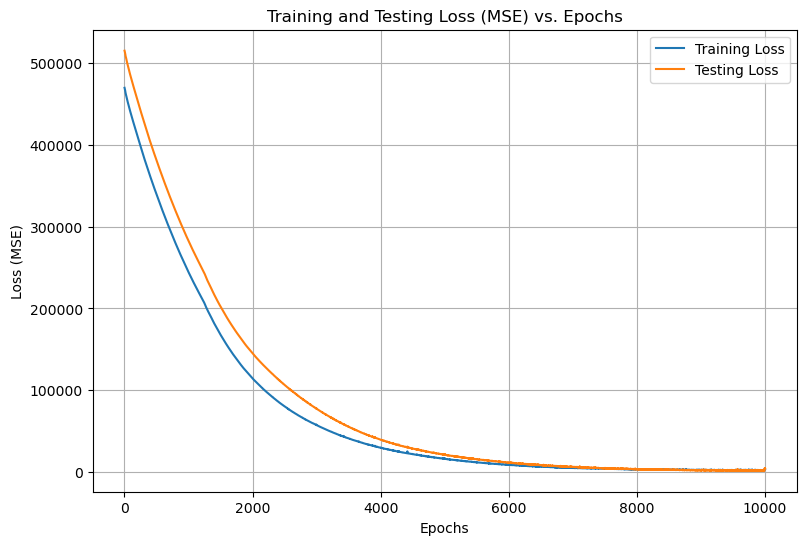

In [49]:
# Plot the loss curves (Training loss, Testing loss)
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_values) + 1), loss_values, label='Training Loss')
plt.plot(range(1, len(val_loss_values) + 1), val_loss_values, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Testing Loss (MSE) vs. Epochs')
plt.legend()
plt.grid(True)


# CNN (Convolutional Neural Network) with a rolling window:

In [21]:

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


# Define window size and reshape the data
window_size = 100
data = df['nbr_of_tweets'].values  # Assuming 'nbr_of_tweets' is the column of interest

# Create sequences for training
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

X, y = create_sequences(data, window_size)

# Reshape data for CNN input
X = X.reshape(X.shape[0], window_size, 1)

# Build CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the CNN model
model.fit(X, y, epochs=1500, batch_size=32, verbose=1, callbacks=[history])

# Predict future points
forecast_values_cnn = []
for i in range(len(data) - window_size):
    input_data = data[i:i + window_size].reshape(1, window_size, 1)
    forecast = model.predict(input_data)
    forecast_values_cnn.append(forecast[0][0])

# Calculate RMSE
true_values = data[window_size:]
rmse_cnn = np.sqrt(mean_squared_error(true_values, forecast_values_cnn))



Epoch 1/1500
20/20 [==============================] - 1s 3ms/step - loss: 41464.9844
Epoch 2/1500
20/20 [==============================] - 0s 3ms/step - loss: 9292.3779
Epoch 3/1500
20/20 [==============================] - 0s 3ms/step - loss: 6500.5107
Epoch 4/1500
20/20 [==============================] - 0s 3ms/step - loss: 4342.0298
Epoch 5/1500
20/20 [==============================] - 0s 3ms/step - loss: 3596.2200
Epoch 6/1500
20/20 [==============================] - 0s 3ms/step - loss: 3505.1538
Epoch 7/1500
20/20 [==============================] - 0s 3ms/step - loss: 3149.1643
Epoch 8/1500
20/20 [==============================] - 0s 3ms/step - loss: 3352.3164
Epoch 9/1500
20/20 [==============================] - 0s 3ms/step - loss: 3831.1746
Epoch 10/1500
20/20 [==============================] - 0s 3ms/step - loss: 3645.5500
Epoch 11/1500
20/20 [==============================] - 0s 3ms/step - loss: 3410.5520
Epoch 12/1500
20/20 [==============================] - 0s 3ms/step - loss

20/20 [==============================] - 0s 3ms/step - loss: 1528.8759
Epoch 193/1500
20/20 [==============================] - 0s 4ms/step - loss: 1681.1178
Epoch 194/1500
20/20 [==============================] - 0s 3ms/step - loss: 1459.0042
Epoch 195/1500
20/20 [==============================] - 0s 3ms/step - loss: 2106.7637
Epoch 196/1500
20/20 [==============================] - 0s 3ms/step - loss: 2003.9355
Epoch 197/1500
20/20 [==============================] - 0s 3ms/step - loss: 1917.3440
Epoch 198/1500
20/20 [==============================] - 0s 3ms/step - loss: 1467.7456
Epoch 199/1500
20/20 [==============================] - 0s 3ms/step - loss: 1452.8030
Epoch 200/1500
20/20 [==============================] - 0s 3ms/step - loss: 1453.7682
Epoch 201/1500
20/20 [==============================] - 0s 3ms/step - loss: 1517.9911
Epoch 202/1500
20/20 [==============================] - 0s 3ms/step - loss: 1698.8055
Epoch 203/1500
20/20 [==============================] - 0s 3ms/step -

20/20 [==============================] - 0s 3ms/step - loss: 1092.4229
Epoch 383/1500
20/20 [==============================] - 0s 3ms/step - loss: 919.7601
Epoch 384/1500
20/20 [==============================] - 0s 3ms/step - loss: 938.3096
Epoch 385/1500
20/20 [==============================] - 0s 3ms/step - loss: 947.3456
Epoch 386/1500
20/20 [==============================] - 0s 3ms/step - loss: 927.7094
Epoch 387/1500
20/20 [==============================] - 0s 3ms/step - loss: 840.4625
Epoch 388/1500
20/20 [==============================] - 0s 3ms/step - loss: 862.1857
Epoch 389/1500
20/20 [==============================] - 0s 3ms/step - loss: 919.3896
Epoch 390/1500
20/20 [==============================] - 0s 3ms/step - loss: 814.9341
Epoch 391/1500
20/20 [==============================] - 0s 3ms/step - loss: 1305.4707
Epoch 392/1500
20/20 [==============================] - 0s 3ms/step - loss: 922.9924
Epoch 393/1500
20/20 [==============================] - 0s 3ms/step - loss: 82

20/20 [==============================] - 0s 3ms/step - loss: 417.1745
Epoch 575/1500
20/20 [==============================] - 0s 3ms/step - loss: 445.7452
Epoch 576/1500
20/20 [==============================] - 0s 3ms/step - loss: 444.8984
Epoch 577/1500
20/20 [==============================] - 0s 3ms/step - loss: 428.0878
Epoch 578/1500
20/20 [==============================] - 0s 3ms/step - loss: 435.8376
Epoch 579/1500
20/20 [==============================] - 0s 3ms/step - loss: 427.4241
Epoch 580/1500
20/20 [==============================] - 0s 3ms/step - loss: 458.7992
Epoch 581/1500
20/20 [==============================] - 0s 3ms/step - loss: 404.9590
Epoch 582/1500
20/20 [==============================] - 0s 3ms/step - loss: 460.6867
Epoch 583/1500
20/20 [==============================] - 0s 3ms/step - loss: 490.5423
Epoch 584/1500
20/20 [==============================] - 0s 3ms/step - loss: 460.3064
Epoch 585/1500
20/20 [==============================] - 0s 3ms/step - loss: 461.

20/20 [==============================] - 0s 3ms/step - loss: 280.2851
Epoch 767/1500
20/20 [==============================] - 0s 3ms/step - loss: 262.1881
Epoch 768/1500
20/20 [==============================] - 0s 3ms/step - loss: 311.7387
Epoch 769/1500
20/20 [==============================] - 0s 3ms/step - loss: 292.0704
Epoch 770/1500
20/20 [==============================] - 0s 3ms/step - loss: 280.8094
Epoch 771/1500
20/20 [==============================] - 0s 3ms/step - loss: 309.9758
Epoch 772/1500
20/20 [==============================] - 0s 3ms/step - loss: 284.7268
Epoch 773/1500
20/20 [==============================] - 0s 3ms/step - loss: 280.9784
Epoch 774/1500
20/20 [==============================] - 0s 3ms/step - loss: 283.7297
Epoch 775/1500
20/20 [==============================] - 0s 3ms/step - loss: 328.2163
Epoch 776/1500
20/20 [==============================] - 0s 3ms/step - loss: 345.7635
Epoch 777/1500
20/20 [==============================] - 0s 3ms/step - loss: 301.

20/20 [==============================] - 0s 3ms/step - loss: 381.7650
Epoch 959/1500
20/20 [==============================] - 0s 3ms/step - loss: 296.6407
Epoch 960/1500
20/20 [==============================] - 0s 3ms/step - loss: 205.8782
Epoch 961/1500
20/20 [==============================] - 0s 3ms/step - loss: 181.0768
Epoch 962/1500
20/20 [==============================] - 0s 3ms/step - loss: 192.3980
Epoch 963/1500
20/20 [==============================] - 0s 3ms/step - loss: 188.2323
Epoch 964/1500
20/20 [==============================] - 0s 3ms/step - loss: 234.5261
Epoch 965/1500
20/20 [==============================] - 0s 3ms/step - loss: 192.9229
Epoch 966/1500
20/20 [==============================] - 0s 3ms/step - loss: 276.4317
Epoch 967/1500
20/20 [==============================] - 0s 3ms/step - loss: 255.3863
Epoch 968/1500
20/20 [==============================] - 0s 3ms/step - loss: 261.8477
Epoch 969/1500
20/20 [==============================] - 0s 3ms/step - loss: 219.

20/20 [==============================] - 0s 4ms/step - loss: 194.7504
Epoch 1149/1500
20/20 [==============================] - 0s 4ms/step - loss: 146.9422
Epoch 1150/1500
20/20 [==============================] - 0s 4ms/step - loss: 147.7666
Epoch 1151/1500
20/20 [==============================] - 0s 4ms/step - loss: 137.4857
Epoch 1152/1500
20/20 [==============================] - 0s 4ms/step - loss: 135.7540
Epoch 1153/1500
20/20 [==============================] - 0s 4ms/step - loss: 136.9037
Epoch 1154/1500
20/20 [==============================] - 0s 3ms/step - loss: 148.0979
Epoch 1155/1500
20/20 [==============================] - 0s 3ms/step - loss: 149.6706
Epoch 1156/1500
20/20 [==============================] - 0s 4ms/step - loss: 152.6117
Epoch 1157/1500
20/20 [==============================] - 0s 4ms/step - loss: 151.4769
Epoch 1158/1500
20/20 [==============================] - 0s 4ms/step - loss: 166.0307
Epoch 1159/1500
20/20 [==============================] - 0s 3ms/step -

20/20 [==============================] - 0s 4ms/step - loss: 112.2882
Epoch 1339/1500
20/20 [==============================] - 0s 3ms/step - loss: 144.3125
Epoch 1340/1500
20/20 [==============================] - 0s 4ms/step - loss: 119.3246
Epoch 1341/1500
20/20 [==============================] - 0s 3ms/step - loss: 116.2399
Epoch 1342/1500
20/20 [==============================] - 0s 3ms/step - loss: 115.3102
Epoch 1343/1500
20/20 [==============================] - 0s 4ms/step - loss: 104.1358
Epoch 1344/1500
20/20 [==============================] - 0s 4ms/step - loss: 147.0623
Epoch 1345/1500
20/20 [==============================] - 0s 4ms/step - loss: 133.5732
Epoch 1346/1500
20/20 [==============================] - 0s 4ms/step - loss: 104.1751
Epoch 1347/1500
20/20 [==============================] - 0s 4ms/step - loss: 122.7906
Epoch 1348/1500
20/20 [==============================] - 0s 4ms/step - loss: 99.3904
Epoch 1349/1500
20/20 [==============================] - 0s 4ms/step - 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


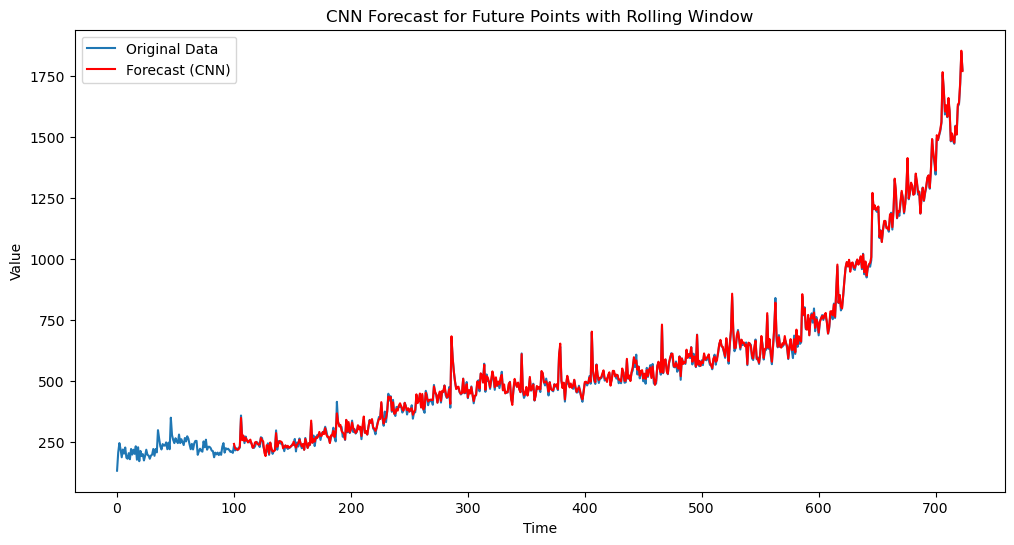

RMSE for CNN: 8.638614583292123


In [25]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(range(window_size, len(data)), forecast_values_cnn, label='Forecast (CNN)', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('CNN Forecast for Future Points with Rolling Window')
plt.legend()
plt.show()


print("RMSE for CNN:", rmse_cnn)

In [ ]:
# Plot the error (RMSE) vs. epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(loss_values) + 1), loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training Loss (MSE) vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# Define window size and reshape the data
window_size = 100
data = df['nbr_of_tweets'].values  # Assuming 'nbr_of_tweets' is the column of interest

# Create sequences for training
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Fit the CNN model using a rolling window approach
rolling_forecast_cnn = []
for i in range(len(data) - window_size):
    train_window = data[i : i + window_size]
    X_train, y_train = create_sequences(train_window, window_size)

    # Reshape data for CNN input
    X_train = X_train.reshape(X_train.shape[0], window_size, 1)

    # Build and compile CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the CNN model
    model.fit(X_train, y_train, epochs=150, batch_size=64, verbose=0)

    # Predict next point
    input_data = data[i:i + window_size].reshape(1, window_size, 1)
    forecast = model.predict(input_data)
    rolling_forecast_cnn.append(forecast[0][0])

# Forecast future points beyond the available data
future_steps = 100  # Define the number of future steps you want to forecast

# Fit the CNN model on the entire dataset again
X, y = create_sequences(data, window_size)
X = X.reshape(X.shape[0], window_size, 1)

# Build and compile CNN model on the entire dataset
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the CNN model on the entire dataset
model.fit(X, y, epochs=150, batch_size=64, verbose=0)

# Predict future points
forecast_values_cnn = []
for i in range(len(data), len(data) + future_steps):
    input_data = data[i - window_size:i].reshape(1, window_size, 1)
    forecast = model.predict(input_data)
    forecast_values_cnn.append(forecast[0][0])

# Calculate RMSE
true_values = data[window_size:]
rmse_cnn = np.sqrt(mean_squared_error(true_values, forecast_values_cnn))



In [ ]:
# Plotting the original data, rolling window signal, and forecasted values for CNN
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(range(window_size, len(data)), rolling_forecast_cnn, label='Rolling Window Forecast (CNN)', color='yellow')
plt.plot(range(len(data), len(data) + future_steps), forecast_values_cnn, label='Forecast (CNN)', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('CNN Forecast for Future Points with Rolling Window')
plt.legend()
plt.show()

print("RMSE for CNN:", rmse_cnn)

In [ ]:
print(X_train.shape)
print(y_train.shape)
